# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [1]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

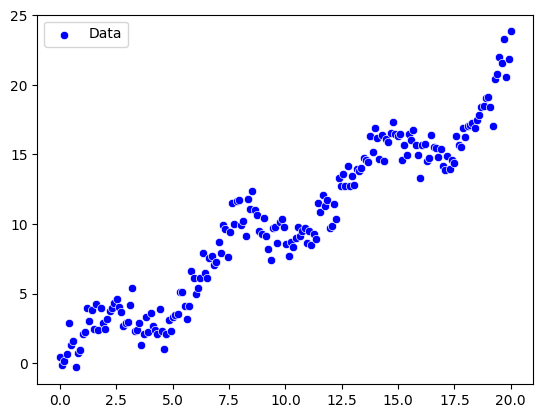

In [2]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [3]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [4]:
df = Simple1DRegressionDataset(X,y)


In [5]:
df[0]


(tensor([0.]), tensor([0.4467]))

In [6]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [7]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[9.4805]])]

In [54]:
# construct the model using Linear block
in_features = 1
hidden = 1
out_features = 1

model_2 = nn.Sequential(
    nn.Linear(1, 64),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(64, 128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(64, 1)
)



In [55]:
loss_fn = nn.MSELoss()

In [56]:
optimizer = torch.optim.Adam(params=model_2.parameters(),lr=0.001)


In [57]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=100,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



In [58]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [65]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
            
                device='cpu',
                epochs=100
                )


Epochs:   1%|          | 1/100 [00:00<00:13,  7.09it/s]

2.0609729290008545
7.974905252456665
33.98044419288635
50.249441385269165
57.83918309211731
58.654166519641876
58.666995488107204
60.75774069875479
68.1546790227294
70.6987840756774
70.82408291846514
141.706864900887
142.03586495667696
143.08546698838472
144.73347628861666
149.3386079147458
158.7426539734006
254.20182145386934
332.30230820924044
343.91524136811495
346.689111597836
362.35889709740877
362.456573612988
375.1360970810056
375.15722300484776
377.67466570809484
380.2852068133652
393.5323324389756
411.480307597667
412.67042746022344
446.5473195500672
447.2201019115746
447.2227918507997
450.8418125512544
451.1344753804151
451.13692853343673
456.37200829875655
465.99427602184005
474.6421594370622
480.32018659007736
512.3913764704484
638.7129783381242
654.4287976969499
660.2401242007036
671.4132446993608
671.9143887509126
674.9397216786165
681.9546047199983
688.0379096020479
701.2196990002412
701.9634188760538
718.9347380746622
734.1568907846231
751.9156893838663
751.949283034773

7.5622878074646
8.50692743062973
11.265437543392181
20.878116071224213
27.16626399755478
32.51001304388046
32.51028571877396
47.489030225609895
47.65260496590054
143.8587740943185
170.25064077827847
171.01087465736782
173.0245241210214
190.47300091240322
198.0677198455087
222.69156589958584
225.6512660071603
225.8320792898885
226.80961859080708
248.38710081431782
248.41846630204236
343.32505962479627
355.2236954890541
360.00240156281507
361.11690268147504
378.31698927510297
378.55929132032907
419.24301858473336
423.05060763884103
436.76601691771066
453.7827386431745
496.1097688250593
496.1721901730052
530.5625710323802
536.6129560307018
561.5029859379283
577.6410531834117
579.0675415829173
583.004125817155
600.1897489861003
607.0493566826335
619.4621813133708
740.6230776146404
747.0609547928325
748.3824418619624
759.9207833841792
763.6014236048213
763.8022967860452
766.8480636164895
774.7806994006387
785.7089115664712
786.580613939499
789.2429920122377
795.1301275179139
838.12498530599

Epochs:   2%|▏         | 2/100 [00:00<00:12,  7.73it/s]

1644.1134966844693
1647.5921548837796
1653.188983344473
1687.1901926035061
1687.2257397482172
1704.4323704550043
1709.9293306181207
1712.1136670419946
1856.215061695315
1870.7986951181665
1880.1017604181543
1899.514941723086
1903.0532975504175
1905.2484128782526
1910.8208296606317
1923.6901591131464
1989.67553356383
1994.0284593412653
2007.5480926344171
2007.8917026827112
2009.8556355545297
2011.846723468043
2013.3463728735223
2015.8624661276117
2031.675621301867
2036.618060857989
2057.8365476438776
2064.7193291494623
2072.0112440893427
2078.298107893206
2124.738594801165
2143.089897901751
2148.998366625048
2242.5805046865717
2245.987019092776
2273.127249271609
2352.8285584757105
2353.2516619572416
2361.942557037808
2362.0147273251787
2363.9294846961275
2365.7247886369005
2389.6179809281603
2392.826507062651
2394.282452077605
2394.4758448908105
2394.5020070532337
2406.411549136974
2427.695255802013
2427.817914337851
2427.8278555637226
2428.9800687795505
2434.6221591001377
2455.40605840

4.292991638183594
12.664921760559082
13.118327885866165
13.336178243160248
46.2059788107872
49.25534838438034
57.21343296766281
57.22115203086287
57.372458883561194
65.3018850767985
65.54278928879648
71.90262539032847
73.86389155033976
87.15988916996866
105.42254061345011
184.10135073307902
211.71400065068156
211.71517085831147
213.68504619400483
215.21592891018372
217.99714529316407
221.38416564266663
236.83737456600647
250.35337722103577
250.80118152301293
250.83673442329746
258.64390672172885
258.65537866565865
263.9777716061799
263.98478111845907
264.1105587653583
264.14199117419776
264.4058147132164
266.0645845591789
354.70926839706954
363.1161630809074
364.856485789991
375.38854641315993
375.47696877864655
391.27929498103913
396.57459212688264
404.4487300053006
405.39266998914536
406.94879169610795
407.1482747331029
408.99271865037736
454.373917533434
454.3740956925467
454.78404287925514
471.68036512962135
475.9272432767466
495.55334572425636
501.9530067884043
506.2656035863474
5

Epochs:   3%|▎         | 3/100 [00:00<00:12,  7.99it/s]

1807.1335640931065
1816.4224396729405
1839.7576046967442
1844.1618243241246
1850.9506183648045
1850.9536514814972
1851.2727520998596
1854.512601667273
1862.3826187189698
1866.3512740667938
1866.8881378706574
1867.1117506112932
1867.1321708813339
1886.3227378979354
1918.9823181286483
1922.970425094667
1931.1062883988052
1932.463143314424
1947.97504898459
2084.510449375215
2154.619404758516
2210.3241204872756
2225.103879894319
2225.7810895100265
2227.041073168817
2227.768348123136
2227.7788942858606
2232.2997363612085
2235.146839003268
2237.7834299609094
2240.9529188677698
2252.052631239596
2252.1799736127286
2252.18252973324
2252.919818089067
2255.8849498487107
2260.2479263997666
2275.5646092153183
2276.519147083818
2278.098970696985
2278.48595283991
2307.9659466601006
2318.0039543963067
2319.1473522043816
2438.718603119909
2476.488378510534
2476.8286297774903
2492.887961671411
2502.2779057479493
2505.185701177179
2525.6547716117493
2529.5941622710816
2571.3802912688843
2598.48715047603

4.609065532684326
5.073227643966675
14.500240087509155
21.5787570476532
94.31468081474304
149.2299449443817
149.7189338207245
165.9153869152069
170.14354920387268
199.42786622047424
201.28890693187714
213.4824789762497
213.6063985824585
213.69129361957312
216.87947096675634
222.60826458781958
222.61626240424812
223.2136052530259
229.90281900577247
231.10696539096534
232.2145565431565
232.4368017297238
232.48084608651698
253.16470114327967
253.17045979388058
253.26745080389082
256.418920988217
341.3066925946623
356.854579443112
357.4182172957808
358.9325804654509
364.392273420468
368.2183945123106
369.22120987810194
369.2693195324391
377.0523495655507
378.6060452442616
380.8400521259755
407.25064706616104
437.82645463757217
444.1416058521718
468.4401898365468
472.3304083328694
496.79928231053054
498.6631342153996
504.5675479155034
518.6623746138066
527.6534272413701
535.8846179228276
538.6959267836064
539.4972528796643
551.5055546145886
553.690535960719
554.6512547116727
554.75923701189

Epochs:   4%|▍         | 4/100 [00:00<00:11,  8.13it/s]

2112.1504198715556
2128.140547435032
2137.1357132599223
2234.468156497227
2235.581381361233
2239.360874216305
2243.9086733267177
2248.6200447485317
2254.473892729031
2255.217286150204
2257.6825147077907
2259.6470932171214
2273.065753381001
2278.248669068562
2284.8694395229686
2305.1697801754344
2337.1988481685985
2337.4819965467323
2337.5718931213487
2337.765237714397
2405.549219037639
2406.8985482708085
2515.5090142742265
2546.8573876873124
2547.13822572981
2547.5943132892717
2547.732444967376
2564.53094693576
2580.4578039303888
2602.818918432342
2607.1148278370965
2607.155898752855
2620.9634138972033
2662.653881731676
2668.9047543436754
2688.706021967577
2690.611081066774
2702.074347439455
2704.51325100963
2719.289153757738
2722.7785813242663
2748.6683957010973
2749.6406745940913
2773.823329928564
2806.2107734710444
2830.9556655914057
2839.1810884505976
2842.8291294605006
2849.331586602377
2849.829323086189
2887.3443110317457
2887.585632476257
2888.097572538303
2888.708757373737
2890

13.893287658691406
21.677951335906982
22.011897087097168
29.359042167663574
32.591840505599976
32.8496515750885
35.70952916145325
77.74593663215637
77.98325426876545
77.99118277989328
150.5720009561628
152.09752426110208
158.9420338626951
159.12210660241544
194.45388989709318
203.7315426375717
214.23480229638517
215.17145048640668
271.24059950374067
312.48689543269575
320.5012749340385
323.49755989573896
330.09566341899335
331.080294361338
333.54130791686475
342.4386963751167
342.43962003011256
342.8536310913041
343.51520456094295
343.5898495959118
364.74335301388055
365.1138522075489
366.3247112678364
370.8363284515217
371.78807402122766
384.07432318199426
388.94572258461267
393.67068243492395
423.59639502037317
427.9136152314022
429.81300724018365
431.45031238067895
446.5039289044216
447.7496109055355
455.74906731117517
456.3718811320141
482.4400192545727
510.1121670054272
511.7765818880871
515.9673744486645
516.2031424390152
529.7035687314346
533.3129330025986
534.8683539973572
540.

1297.4979997696937
1305.8768325867713
1317.4518991532386
1329.410323721415
1335.6532636704505
1341.8617049279273
1342.0151007893146
1363.2841971638263
1363.751220298058
1375.8353982689441
1376.0055953534902
1379.6129824193777
1386.1500908407033
1390.6344515355886
1404.8352915319265
1405.5474743517698
1407.2146291407407
1414.8744029673398
1419.9454326304258
1427.3884272249998
1428.9714636477293
1440.1308397921384
1450.3850035342039
1463.4044966372312
1463.4493577378453
1465.3258968489827
1465.7764930623234
1469.4696273701848
1470.6936782496632
1471.5536595481099
1472.2896972196759
1472.451714341587
1475.8395333933295
1476.0280409204424
1477.0224335538805
1488.5918619977892
1488.592217980069
1488.7750490588369
1488.7751282972458
1530.6701974195603
1534.8665656370285
1540.535433701909
1550.2163657468918
1551.9591048282746
1551.9722971131268
1555.4594947506848
1557.7343134095136
1568.814049165434
1575.9641784836713
1594.737217347807
1595.4027682949963
1595.7002176453534
1599.306785028166
1

Epochs:   5%|▌         | 5/100 [00:00<00:12,  7.81it/s]

13.70433521270752
34.93214511871338
71.22526264190674
82.31444835662842
83.8698319196701
128.35726249217987
129.1666533946991
168.79245448112488
174.2151162624359
175.5196270942688
201.2481198310852
226.1267113685608
226.85005855560303
244.649733543396
295.6272802352905
295.6784204058349
301.8061598353088
303.0254835896194
308.9092807583511
308.9231167351827
317.1836596047506
318.6520740306005
328.3763887202367
330.0225559985265
330.034876588732
347.10845828428864
374.30101466551423
424.6045196093619
429.2528727091849
438.68878293409944
438.6887895544969
440.95882672872176
444.3869232615434
444.51943615879645
446.809510030409
448.906296767851
449.4125427981817
454.12249849047294
456.15696761812796
458.89764616694083
481.7332632323705
486.5443899413549
495.9706527968847
508.254101016184
508.4822648247682
512.661144085785
528.6524837693178
529.1930573662721
555.1481393059694
574.3213799675905
576.1697885474168
576.8081762274705
592.1290094336473
600.4667055090868
601.5280333241426
624.37

Epochs:   6%|▌         | 6/100 [00:00<00:11,  8.05it/s]

2680.5891669715384
2682.906398149822
2684.3900671924093
2685.2453926528433
2714.3287170852163
2716.3851088012198
2720.3904550994375
2760.0221765960196
2760.757432254646
2841.5222561682203
2855.96924332032
2856.1151891524532
2856.875713246558
2860.3038557941654
2870.5730503971317
2871.088913994525
2871.3600047106484
2872.673031973336
2873.8835295910576
2873.9775615731814
2875.671064953003
2875.6973911120185
2880.279037554432


2.770259380340576
2.79338438808918
2.984704703092575
21.667394369840622
30.186278074979782
41.39043685793877
45.22065183520317
110.64906522631645
110.65268911980093
111.97829212807119
112.87422444485128
142.93447758816183
154.04558636806905
156.35592534206808
159.03779937885702
210.988784333691
222.46659519337118
222.52553695999086
263.18507141433656
263.2774902563542
263.62362220697105
271.01806428842247
272.89121869020164
276.49422648362815
276.5030091991648
304.54801499750465
317.9036830654368
322.1510418644175
322.15949411317706
324.1637842170894
324.2467947565019
324.2729202955961
326.989584133029
332.1060516089201
333.0432942956686
336.9724136441946
392.2638755887747
394.5640917867422
395.181128308177
395.3606050312519
395.36797881592065
400.5114510105923
403.6057460354641
419.5226628826931
425.84878659714013
431.23556447494775
462.88669324386865
488.39274907577783
493.44771600235254
504.9496681736782
505.8283669995144
507.26924789417535
514.4812411116436
517.1875718878582
517.19

1115.1282897342608
1120.6939635623858
1120.7005473461613
1186.4224711742863
1215.8529940929875
1220.9062949505314
1306.3172751751408
1312.968326696442
1417.5410958614812
1417.5716865577415
1419.4410346069053
1439.1134913482383
1439.617655030699
1471.4139425673202
1474.2815959372238
1474.2955589082703
1474.6419720139966
1477.922599264668
1507.6210894074902
1555.0782389131055
1568.1749872651562
1577.2000383820996
1592.1434578385815
1642.768049665974
1665.4719242539868
1683.431759306477
1683.508912326084
1691.637375117527
1696.3647615921363
1702.4682614815101
1702.4888783984497
1708.4513894610718
1723.0685826831177
1725.6058866076783
1734.648067622693
1739.6773716502503
1772.2584263377503
1810.4199635081604
1818.700883536847
1820.450884371312
1824.4783745103196
1832.375077276738
1832.6588308804348
1835.2976136200741
1879.161238192828
1879.4042467915133
1886.3802852474764
1908.5496101223544
1911.5246605717257
1924.0190577351168
1925.7294685684756
1925.7466864709422
1926.2704565052554
1928.

Epochs:   7%|▋         | 7/100 [00:00<00:11,  8.12it/s]

3.1956076622009277
9.716591835021973
12.846617698669434
13.797061204910278
15.459247350692749
16.337570786476135
17.055046439170837
21.2303227186203
23.52566134929657
23.542335014790297
59.01530788466334
79.10745571181178
83.75275371596217
83.76804175972939
95.86102119088173
98.5663951933384
98.69652833044529
134.96435441076756
145.12355317175388
152.72941960394382
159.03136862814426
160.27093042433262
160.28035092260689
164.61820769216865
180.00610422994941
192.491704701446
192.7019369294867
193.94269570615143
275.59756478574127
315.17361459042877
416.38186654355377
437.5714913299307
439.8514192989096
458.19098648335785
460.6307331016287
462.3571464708075
465.8509936025366
466.04883588757366
507.49198545422405
507.4989568926394
544.4409849382937
549.7600605227053
549.8962821103632
558.7158183194697
564.2653216458857
565.7530569173396
565.8997045643628
566.5495477207005
566.5729887951165
595.844688700512
598.6017289627343
614.1753631103784
616.1071485746652
616.7731134761125
617.324974

Batches: 100%|██████████| 200/200 [00:00<00:00, 1738.12it/s]

1681.5372603467913
1699.4944880537005
1733.2813685468645
1767.9450762800188
1768.3366089991541
1770.3073357275935
1773.1049352816553
1809.157665841958
1809.4986178211184
1825.2659851840945
1859.63015144386
1865.8040949634524
1872.5125920108767
1928.1053730777712
1937.4471890262575
1937.6779347888441
1938.3536744944067
1944.025689207694
1949.6193643442602
1949.7754846445532
1962.0509925714941
1962.4850164584132
1962.9710355631323
1991.780716501853
2001.5075059763403
2007.0611596933813
2010.865853630683
2015.3663166395636
2018.1908617845984
2045.863570295951
2051.395145498893
2054.7396207682104
2054.7689223035486
2065.687546227804
2067.25508746945
2111.1389909728678
2121.36806163632
2122.311937664381
2126.339444969526
2126.851707194677
2127.6828011020334
2127.942285959354
2131.949265901676
2143.65947956287
2155.4014038487585
2155.402133515723
2207.6332660230473
2210.3391137632207
2213.988473704703
2257.1950471910313
2260.5544333967046
2260.6582370537
2262.1957312362865
2266.3314886825756


Epochs:   8%|▊         | 8/100 [00:00<00:11,  8.23it/s]

18.829509735107422
120.45000076293945
144.945894241333
147.22957062721252
147.49021807312965
151.9369596540928
153.9655663073063
155.26259604096413
155.6477175951004
158.66424882411957
162.10020744800568
162.38703566789627
163.31979483366013
166.7242607474327
235.9155678153038
273.5097755789757
277.3323709368706
278.2548317909241
278.73566234111786
279.8542184829712
280.7407048344612
294.7387698292732
294.9506033062935
299.4782093167305
300.4970617890358
300.60892736911774
306.23675787448883
307.0449832081795
315.92842894792557
317.024532020092
339.0501133799553
339.46641460061073
339.5323949754238
342.8911746442318
367.7783587872982
368.49004915356636
379.3278358280659
382.0199179947376
382.667329877615
388.6638022363186
396.32917508482933
396.8380927145481
403.33350172638893
419.6090773642063
422.40473929047585
429.09248915314674
429.6467958986759
464.7524782717228
485.28105798363686
485.6641817390919
488.6930139362812
521.7729547321796
527.524821549654
569.8246872723103
569.83513591

Epochs:   9%|▉         | 9/100 [00:01<00:10,  8.32it/s]

1578.89017896296
1599.265453621163
1599.266640263144
1600.934130626265
1603.144356685225
1608.0310158305801
1613.5035018497147
1656.5711860232987
1656.6664741137065
1683.2019584276713
1719.3512046434917
1731.1547763445415
1739.654853592161
1744.4658148386516
1792.8625090220012
1793.0200836309232
1915.929805005435
1924.709469998721
1924.9338804879226
1939.538801828865
1939.5443549337797
1942.7091357889585
1943.2419334831648
2020.6713310661726
2023.272296804469
2049.270084280055
2054.17338694958
2061.639974969905
2194.130041498225
2209.7131761494093
2260.951110261958
2261.412364828866
2268.051513064187
2273.1168545368128
2275.9883657577448
2276.6601897957735
2281.2133156540804
2302.683999705594
2304.413675117772
2320.4851434710436
2324.213800478261
2326.1167586329393
2328.7464817049913
2331.9139938834123
2332.54268746404
2345.2289028647356
2390.8764782431535
2437.700990724843
2517.1933460715227
2518.7417350295
2519.9543850901537
2524.050610351842
2549.1322544100694
2550.485924172681
2564

1.792123556137085
7.786127805709839
17.619114637374878
23.373854398727417
23.41739185526967
23.566743794828653
36.59237856045365
50.79638857021928
64.37157243862748
114.88083833828568
122.05283874645829
129.8822369016707
138.5875887311995
164.4112963117659
166.9229592718184
167.1754387356341
237.44351277127862
243.29785475507379
243.7101108469069
253.38312834873796
294.3790313638747
310.9985229410231
311.00096814124845
311.0243555137422
320.48606262891553
330.1038185188081
340.5318151542451
354.3450475761201
355.51209436147474
419.22116647451185
445.0524347850587
445.44030733196996
450.46621961682104
461.25627203076147
467.8373882302549
467.9002839156892
632.4494477340486
641.5520516464021
651.8457280227449
651.8690336474683
652.1161248662975
654.9421639421489
669.2637104967143
675.9958610513713
692.69264030247
704.5460462549236
704.6483160981443
704.6586471244227
713.7287984534632
714.5393935486209
721.187307004584
733.6493831917178
741.3197180076968
741.4229313402902
743.265476253582

1694.5784898829297
1694.6525465753512
1697.0113951471285
1699.3752321508364
1723.4400362279848
1731.3677543905214
1738.7998070028261
1758.9555458333925
1768.5510439184145
1775.8655714300112
1775.8877525907592
1791.6575308424071
1811.0770655256347
1827.9216204267577
1827.9903614502982
1851.119071243389
1852.1036478262977
1857.6068521720008
1889.993845580204
1898.779315589054
1907.8816686850623
1911.9142223578529
1912.6947340947227
1917.3349781018333
1918.3489176016883
1918.5928230714635
1926.9911070298986
1967.3664122056798
1971.5732613038854
1973.7544951867894
1975.324073476775
1975.5725423228578
1977.4566334616975
1977.4568508977245
1979.2657150143932
1993.0195144528698
1993.6190337056469
1996.833148371632
1996.8879544662486
1996.9959549458872
2017.349331334437
2099.670216039027
2099.8272193374287
2102.1696041526448
2102.811325282062
2111.505618304218
2112.288733989204
2115.352101832832
2115.8941611947666
2116.1502585115086
2116.1943321975123
2117.2800342591654


Batches: 100%|██████████| 200/200 [00:00<00:00, 1486.29it/s]

2124.819719031657
2138.400837615336



Epochs:  10%|█         | 10/100 [00:01<00:11,  7.98it/s]

0.7947934865951538
1.0979885756969452
1.318983867764473
54.25245554745197
54.40122665464878
57.61834420263767
57.61992950877175
78.1422950788401
78.20389118930325
79.23927107593045
79.41343124350533
79.57567261299118
83.4047705992125
83.51339063188061
84.07801410695538
115.02751514455304
117.02098092576489
117.07756180455908
120.07522697141394
120.127383725252
122.69239236554131
122.69685895415023
125.81402451964095
125.84336998360232
152.4802394141443
154.834237836767
155.8552361954935
155.92003820138052
166.54924390511587
181.70522496895865
181.74920450570062
253.82277475716546
264.672015060205
286.0313881528564
286.35958923818544
287.19891293765977
287.5146658611484
291.26576139451936
293.3376274299808
298.8896599006839
338.7276611519046
344.2182016563602
352.2441349220462
353.3387363147922
355.5907211494632
382.291229267139
382.6498897266574
436.89601399423555
443.2119510364719
449.22602154733613
460.1254098606296
645.2394082737155
671.1126973819919
683.7230479908176
683.7800324675

Epochs:  11%|█         | 11/100 [00:01<00:11,  7.95it/s]

2012.5721803259148
2012.8765199434056
2013.555549944569
2039.782772387196
2048.4586718928113
2051.242124880482
2060.18328985088
2060.2006517116024
2060.2641421843364
2078.876376299937
2095.5450545836284
2101.5501753378703
2102.0156989980533
2109.625206081946
2110.0806125093295
2121.9859736848666
2148.496448843558
2181.6918414522006
2194.0164855409457
2210.0453303743197
2215.803481428702
2216.0676067758395
2284.1028240609958
2312.110977976401
2328.72000583895
2330.104044406493
2330.1307843986942
2338.6166766945316
2343.4834803406193
2346.234112626691
2348.240987664838
2380.460584527631
2388.1116241280033
2403.2448991600468
2404.256636864324
2500.7098991934254
2502.3526617351963
2514.9872919384434


0.6119500398635864
108.02386105060577
118.93665325641632
143.88456165790558
178.456014752388
183.93505251407623
183.97003588452935
184.3780290223658
191.6736938096583
213.3063327409327
213.60882142558694
214.57996842637658
214.6667903251946
229.5618451423943
235.35161479189992
240.10558779910207
240.6618566699326
241.15782352164388
242.5045783109963
242.90914427116513
247.40059648826718
247.40305008995347
251.9104105483275
277.0743757735472
288.2866493712645
392.46217122185044
393.53366341697983
405.15830292808823
424.62253823387437
424.7820172708016
431.36045746016316
452.6367502610665
461.4729977052193
480.0996895234566
529.4420624177437
537.4855251710396
541.215640823124
550.9862192075234
558.3647482793313
614.3827460210305
615.1488851110917
615.1491316716711
615.4676044445077
625.5816171627084
668.349836156849
673.1510818462411
725.9999397258798
747.35337142754
753.2277939777414
811.8775361042062
882.0735047321359
892.0897028904001
892.1644683491031
897.6646958004276
956.9018326412

1720.5819458175974
1723.7905470539408
1842.2638136555033
1849.624468963273
1854.4228312183695
1882.3912340809184
1882.8232616890746
1888.0592207421141
1910.7323679436522
1988.7309793938475
2000.217980812915
2000.795391987689
2001.9610698927718
2131.8610943068343
2153.6846054304915
2154.9039165486174
2179.3471672047453
2213.2841674794035
2229.3528530110198
2243.5020248402434
2259.145609091647
2262.4834079254942
2262.661712478526
2266.283438514598
2289.125910591014
2297.24861414326
2300.812677453883
2407.9407139529067
2453.1740551699477
2453.287809293397
2453.6531321812945
2468.315881471761
2468.499595235713
2494.492587636836
2495.869927238353
2503.6152656782942
2505.2484945763426
2505.6167090047675
2532.8420870412665
2532.9186151136237
2537.8723061193305
2537.8723257764213
2548.6824368222588
2557.3325070126884
2566.0736368878715
2572.4450081570976
2584.0927313550346
2596.4627512677544
2615.261253236138
2642.013076661431
2647.8087347730034
2648.064071087443
2649.887785105311
2658.2106811

Epochs:  12%|█▏        | 12/100 [00:01<00:11,  7.95it/s]

0.0012101477477699518
2.2013556307647377
46.24453800381161
55.53971069515683
56.01872571767308
154.6916535741184
161.03048690618016
161.03212411957793
178.96015031891875
183.6029501731973
187.40503461915068
208.23828275757842
216.67943437653594
244.4273973281961
246.87423666077666
257.9641652877908
261.3907671745401
264.78745635109954
265.2191800053697
284.0672673161607
284.7448960717302
296.25801290827803
297.3734002287965
339.088480490027
340.29542579012923
354.1401151593309
362.2818283017259
366.51867856341414
376.06130971270613
381.3128003056627
397.6387299473863
407.6478489811998
414.1817954953294
415.8731565650087
419.884819048224
421.34581209975295
440.88690401869826
447.45683218794875
452.0861075099092
470.42367007094435
486.2127001460176
489.29058029013686
492.20904638129286
600.9550867255311
612.5084934409242
628.3737459357362
638.6912975485902
669.9545421774965
682.4625272925477
689.935039537726
699.8511753256898
701.975271719275
710.5737424071413
853.2481198485475
854.22709

2238.3003231856565
2275.584781346057
2280.68004435036
2282.4549487206677
2283.232805368636
2283.8699440333585
2284.1871984276513
2337.2098615441064
2389.424011019204
2519.0554502281884
2524.6753618988732
2586.4260943207482
2586.4410734653065
2615.5569715976308
2658.7024603366444
2673.4780312060902
2682.3775482654164
2684.822189140279
2686.0145864963124
2706.3930197238515
2811.2932348727772
2821.8679934024403
2823.951320934255
2823.952412515908
2838.3414696753316
2845.991195589333
2846.3117480874353
2849.104320585757
2870.843425810366
2882.4797926545434
2898.0209112763696
2956.2633123994165
2956.419638514548


Epochs:  13%|█▎        | 13/100 [00:01<00:10,  7.93it/s]

15.989336013793945
33.190229415893555
57.01895713806152
57.91265398263931
156.69840532541275
158.01380282640457
161.53454381227493
161.54726821742952
162.10179299674928
166.1195032056421
170.73381156288087
201.45335501991212
204.03503579460084
219.82221669517457
254.29213399253786
254.2980022947304
266.47208409709856
275.8278093854897
280.40399508876726
355.5422397176735
358.5673325578682
389.9555314104073
393.14463096065447
396.2435579816811
401.76920228404924
402.09080203576013
402.36294694943354
406.3707174877636
407.8992977957241
409.72280319733545
417.527995667886
417.5543198152445
434.4674095674418
462.25936551531777
470.9813150926493
471.21400363883004
481.32026870688424
484.5124064250849
490.87972457846627
542.249464110937
543.5466742082499
556.6535763307475
556.7586635216139
557.724732325878
565.8580579026602
573.5466493829153
585.7061275704764
652.3413662179373
652.6894064708613
676.0697680278681
686.1923619075678
686.577985511627
699.7675092085265
700.3638721569441
705.37639

Batches: 100%|██████████| 200/200 [00:00<00:00, 1699.97it/s]

1641.9020598265633
1641.9579955856607
1642.401605419378
1642.7582093100355
1644.1835680823133
1644.6793714086816
1645.387348107557
1645.6196522186801
1661.4575209091709
1669.9898209045932
1670.0774117852852
1670.1114583607123
1671.7732203598425
1675.754944145243
1677.2980569000647
1679.0732534523413
1681.0277314777777
1693.3026176090643
1693.935372292559
1716.0904569025442
1716.116754598479
1717.833283014159
1724.6089821528003
1731.691205091338
1742.183365888457
1744.1343470285938
1746.4592321585224
1755.589882678847
1760.3313630293414
1760.371930673282
1766.5431233193085
1767.6580291535065
1767.7155204895244
1767.9866067352996
1773.8561002197966
1773.9895047280297
1776.1369766327844
1780.4893774125085
1792.9502824875817
1793.6137919160828
1889.193183395575
1913.883555862616
1928.3734955522523
1930.6518714162812
1932.1837078067765
1938.4734340641007
1940.467478844832
1950.6136599513993
1971.3600188228593
1972.400853607367
1984.8190960618958



Epochs:  14%|█▍        | 14/100 [00:01<00:10,  8.04it/s]

0.00992012768983841
1.133438117802143
11.266613967716694
11.307050716131926
17.590473663061857
40.853954803198576
41.957844983786345
52.573225270956755
53.20705462619662
77.2941994778812
77.84292037412524
79.87903172895312
87.76070172712207
87.97315631434321
90.25896893069148
90.82179908081889
115.41592673584819
139.30260161682963
139.3477844595909
143.1526533961296
171.64075154066086
172.0793096125126
286.73645225167274
286.74532196484506
307.5867030378431
313.11472723446786
316.5022759195417
433.48475120030344
443.16252086125314
444.8505680318922
450.268536305055
450.7797547336668
451.26878330670297
469.5234887357801
477.56963322125375
498.254113888368
501.7683014627546
501.77111010602675
503.3430513625499
518.52243177942
518.7432881032582
528.628930154955
529.2491140400525
534.2583680187818
535.7620563542005
536.0747645234223
583.8212817048188
587.3075819348451
590.0193486546632
590.0424272788223
590.0424567713071
590.0428325880512
592.1097297419055
670.2434806574329
680.77986237892

Epochs:  15%|█▌        | 15/100 [00:01<00:10,  7.97it/s]

1284.699586779041
1306.1063231529424
1306.1119851010608
1345.7299584286975
1345.8014054956602
1355.1270805063414
1366.8441615762877
1384.1301761331724
1398.3346963586973
1406.1958685579466
1415.9959040346312
1420.270543641107
1422.7740665140318
1426.0098567667173
1426.119067876296
1426.8560746001767
1430.5862121867704
1433.320640592532
1436.128396062808
1437.0543720411824
1487.8609363722371
1496.2275306868123
1498.3150820421743
1525.8123621630239
1534.6598686861562
1539.7286619829702
1553.8198151278066
1554.0402902203368
1554.1678271579312
1601.5783839511441
1625.3157038974332
1665.3853450107144
1665.5781930076646
1675.755169211583
1735.4938052284288
1747.6821787941026
1753.2165020095872
1755.0084545003938
1760.101879297452
1784.6946813451814
1786.067648230748
1791.541271983342
1821.7894046890306
1841.2545860397386
1847.6649463760423
1864.0779121505784
1904.3829162704515
1906.0877794611024
1906.1620693268942
1907.8446400227713
1908.2681157949137
2068.1427801015543
2071.937401330726
207

0.05207086727023125
0.7467047087848186
11.025928150862455
29.77743686363101
31.243972789496183
46.520812045782804
47.898016821593046
49.25920594856143
49.84142334386706
68.99126274511218
74.07711822912097
74.47248236462474
81.82113186642528
119.48139874264598
150.05926815792918
163.61987702175975
181.67983261868358
231.91161743924022
239.0584932975471
242.92241780087352
258.7750550918281
258.88836063072085
291.4821602217853
293.2789530865848
294.4972092024982
309.1571613661945
310.874214541167
310.94697323814034
316.3360070325434
316.33626777795143
321.2675655570347
323.9186304297764
335.57337839272805
337.46040756371804
345.96906978753395
346.28931836155243
356.26398686436005
364.6621487524826
366.91803483036347
375.2284787085373
377.3960240271408
396.0583546545822
396.75355378654785
432.9494690087158
434.26103667286225
446.72266558674164
481.73873309162445
495.0899770644028
623.021320143016
632.7887990858871
633.1614317384083
634.940854498418
636.9849400010426
686.9600452866871
689.5

1365.3133208195213
1407.622269336367
1408.1656769553665
1409.7921832839493
1411.3729946652893
1411.9965748826507
1444.5501713792328
1454.6576705018524
1478.4040617982391
1487.0022578279022
1494.6970276872162
1499.6672039071564
1594.3208675424103
1599.9518480340485
1600.4614679852966
1610.659316305304
1614.0099613706116
1618.4520423451904
1618.4601911979262
1649.7278494315688
1654.593377061421
1659.146331258351
1659.222791277105
1659.3896585183684
1696.7698999124113
1696.8039742114488
1776.4029274585191
1834.1426392199937
1877.8660507800523
1878.182463467354
1888.9104927184526
1892.5208573939744
1893.3339771034662
1894.0685591103975
1939.6213278176729
1945.1393932702485
1947.9518727662507
1948.7947705390397
1963.5869830253068
1982.37117224955
1985.89438492083
1986.0886632504407
1997.7318564953748
2010.9859372677747
2029.5741197171155
2032.9660834374372
2037.3973273339216
2042.3631333413068
2042.3671150540467
2063.5311985348817
2076.0377741192933
2090.1150913571473
2115.9707451199647
211

Epochs:  16%|█▌        | 16/100 [00:01<00:10,  8.05it/s]

0.015372824855148792
1.1664561750367284
13.586512518115342
22.691313696093857
23.60603637713939
27.54333682078868
39.865513754077256
39.92203170154244
41.3614476332441
41.44635378662497
42.513204329647124
43.1257288986817
44.18337362352759
72.31355207506567
138.52555006090552
151.74110334459692
152.5320873791352
153.5688726240769
154.84147887770087
177.08648543898016
190.42045836988837
192.4850993687287
193.91073828283697
194.00873457733542
204.76037775818259
209.5762122804299
238.64623295608908
239.1724961930886
239.17813963303342
247.12799925217405
262.3937329710461
297.8983754576184
335.7648648680188
336.19169852742925
348.0007252455689
348.36411998281255
460.75999400625005
468.6365484953858
474.57154510030523
474.605893867556
487.1192567520775
499.1066329651512
512.4408109360375
513.1066809468903
524.3895712667145
524.3899901860859
528.7960752004292
533.9986628049519
546.5205887311604
554.7627819532063
555.0500966364052
558.022098188987
566.4156757646706
567.7251385503914
569.83798

Epochs:  17%|█▋        | 17/100 [00:02<00:10,  8.19it/s]

1741.5834026014236
1875.9298076307205
1879.4887668764022
1889.7174770509628
1890.7708831703094
1905.238830176535
1909.9524999534515
1922.7593074714569
1924.805839148703
1929.0988436614898
1929.3748258625892
1946.3249048268226
1946.845301834288
1948.0843424474624
1949.9101073419479
1970.2655932580856
2036.3619677698043
2046.9864823495773
2050.33436295146
2061.0098533307937
2061.1953449969915
2068.1241470103887
2068.768566263261
2074.0511733418134


4.943732738494873
48.42724561691284
77.92927694320679
79.71031630039215
97.58799612522125
150.24796164035797
152.39406406879425
154.1881127357483
155.4505339860916
201.0875197649002
235.74504387378693
270.23102486133575
270.32664029300213
270.8317063897848
282.86738716065884
291.4331754297018
310.4432538598776
311.0723141282797
318.36163841187954
328.0276530832052
336.5948260873556
342.3739656060934
342.52464415133
343.6898288875818
347.8110995441675
347.9028726965189
348.6864559799433
349.0637381821871
353.8337109833956
354.559253051877
355.2022154480219
372.3747942596674
373.8985183387995
376.4112816005945
381.79355622828007
385.5239148288965
387.2145625501871
395.1496817022562
400.8801232725382
406.0954610258341
419.60377229750156
425.0105272680521
426.3632329851389
446.5830053240061
461.0278543382883
465.45931185781956
474.32970847189426
474.3593554701656
480.5562205519527
490.15802337788045
499.43028690479696
511.91736938618124
513.7010843958706
514.1455114688724
514.1570206237957

Epochs:  18%|█▊        | 18/100 [00:02<00:09,  8.29it/s]

1721.3849583985502
1721.7666549803907
1722.464936387747
1728.4517117860014
1730.215554368704
1737.6869064690763
1737.7049085209364
1737.8307140777106
1743.9757207343573
1745.8919392535681
1746.8420773456091
1749.7933667609686
1750.4195840666289
1755.0919106314177
1756.8057418177123
1787.7958121607298
1862.9449668238158
1873.0779815027709


1.4787571430206299
3.6061320304870605
5.300211429595947
7.216683387756348
10.680270910263062
18.770095586776733
27.082086324691772
33.556902170181274
33.825365126132965
60.07715994119644
60.37049075961113
60.44233374297619
60.44992996286601
60.50715920608491
64.98657366912812
72.43774792831391
79.64814278762788
101.36791894119233
101.42100138124079
112.73037237580866
116.00764769967645
120.5227987235412
120.83994460757822
135.1742770737037
135.83219123538584
137.26828694995493
137.47976110037416
140.8029629951343
142.16783139761537
162.45356938894838
180.59536168631166
186.6466192966327
186.6574873989448
191.5636391704902
191.9438871210441
195.45947635825723
197.29786563571543
197.43234758730978
204.27718429919332
208.04533915873617
307.51720958109945
310.88581734057516
310.8933506873436
312.1290028956719
334.5179971125908
335.7422985699959
345.28404280217364
345.28682472230867
347.07957138540223
356.61123051168397
356.95955129386857
357.4215043676086
359.68168102623895
359.75066280039

Epochs:  19%|█▉        | 19/100 [00:02<00:09,  8.38it/s]

1735.0210576456739
1735.0324926431058
1771.3926420266507
1771.4598754252074
1778.0564039553283
1792.8075722063659
1792.9474546815036
1792.9475640112214
1792.9742997156136
1793.8502437339775
1793.898392198389
1812.7422814348392
1814.6400439718418
1822.1365802267246
1824.403164623087
1830.559249160593
1833.647638795679
1839.1340188959293
1839.9017983058147
1842.5843253710918


18.36789321899414
19.119677484035492
19.12051805795636
58.22657808603253
92.68600878061261
95.86232837976422
99.52350339235272
132.93647488893475
142.9960184985539
163.7637949878117
171.19357022584882
172.93368908704724
174.631027072086
186.6725710326573
187.6382297569653
190.1843072468182
197.34059634746518
199.55226316989865
200.78134098590817
201.80729654373135
211.44275835098233
222.41535738052335
223.28542038740125
226.1983813935658
242.1987018281361
242.32714101613965
247.9786455327412
248.61859092058148
258.8981500560185
260.31067416013684
266.05330893339124
268.2965361768147
269.6160407954594
272.22125014604535
289.0969863826176
300.24235209764447
301.23668959678616
301.2838516825577
302.7231063240906
304.46462374867406
305.921817600145
324.85540753544774
324.9402327010175
335.5687298247358
356.8853535124799
358.6355417439481
381.7295358845731
381.83836330415215
381.8414391131373
383.2002644391032
383.2052767846035
387.74756604165304
396.390204248135
443.93932229012717
447.9292

Batches: 100%|██████████| 200/200 [00:00<00:00, 1606.27it/s]

1365.6911409317145
1366.56540505277
1373.1047922788748
1377.772309464086
1384.0076886831412
1416.026857536901
1421.8277789770254
1428.1359349905142
1493.2472249685416
1493.2477996498674
1493.769788458976
1494.2492246777147
1517.5390520245164
1528.6807632595628
1537.4277191311448
1545.061906829509
1548.5445540100663
1558.9939062744706
1559.0646119490593
1563.4664583579033
1581.6178141013115
1584.1450350657433
1584.9470478669136
1596.2966305390328
1601.0219270363777
1601.1143003627985
1614.488783471319
1623.7236972973078
1624.299953214857
1628.8566358015269
1632.741863004896
1633.5972934291094
1642.92921214554
1643.2528727576464
1661.0523703620165
1674.8442452475756
1682.0219347998827
1738.106167130205
1745.628351025316
1764.453084759447
1769.9936202094286
1788.7980883643359
1807.609533600542
1816.9788716361254
1817.8924472853869



Epochs:  20%|██        | 20/100 [00:02<00:09,  8.23it/s]

8.258915901184082
9.07509994506836
10.172593235969543
32.64239799976349
32.69325216859579
48.181850992143154
48.9014703258872
48.916205594316125
69.07249183394015
81.55152148939669
82.05621416307986
99.70238954760134
100.31673146225512
100.75641063787043
101.90020004846156
110.3451196346432
110.92484704591334
113.73651091195643
115.56480816937983
117.82063345052302
123.3527918253094
123.35352400614647
127.58251026942162
128.82057336642174
129.49321059061913
129.72038239910034
133.03258699848084
148.34321684314637
152.1141268677893
152.12971707823453
153.7598753834027
174.4959250355023
174.65918133797823
210.19498227181612
210.1985513753607
240.89274044701597
241.30730580160161
241.9169798977091
250.97069274255773
261.5877324230387
268.66062270471593
274.7173243648722
275.65691547462484
280.13120870658895
287.08543090889
288.5983121878817
291.5620956904604
315.7549477107241
409.5125465876772
413.15099101135274
414.0755762941553
427.4028639681055
441.36934803792974
443.27920864889165
454

Epochs:  21%|██        | 21/100 [00:02<00:09,  8.36it/s]

1259.029364475654
1259.3219488949044
1292.0860823482735
1309.62898624842
1309.669138906197
1333.9132184960408
1339.258876798348
1339.6314462699456
1343.6515597381158
1343.9095427372022
1382.6974913456006
1398.2089163639112
1412.967711148457
1418.1711513378186
1491.208695588307
1492.4764328577085
1508.642871914105
1510.392400918202
1510.398677755752
1527.221805502334
1527.3116121707944
1552.3846788822202
1553.959914845088
1553.9817857599346
1558.9297475671856
1559.542098984727
1566.954415783891
1621.8533758974163
1621.9973041719286
1627.4920465654222
1650.7344648546068
1680.4121133989183
1681.8242929881899
1682.6310066288797
1683.9495101279108
1686.4649286574213
1688.8902533358423
1725.202089578518
1725.7981598085253
1752.1506397432177
1776.315936297783
1776.3449216640083
1790.797710970649
1810.5122857844917
1840.00179727436
1881.2462621486275
1882.1052411949722
1883.1519766008942
1884.5271569645492
1902.8000317967026
1904.3943590080826
1942.3135599052994
1942.3149334743148
1950.1944066

34.91493225097656
53.68050956726074
90.87225151062012
95.80962944030762
135.32446098327637
135.33794004376978
135.34083423856646
135.9149001026526
145.09379319194704
146.08224812988192
146.97254899982363
147.13858681265265
161.62410526815802
167.01367931906134
171.7843769127503
172.21941199246794
208.83156027738005
208.94607217703015
209.06981207523495
209.44638843927532
209.52635347191244
209.96555470768362
210.91019528452307
211.05834997538477
213.94245422724634
223.7697399938479
224.84872508887202
224.8516189758666
229.1351835434325
251.25234434055164
254.12459561275318
254.23764448659495
262.28693800466135
272.50032167928293
283.7730067302473
290.01832037465647
304.38820391194895
314.78811197774485
319.7048914958723
453.86274366872385
457.7208965350874
499.380041890312
514.9406946231611
515.733124606777
548.9036759068258
549.0192563910969
558.5069950004108
558.6337187369354
566.1433403571136
570.054600961972
570.0573992035352
579.4065565369092
579.4065572859292
586.9408671499734
63

1522.8157195097485
1531.5843724257031
1538.650715256361
1544.077726269392
1544.472425395874
1571.8189372366944
1576.4067835158387
1578.4639109915772
1583.7900928801575
1586.1995031184235
1595.6303865260163
1595.6365579550804
1595.9047610645832
1617.225344408089
1622.2209002857746
1627.7285311108174
1637.514587629372
1739.2990038281025
1742.9317586308064
1751.8545682316364
1762.6192862873615
1785.4677569752278
1836.1760203724446
1837.3724721556248
1853.9662870054783
1855.9879342203678
1856.6328098064007
1862.745061088139
1886.866824317509
1895.8506500011028
1895.8975013157071
1907.0209163089933
1909.099590386981
1910.37011679613
1922.6483512779416
1928.4024387260617
1929.6542998214902
1929.6544114365718
1934.865225912585
1934.9952962710997
1956.202985556378
1963.4432695224425
2001.9998491122863
2006.788715155377
2007.0758325472018
2010.8544282331607
2026.3907536878726
2029.7490684404513
2049.17268866445
2050.6999511137146
2051.7119579925675


Epochs:  22%|██▏       | 22/100 [00:02<00:09,  8.28it/s]

17.459936141967773
19.382642030715942
23.925382375717163
33.31442618370056
33.5806140601635
33.93681991100311
35.069809317588806
35.98907995223999
65.00596761703491
65.28342020511627
71.04951298236847
81.27261650562286
84.04480016231537
196.56017339229584
261.84330785274506
274.2805560827255
283.1938136816025
283.25285690277815
283.49684528261423
287.63328317552805
287.8265204206109
313.90508983284235
317.9207110181451
318.0669025108218
351.6953357383609
366.5832418128848
378.52741085737944
388.9363444969058
400.8447040244937
402.0534924194217
402.1406003385782
409.7354928404093
410.5061315447092
411.69842733442783
414.2743529230356
414.5849894732237
421.25739900767803
439.1336864680052
461.4533943384886
469.9225591868162
476.3033751696348
482.6977752894163
487.7312545031309
494.6221999377012
502.78392116725445
520.2631005495787
522.6538056582212
523.5030069798231
525.9685020893812
526.673718675971
527.3052601665258
527.3085856789257
527.4476870351937
534.3479222112801
534.909637516131

Batches: 100%|██████████| 200/200 [00:00<00:00, 1683.10it/s]

970.7292368763592
970.9206848496106
974.7621503227856
993.8309693688061
1004.7859044426586
1005.8972213619854
1006.2828650826123
1096.7030005806591
1110.1150517815258
1113.6524684780743
1120.9154045933392
1172.7160637730267
1203.78918961226
1203.7899927060353
1224.7453359524952
1235.8977197568165
1248.7254289548146
1251.0974196355091
1299.9494627873646
1408.971786395763
1419.5871666829335
1423.9604152600514
1430.381384746288
1432.0288248221623
1477.411244408344
1501.962149636005
1505.4871568839299
1507.3678448359715
1514.9383824031102
1518.626533285831
1518.9019926945912
1521.1947053830372
1524.6233352582203
1559.3145736615406
1560.815825835918
1560.9650801132666
1561.0300638388144
1572.1444122503744
1579.7778722952353
1579.9420674602734
1638.5835240642773
1638.8522766690003
1650.7184332470642
1659.1989143948304
1672.8514069180237
1676.352384434198
1676.5409963141428
1697.8724610815989
1698.4323791275965
1698.4323940824406
1710.919522340192
1727.2389956067937
1749.0969935010808
1749.21


Epochs:  23%|██▎       | 23/100 [00:02<00:09,  8.26it/s]

0.02811555191874504
17.3951027803123
17.486559856683016
23.13999842479825
24.771702993661165
114.30742381885648
120.15142463520169
122.97172068431973
122.98542823735625
128.4244083398953
133.55584897939116
148.4375132555142
184.4167841905728
188.09098138753325
198.61910524312407
198.61980559828226
199.40445634128992
210.8571378827328
211.88405867817346
218.26985713245813
218.5564060449833
289.5832538843388
289.9244977176422
290.9977571904892
291.01606990548316
303.16897632332984
304.5650334522361
381.34737445565406
389.8994250461692
389.9046190796653
389.9154375788057
393.00516474212054
396.53526699508075
399.5905014273012
434.9768348928774
435.10451576078776
439.54615279997233
473.2734057601774
474.1347039040411
474.68371024692897
475.7678447064245
501.0583243664587
501.4479331668699
513.5946912463987
515.9037215408171
522.0478946861112
522.0830484327162
527.645095914253
547.1731167730177
622.6492062505567
647.3495598729933
650.1857868131483
650.8570552166784
674.8655009564245
686.576

1814.0194857380448
1814.631401445633
1814.6675495020208
1818.9597872606573
1828.6723917833624
1859.784912001258
1870.12437618888
1871.2309799305258
1885.1333990207968
1885.1409464454373
1886.9825640296658
1887.2919256961068
1887.2943696704788
1928.1181268421096
1931.2727467742843
1943.6331975189132
1946.4043688503189
1952.4052700725479
1960.3869647708816
1962.7890455451889
1964.3695314851684
1964.6255409744663
1965.130378010599
1965.1303956184165
1968.8322992000358
1969.410813120343
1969.4163989640401
1974.5321287728475
1978.4591765023397
1978.5010864950345
1981.5516853548215
2042.2325897432493
2053.962225935571
2138.474806807153
2150.8407907701658
2164.5212431169675
2164.528557077665


Epochs:  24%|██▍       | 24/100 [00:02<00:09,  7.89it/s]

1.4967668056488037
11.69694209098816
14.262879371643066
15.984073996543884
23.02521502971649
33.1027649641037
35.11301362514496
35.87738078832626
55.31720393896103
55.46353256702423
65.25485241413116
66.83664238452911
72.75546133518219
82.70565187931061
94.6911484003067
98.06377971172333
99.5869493484497
99.76465639472008
103.75308236479759
103.82211323827505
104.52337827533484
104.68945417553186
117.79987344890833
118.24809107929468
123.84579978138208
124.41938308626413
124.70632777363062
130.85201964527369
138.92961821705103
143.3323648944497
144.56994733959436
145.5311690941453
147.405396617949
165.96525494009256
177.91678158193827
181.90789452940226
185.9969495907426
187.12659207731485
188.66966453939676
206.9846250191331
220.16435066610575
220.1842959355563
220.2011597827077
220.23675081506371
226.52998373284936
239.57042810693383
239.70128660276532
239.72504706308246
240.2548785917461
240.56026236340404
240.66974246874452
272.39163768664
273.12857723608613
276.836828712374
276.91

Epochs:  25%|██▌       | 25/100 [00:03<00:09,  7.96it/s]

1442.1658910494343
1443.4574753027455
1465.7068172674672
1481.2876554708973
1485.4767981749073
1485.4830193757125
1491.9443750619002
1508.9953489541122
1511.0371499299117
1600.3821740387984
1611.6993527649947
1612.0008006631442
1635.6882720529147
1637.0441529094287
1647.1366459666797
1647.3952537118503
1647.7958308993884
1652.748885327489
1661.246332341344
1663.930043393285
1663.9813057049223
1689.8245464428373
1705.1469999416777
1706.3856689794966
1711.0160033567854
1715.1855718954512
1715.191348942467
1715.337517830082
1727.6428271257364
1727.8014823072635


1.0746426582336426
43.65031099319458
46.948681354522705
54.926907539367676
56.88563024997711
57.83167374134064
58.403556644916534
58.47297443449497
61.93238867819309
62.073239251971245
62.0732480600127
62.374042065406684
64.21891525533283
64.79596850421512
66.09732672717655
66.13472121354425
66.15730615105713
102.79444833245361
105.36571379151428
105.38562486652518
107.72033856395865
122.22934983257437
124.60263154987479
126.88503120426321
127.02643116895342
138.23883446637774
139.6866150755086
139.99711927358294
145.0882457155385
219.41615709249163
231.44077619496966
233.6725998777547
235.16400727216387
241.1473575491109
244.4873746294179
306.1303876299062
331.47554143849993
338.8437846559682
451.36660417501116
451.4587941202917
457.14375782344723
475.7229929003515
477.0386660132208
478.16137349937344
493.5722144875326
494.5215941700735
494.536040871928
539.9489704068401
542.3316098149517
544.4805353577831
544.9803894456127
550.224157183955
551.0623370106914
551.8371084030368
553.3771

Epochs:  26%|██▌       | 26/100 [00:03<00:09,  8.10it/s]

1112.9805057552585
1119.34307699473
1119.518342143012
1124.9223843869695
1127.0249487218389
1129.5336297807225
1133.659164792014
1138.7640632447728
1142.0309261140355
1142.6174933371076
1148.4495083746442
1151.6193386969098
1159.1410548147687
1161.3260621485242
1165.3852085527906
1165.401791583834
1167.2009822242835
1167.383033242164
1168.0716877841332
1168.3742184304574
1168.440344397066
1182.1597800888994
1186.3403778710344
1217.1618729271868
1217.2862949409464
1220.5856578388193
1223.1386752166727
1236.7255167999247
1238.1056278982142
1238.2801137753704
1241.9702521153667
1244.3705092259625
1245.0056694933155
1245.9844193645695
1246.2051672377565
1247.4736778178194
1273.0319225230196
1288.8331949152926
1300.293862525461
1302.087628308771
1310.3950051703432
1313.6962444224337
1315.375073257921
1319.8380387463549
1321.3732520976046
1321.9419366755465
1336.4915964045504
1346.9907295145968
1375.2462055125216
1383.626029197214
1384.538361910818
1384.6702562012651
1385.4333348908403
1390.

5.20887565612793
11.231799125671387
11.839533507823944
29.65135258436203
51.48358792066574
130.41449612379074
183.9777666926384
243.1613032221794
250.52851122617722
255.32586687803268
271.3070585131645
283.85784167051315
287.1709939837456
301.38362807035446
333.35438841581345
364.6238757967949
366.8916375041008
433.92509239912033
456.60972183942795
462.01048678159714
462.0503772981465
462.9111904986203
506.3162922747433
506.9475533850491
507.1215110309422
536.9577460773289
559.0844970233738
560.6916236169636
575.0067824609578
575.6753150112927
575.8017381466925
585.4416583813727
589.1743530072272
618.4192394055426
618.502448450774
649.7697881571949
655.4212292544544
664.2703865878284
747.2530831210315
747.2734123226255
754.6773181911558
755.2271201368421
755.2272183801397
755.440694009827
760.1193544025882
772.8789846058353
823.2700063343509
836.408184206055
836.4969878401025
837.6938131059869
865.3784387315973
865.9124762024148
870.0603553261026
877.4927979912027
880.8067487682565
886

1473.415378427162
1477.3785866257094
1477.4870445411943
1479.669549195125
1479.686202671408
1515.3428722881072
1533.1579357646697
1541.9089418910735
1543.1820838712447
1545.3879168294661
1546.0758592747443
1589.8796159886115
1596.1980697773688
1597.0670265220397
1610.3516296409362
1610.947624411463
1648.0502817295783
1648.4719064198725
1648.654557298898
1660.5011578314297
1667.0522552244656
1667.2661558352702
1667.8648512922518
1668.0907236002677
1669.9753430746787
1673.9401615523093
1683.2685621641867
1685.3170376681082
1712.498554315447
1712.589675989031
1713.2653953098052
1714.8736949228041
1719.0356254838698
1720.8576411269896
1724.4719823859923
1724.7412682138674
1724.9494102560275
1724.9820442460768
1725.219679992675
1727.1263077669137
1762.1877167634957
1766.0308685712807
1766.2557353489392
1809.0697803013318
1812.5758809559338
1812.605402633577
1817.7283522337966
1818.1166581958823
1820.5774137825065
1823.7112743705802
1825.4457586854987
1825.6719134599261
1834.7384169847064
18

Epochs:  27%|██▋       | 27/100 [00:03<00:08,  8.17it/s]

9.713347434997559
37.78593349456787
43.65755748748779
45.3035192489624
46.272166073322296
56.239703953266144
58.75276046991348
70.03199154138565
74.68127304315567
77.78045517206192
77.89568527787924
78.03294392675161
80.62524553388357
84.45010467618704
93.81754108518362
94.98049923032522
100.90603920072317
100.91424859967083
106.983696593903
107.16345947887748
109.77860063221306
112.65946501400322
112.6992626329884
114.77185346093029
121.18175364937633
133.18083621468395
134.05977822747082
160.04142381157726
160.3782962700352
187.79696883168072
193.4333409210667
221.81908692326397
221.9279711386189
237.89220739807934
276.74209143128246
287.4117024084553
303.60060430970043
333.73511053528637
334.0188024183735
335.4873162647709
365.39945043530315
387.7304154774174
389.8566750427708
392.4053515335545
393.00833822693676
409.4248783728108
425.25680376496166
454.09758402314037
454.3157460829243
454.86475528683513
479.76061786618084
482.0201121708378
532.4921809574589
536.2581523796543
547.92

Epochs:  28%|██▊       | 28/100 [00:03<00:08,  8.02it/s]

1632.4821994062513
1659.0048720594496
1659.0292631797493
1685.046436946839
1685.0612383326516
1686.0321973999962
1718.9639982422814
1725.6338500222191
1730.8254255494103
1747.4979623993859
1747.5178390378132
1757.2896161908284
1779.0619321698323
1782.8169988030568
1784.0275368327275
1786.3486957186833
1786.6759097510949
1788.0794362956658
1792.505851262249
1792.5624212520197
1795.463609864004
1795.6859971331432
1796.3152095722035
1796.5511767761782
1810.3233878510073
1814.220157851465
1859.230884780176
1866.091429461725
1895.1039454834536
1897.179541577585
1900.0565206902102
1908.6783544914797
1983.5479223625734
1994.236765136011
2064.1362478630617
2064.3394220219925
2064.3696282925084
2064.3926242655143
2078.482331640087
2079.108746654354
2090.4789038961753
2102.3806325262412
2106.5729867285118


12.177902221679688
95.85258483886719
96.03343461453915
132.0093028396368
136.7315485328436
160.1668112128973
163.85369132459164
164.0822078436613
170.39297644793987
172.8801359385252
204.17086927592754
204.7413567751646
205.23416431248188
207.65013082325459
231.90679128468037
232.10162571072578
232.1271248999983
257.2047482673079
258.6557022277266
260.83123838342726
275.70671331323683
280.3450418654829
281.66575562395155
301.0773919764906
304.3150757495314
306.71892916597426
336.8947867099196
358.4756449405104
358.55895938165486
371.35057391412556
387.84267367608845
400.6652673650533
439.0126909185201
439.30216787941754
455.57867048867047
455.72706607170403
461.8759031612426
468.61506799049675
468.9366047400981
468.9847591686994
469.1714150328189
477.1782795805484
485.98884552903473
488.43062132783234
495.4179741758853
504.91150540299714
527.2496535200626
531.2256457228214
532.7017274517566
533.8120804447681
536.585115255788
536.901226522401
537.0498874802142
542.1350772995502
542.1465

964.3399789780378
979.7863882035017
1051.2305868119001
1078.5460966080427
1078.7546282410622
1105.0853071808815
1105.4665881991386
1115.2198850512505
1115.398772791028
1116.5561408549547
1117.0490273982286
1133.4998368769884
1134.2535991221666
1134.7684152275324
1136.0279749780893
1136.2305314540863
1138.6819078922272
1144.1042544841766
1156.2409207820892
1157.1522408723831
1159.3787618875504
1159.391601525247
1162.5985674485564
1164.7748407945037
1166.2607316598296
1171.3719544038177
1187.7707790955901
1191.733649455011
1216.0140449628234
1217.0987664088607
1218.8916254863143
1227.2353840693831
1233.2711120471358
1234.158158801496
1242.753072284162
1254.1309361681342
1277.4922013506293
1278.1410497054458
1281.5927027091384
1286.4374574050307
1286.4494359465316
1310.6769559355453
1330.4498822661117
1333.3534121485427
1368.231906411238
1372.1316513987258
1399.8407845469192
1415.4156680079177
1429.0862030955032
1429.1369013572112
1432.4753989959136
1440.3468179488555
1457.595038392581
14

Epochs:  29%|██▉       | 29/100 [00:03<00:08,  8.14it/s]

17.263839721679688
28.271557807922363
53.15113925933838
60.439899921417236
65.38401889801025
70.24171257019043
102.09879684448242
125.45843887329102
128.29877090454102
148.88395881652832
164.56455421447754
176.1688470840454
181.43583297729492
183.19252920150757
290.5287413597107
290.56316581740975
290.7978422380984
292.9271623827517
345.1152536608279
345.37147599831223
345.5594977326691
346.4497611708939
377.70037915185094
377.71730268374085
377.9961147643626
415.7073726989329
415.89890955761075
427.18211268261075
433.405685890466
437.07596491649747
450.9204301722348
455.3122138865292
456.3771587498486
462.8971758969128
474.07123957946897
485.8575898297131
506.9881936199963
507.054118398577
561.7784225977957
562.9409879483283
575.5265744961798
588.9088567532599
594.1208018101752
615.1396082676947
616.8359400071204
616.8401432842948
645.3281079144217
650.1523090214469
653.3304942459799
657.9935253472067
714.593512377236
718.8710072846152
721.8715856880881
726.2437575669028
752.936855635

1372.4526761230081
1372.6182972248644
1392.093682890758
1392.2763142045587
1392.5978912469
1398.465148365125
1428.804992115125
1452.2603468056768
1452.4674429055303
1453.295405542478
1463.6020776387304
1471.7518416997045
1472.3066342230886
1534.247929846868
1544.851032530889
1552.0320694800466
1560.751248633489
1593.0318119879812
1600.9391520377249
1601.4474011417478
1601.4693088121712
1621.1146735735238
1630.4669446535408
1645.37685104087
1645.3920134082437
1649.885627605021
1678.0477770343423
1679.245906330645
1690.8897242322564
1765.8169016614556
1799.8473124280572
1845.5865702405572
1846.5175801888108
1848.723472751677
1865.1206914559007
1870.1449491158128
1870.3518369570374
1870.5516289249063
1871.472792364657
1871.971798606217
1872.403683938086
1898.5353348627687
1901.6240067854524
1938.8921914473176
1942.468421496451
1942.6004723832011
1942.892491184175
1948.2253507003188
1949.8340315446258
1950.447993002832
1950.5953891798854
1951.704165033996
1964.2893586680293
1964.3051143549

Epochs:  30%|███       | 30/100 [00:03<00:08,  8.09it/s]

5.603418827056885
17.7130389213562
77.79975461959839
82.19090700149536
82.37567955255508
104.92115837335587
104.92695747734979
105.74017821671441
129.8949748170562
131.71727763535455
132.04028563620523
147.7176642906852
147.71858852548758
156.22868412180105
156.89514725847403
156.90003007423365
173.76814073097194
173.77069328475045
186.5912289445405
187.79158900427865
196.09468768286752
196.1532419261639
200.08321290585445
200.2435095247929
205.64537262293743
206.8570063051884
207.7934048709576
217.96678286168026
222.64724188420223
226.4538372096722
235.0395887431805
237.64700131985592
257.21217732998775
259.48107748600887
270.8387291965191
298.71521311375545
308.3391631183331
308.3395004931954
309.46129257121356
316.0532611075905
330.2040332023171
330.21259010845097
332.63484729343327
334.3624011378852
335.6133297782508
338.7763837676612
387.5145925384131
387.5363432437298
387.56238099449547
387.58843275049
387.9750317547587
400.29991712310584
405.0970972988871
405.1086878327769
407.4

917.0382347738487
919.7517622148735
921.9612155592185
921.9612200536949
922.0363212355596
931.306598258875
932.6177073248846
933.1567926534635
934.1766381391508
935.2987514862043
947.5793014892561
987.09673465576
991.0253852733595
991.3637117275221
992.7766915687544
1005.0746966728193
1011.022503984831
1011.6027296313268
1011.6438504249973
1012.0033220739288
1012.2745344729346
1017.0102765650672
1039.792285689823
1040.1331229598445
1040.6547318489474
1054.537920096628
1062.5847512276096
1063.5686999947948
1064.4234147460384
1064.4563329235834
1074.7853734509272
1088.7288434521479
1088.7601950929684
1112.2781203554196
1113.085348026566
1115.1635333464665
1119.1236211226505
1134.9194804595036
1134.922592605436
1145.4274353636147
1160.3201126707436
1160.6102046621681
1237.123327220762
1239.506019557798
1244.220380748594
1244.3811381710411
1246.509670580709
1269.9675067318321
1271.840120877111
1271.9565219608785
1272.8131987182142
1276.4571572867872
1297.4956952659131
1298.257722946787
130

Epochs:  31%|███       | 31/100 [00:03<00:08,  8.08it/s]

18.00531578063965
24.039886474609375
24.26862369477749
25.649566277861595
25.84883938729763
35.19618283212185
105.24382077157497
110.04440508782864
110.41625572741032
116.67153050005436
118.10460497438908
118.28457371890545
118.31608708202839
127.80112679302692
132.09415896236897
137.92245991528034
152.5637152940035
170.39393647015095
170.82160668075085
175.899714037776
178.3597343415022
187.56117801368237
189.05327324569225
189.06069887708873
219.22605837415904
219.97598327230662
220.5962708098814
227.5541665656492
260.5918099982664
263.25316120218486
266.2582752807066
275.38609338831156
275.45722114574164
276.7936974717304
277.0152391595766
277.1155452830717
292.86874009203166
302.3523330790922
302.3638733578846
309.45020949374884
311.9851015759632
315.48629772197455
317.6971937371418
317.70925582107157
333.21663153823465
341.7160078352317
343.13776863273233
344.02514953073114
353.1050054496154
356.280099815689
366.61303324159235
380.01350492890924
380.36017290409654
381.588910258375

Epochs:  32%|███▏      | 32/100 [00:03<00:08,  8.16it/s]

875.9086193414405
877.3193713994697
877.7243499429896
888.6732129724696
898.9740733774379
929.3974551828578
930.7993349703029
937.093687501736
947.2793793352321
947.8839584859088
947.9875611411408
952.316012297757
971.8375996695831
982.3985718833283
985.465015088208
985.6036246167496
1051.0684073315933
1051.8298706756905
1052.7099467860535
1056.2855204688385
1062.3315056907013
1082.31459895242
1086.0429307566956
1088.3792738066986
1093.3583335028961
1096.5326649295166
1099.289559517987
1099.55237639416
1107.228359346278
1111.184071903117
1117.4484137343243
1118.256926302798
1119.2472224878147
1150.9126525567845
1150.9362427992746
1156.1911761565134
1179.6094291014597
1179.928042362444
1180.1051272107288
1199.3963926983997
1215.3598765088245
1215.7912026597187
1215.9689183486626
1275.0172162307426
1282.763600374572
1286.6718061221763
1349.1274640811607
1349.3992123855278
1376.803175474517
1379.3622613204643
1417.5416932357475
1453.4964814437553
1453.8846462620422
1454.4841832173988
1455

0.03591516613960266
64.24566248059273
70.68529441952705
101.99534156918526
108.21937635540962
109.07928368449211
110.73104998469353
114.29193088412285
114.43588773906231
160.80542127788067
161.0694995969534
164.95770870149136
171.98782573640347
181.45719657838345
185.2572675794363
187.08159206807613
195.89332149922848
196.25934363901615
198.49547196924686
214.68537904322147
216.36598767340183
216.48953793942928
219.6971144527197
230.40427254140377
234.55387733876705
236.76075433194637
239.87292788922787
240.00987385213375
240.03701739013195
242.6575675457716
243.6742706745863
247.30032305419445
263.87546114623547
295.7983546704054
297.01241032779217
298.5955751389265
306.8832147568464
306.9232043810189
321.2170104570687
323.1432329006493
340.45291002467275
341.0464776940644
341.4251459427178
341.4905365370214
342.67010387405753
343.42455848678946
343.42748708091676
347.92089194618165
348.5760219749063
351.5554645713419
354.7711291965097
358.215881889686
359.1037246044725
371.3616963680

599.8866120222956
601.2589890602976
601.2809208035469
610.5310371518135
614.5844638943672
671.2196300625801
685.4625061154366
686.6316060423851
691.9606871008873
697.2953924536705
698.9431459307671
705.3910257220268
708.3799278140068
861.1133415102959
878.0291835665703
882.8014308810234
883.3383449912071
886.854495704174
947.7119938731194
961.8347689509392
989.0853430628777
990.459929049015
993.833156645298
994.8827708363533
999.3767650723457
1000.0563877820969
1009.6628187894821
1011.0690842866898
1023.1690226793289
1042.4386721849442
1042.5620739907026
1043.5499198287725
1043.616310916841
1049.2504280433059
1050.452403984964
1061.9563035592437
1072.7691831216216
1076.8821329697967
1076.981238476932
1182.1475592777133
1182.9514247700572
1189.0158526226878
1194.1361939236522
1208.7922026440501
1211.980166129768
1212.01995652169
1227.3196992203593
1227.3748384825885
1231.0636671893299
1232.478109728545
1239.4932454936206
1241.1310515515506
1242.0257296077907
1251.5094913952053
1252.5107

Epochs:  33%|███▎      | 33/100 [00:04<00:08,  7.94it/s]

1.7292201519012451
42.62520098686218
76.52115893363953
118.76093173027039
140.06757998466492
140.12269618362188
144.89836098998785
158.2297322973609
216.65287377685308
220.12270810455084
220.381818048656
223.35489343851805
228.93129562586546
228.94250171165913
244.6536633251235
256.4468771694228
262.79985587578267
263.1946319816634
263.4939045486972
263.49839091766626
263.81951275933534
267.7414888488129
268.0156988548115
274.1697868751362
289.68275970686227
302.9189800666645
303.03176103997976
309.465482105501
309.4903362272307
309.71565681975335
309.9852545289323
312.88081169407815
324.9114437131211
334.4172163037583
335.773568036966
353.93223846238106
392.4243687419221
395.33387863915414
395.81708085816354
396.7198858289048
397.79757559578866
399.86682617943734
407.91210377495736
410.08552825730294
410.09124371176586
410.1245050332509
421.0118503472768
421.52713875984773
427.8721590540372
427.8874104474671
428.24851323710755
428.69294156180695
430.77092064963654
432.1745460187085
43

Batches: 100%|██████████| 200/200 [00:00<00:00, 1620.55it/s]

1098.7374017809052
1109.6045415971894
1109.8528507475276
1179.313521218719
1179.3166731665842
1203.586833841633
1204.3800972769968
1210.5640448401682
1223.3351715872996
1233.8249787162058
1233.8366845273413
1234.2187688970007
1325.9887731694616
1329.3856239938177
1339.5616665505804
1339.5876076729037
1363.1325772316195
1364.2303722412325
1451.9404018432833
1460.9101236374117
1467.3443377525546
1473.3655689270236
1473.3658075411513
1505.9473581392958
1507.8125004847243
1507.8863741908863
1519.990615562041
1551.5215146098926
1552.5144323263958
1562.9171880637005
1572.9423526678875
1576.145476237376
1579.4004596625164
1585.5343836699321
1595.3322457228496
1606.8618096266582



Epochs:  34%|███▍      | 34/100 [00:04<00:08,  7.95it/s]

4.8739447593688965
81.07085180282593
92.25308465957642
93.78375804424286
99.29574048519135
99.6216356754303
100.21553987264633
100.77434235811234
124.45252305269241
129.28821069002151
147.25042992830276
169.1323955655098
172.37549644708633
174.75726729631424
217.51573210954666
225.11510878801346
227.28963214159012
227.93625044822693
236.62882685661316
236.91923224925995
263.50126922130585
264.17230516672134
267.8810506463051
268.76926362514496
271.94959580898285
272.08697532117367
272.143560282886
272.45782225579023
272.5609586983919
283.15432722866535
283.9737643748522
288.36194939911366
299.25568337738514
303.29788537323475
307.152847006917
310.592557862401
310.60212200600654
315.10740536171943
330.323926624842
335.0715557904914
337.9935802789405
351.6894792886451
353.05135446507484
355.4430556865409
364.75084548909217
374.13946872670203
374.16237411182374
375.0634772507474
380.6416628090665
381.1470230547711
394.93197045009583
396.16746792476624
396.2062828531489
396.2345996098593
3

Epochs:  35%|███▌      | 35/100 [00:04<00:08,  7.95it/s]

715.3205841610907
715.3562054241775
717.8089027012466
721.1830157841323
726.9680695141433
727.2903486395953
733.2604423667071
737.7895003462909
737.863533293712
766.0970423574327
766.3200714195846
766.6774171794532
768.4477378333686
770.3086959327338
798.1197005714057
799.5841566527961
803.3379613364814
821.3042546714423
823.1363070214866
823.2451042438624
823.2604333505733
832.3401280984981
844.0435487375362
845.4527266368968
845.9869585976703
853.6722398743732
855.1868271575077
858.852156613837
858.9706323192222
859.0367077783449
860.2412492231233
863.2371775106294
865.1020281509263
869.7335651115282
877.1650355056627
893.3435042098863
894.9411493734224
898.7633363202913
899.1994505123002
901.2812607482774
901.2880472614197
918.2887300922303
920.2295069171814
970.5620264484314
974.9099077655701
975.0683920605807
987.7011711819796
988.9258715136675
990.1852706893114
994.754942797008
995.3322286232142
996.0616571529536
1003.2776920421747
1009.3426510913996
1012.5288040264277
1014.44198

0.9684234261512756
12.30808311700821
32.89704567193985
36.42998677492142
36.88360196352005
38.03584581613541
38.05722923390567
44.107792569324374
46.50700373761356
93.1648139487952
112.34782786481082
116.4846438895911
117.72673936001956
140.627330256626
146.64847989194095
167.42630047909915
234.46897168271244
234.4701597869862
243.40808035735972
247.02082468871959
247.02450448391028
283.9915073525626
284.0038631653879
284.4542385733221
284.82208735705353
285.3649309372995
293.03387815714814
293.52337066293694
294.0663955605123
297.0581722653005
302.66575006605126
313.6067157185171
316.3637750542257
316.3860933466349
318.17010125354864
318.2876602692995
320.50510039762594
320.54715508804657
326.07638234482147
342.97653836593963
346.97603864059784
347.46050921664573
382.8782261966262
383.86011288152076
398.88365433202125
420.5498358963523
420.9567445574794
458.0398629962001
487.23275507078506
498.1237787066493
506.9506238757167
507.6635996757541
516.6028372703586
520.0355297981296
523.46

Batches: 100%|██████████| 200/200 [00:00<00:00, 1611.05it/s]

1357.7723891506903
1360.1924383412115
1360.2013842011802
1372.3717256928794
1372.590522065293
1372.7758956546895
1381.249840318691
1381.5733769829385
1387.7578085358255
1388.5136640961282
1388.797324239742
1399.9149351711385
1400.0068109179847
1400.0615326534025
1413.7657677303068
1415.1252534757368
1417.2760219941847
1431.3994779954664
1444.3494024644606
1444.8180957804434
1445.9820388327353
1454.4934638510458
1454.7644724021666
1457.6070293555968
1458.7371417651884
1459.0477448175661
1459.6080489824526
1464.8274908731692
1467.6749532888643
1467.9330147574656
1476.312087900471
1484.3953179190867
1485.6239405940287
1497.3437711070292
1512.1339408229105
1515.1077741454355
1515.107944325573
1515.4573285738297
1515.49456499613
1517.1990902284451
1518.4774974445172
1522.4748619655438
1523.6692449907132
1524.8483188012906
1525.383850858576
1525.3961861674034
1532.6677759234153
1532.8740283344232
1533.3203405533277
1533.666604915663
1576.247674861952
1582.7945746574842
1607.044414440199
1607


Epochs:  36%|███▌      | 36/100 [00:04<00:08,  7.92it/s]

16.847286224365234
30.78147029876709
33.730775356292725
48.65931749343872
52.94893550872803
65.0953483581543
70.45414113998413
75.31972026824951
82.20055532455444
82.6999092400074
82.72570885904133
86.30282272584736
93.65310634858906
93.7408388350159
97.7207759115845
101.57729918695986
102.47764564491808
103.20952791906893
123.1312789414078
126.46627278067172
144.45810742117465
147.70358986593783
151.58747119642794
161.75347728468478
161.76203670538962
162.3060825113207
164.5185351613909
167.23147513903677
180.64662387408316
186.3458774331957
187.4493704084307
187.47357808053493
194.35077153146267
217.26991711556911
228.48150216042995
228.48723846999928
228.96974751679227
231.4016203614883
232.76576909748837
233.25684386817738
233.53227573959157
266.0460124644451
273.42628008453175
280.39197260467336
280.89162105647847
280.94965756265447
383.1406747135334
384.3778921398334
386.5955311092548
398.7771936687641
398.7772563540493
409.98475585813867
416.45884977217065
436.54635702009546
492

1098.421655829501
1098.7657686131715
1109.610523785901
1120.314812268567
1121.3785248654603
1128.6267825024843
1131.7177937882661
1131.7225583758845
1151.3599256244197
1153.3530884948268
1158.4327908721461
1185.7169381347194
1185.7507604588463
1192.111231707473
1192.9051667083695
1214.1560459960892
1221.0774117340043
1221.5979211558297
1222.6972495545342
1225.456859015365
1225.644147046347
1229.8577090580657
1231.3503909189894
1237.5350737650588
1240.5162038881972
1241.6086257775023
1241.8162942756608
1249.463957868953
1252.6514795650437
1255.0401728977158
1256.9104014266923
1257.283675872226
1265.5200287927582
1270.227152549167
1270.5057843853428
1271.2706035305455
1271.2861195257574
1271.2896912505093
1271.3615401123825
1277.7065985535446
1280.2623367642227
1355.4530334805313
1355.4702660885814
1362.3549692479137
1363.2975990620616
1369.845074876881
1369.9261840430263
1374.1495512572292
1434.974529131985
1436.5210128870967
1439.4381276217464
1440.0559480038646
1444.7598082867626
1457

Epochs:  37%|███▋      | 37/100 [00:04<00:08,  7.61it/s]

0.007434098515659571
19.037318436894566
23.07430717209354
23.59512600162998
32.848772852215916
35.20887908199802
90.49890288570896
92.72451481083408
120.93338283756748
120.9780566827394
124.38668371597305
124.63320521870628
127.36857203999534
182.0111120180227
198.91987590352073
204.4386671022512
226.1647470430471
262.06644229451194
265.96822909871116
267.5678337053396
267.68478433648124
271.2121135429479
278.5319916442968
279.50144021073356
280.26225398341194
280.8613848523237
281.0146156535484
282.5131896720268
286.6114882216789
288.23105954984203
289.54011642793193
301.524958728347
303.40097796777263
303.6555859432556
310.1338927135803
318.4502531872131
318.8620293722488
325.15871649840847
328.2855644808151
330.23496609786525
339.1249607191421
350.88180428603664
371.2377117262222
376.3561070547439
390.601387320552
407.024690924678
407.0947014526464
407.23398125031963
430.7253943667747
433.13130485871807
452.2269698367454
452.3273623646237
475.6531165302731
490.3428719700314
490.9160

940.3271483578719
942.1418455042876
942.149225841742
966.7438017237
970.0081621515565
976.389339576941
977.4694562065415
977.5797623950057
985.927962239366
1004.5371560412459
1008.4376234370284
1008.8298522490077
1011.3658408182673
1012.3467373508029
1036.991278137546
1095.7294525760226
1117.6121143954806
1117.6178129911423
1121.0078791379929
1124.314535498619
1132.3419059515
1136.005625128746
1136.0907643139362
1136.8101328909397
1137.77633151412
1138.861381739378
1144.3459393680096
1152.992705076933
1173.7825076282024
1194.9615542590618
1196.7658115327358
1203.3714672029018
1204.3053116500378
1211.385797470808
1212.3029100596905
1226.5451519191265
1238.7358104884624
1247.5753194987774
1272.3470842540264
1298.9652425944805
1395.2683508098125
1399.6920697391033
1401.5920256078243
1401.617623116821
1405.859349038452
1408.0315947793424
1408.8503034375608
1415.119892861694
1418.9210570119321
1426.5260870717466
1428.452807214111
1428.571986425668
1441.2586481459439
1493.6643144972622
1510.

Epochs:  38%|███▊      | 38/100 [00:04<00:08,  7.65it/s]

0.35164743661880493
0.5489566624164581
0.5783430654555559
10.429861696437001
12.742861421778798
13.71842679567635
13.818509535863996
14.43785853870213
18.088060336187482
23.516879992559552
38.58900256641209
46.156601862981915
46.583352046087384
54.50241561420262
54.51824224740267
56.22099710255861
72.95852304250002
97.0516207292676
109.88102079182863
112.4147296026349
112.88933480530977
112.99791901558638
113.49761178344488
113.49761361476794
127.98095006343738
128.17029595968143
128.41081368026153
152.73264633712188
152.73451031324748
152.8173245149601
164.74641596851234
167.48894440708045
172.53611361560706
183.78419577655677
184.2931773620594
190.12315010604743
192.122528668021
192.87715845880393
195.3450873452175
196.57193952379112
197.61120611009483
213.55871301469688
214.17017072019462
229.741720135783
231.82818740186576
232.28145193633918
234.00106787261848
251.80224203643684
251.88653295067434
264.2984773400176
269.9597598793853
269.96346389618066
270.0738752644911
277.68042548

899.3742467372149
901.3279328553408
929.3186307160586
933.5583944527834
933.9897688238352
945.0264128057688
946.8101634590357
949.2841384021967
952.3636450378626
952.8289279548853
982.6900062172144
982.9922998158663
989.683481952402
1002.625807544443
1006.9801142422884
1035.0207159726351
1041.766701003763
1042.9310407845705
1043.506873985979
1045.5689531771868
1049.926107069704
1053.3379217593401
1053.3436482862971
1061.1736229376338
1061.5190337018512
1073.45338943763
1083.9342692212604
1086.118005307152
1169.1254592256091
1169.6506644801639
1195.479043157532
1268.330247075989
1269.344853074982
1271.789365680649
1271.995578245952
1274.9098155067704
1276.7496404217027
1281.391080336406
1283.700067238643
1298.7610518501542
1300.7885610626481
1319.0118066833757
1338.7773592041276
1363.297081188991
1366.6258086727403
1366.678689708694
1370.671302070602
1370.9158287101827
1378.7897791915975
1385.8843827301107
1386.0436135434948
1391.9304853582225
1392.9847530031047
1393.605639328941
1414.1

Epochs:  39%|███▉      | 39/100 [00:04<00:08,  7.53it/s]

2.823166847229004
12.461542129516602
26.746804237365723
27.73326814174652
28.440800309181213
31.536216139793396
32.773537039756775
34.144497752189636
39.786885142326355
41.91349232196808
48.645339608192444
51.617355942726135
75.09472906589508
90.18765985965729
106.66625368595123
127.72748339176178
128.32862603664398
133.0489319562912
136.67812860012054
136.78399242460728
138.5533558279276
138.5543216910446
138.71691051090602
139.10617831314448
144.45264819229487
148.93208268249873
151.27628639305476
172.65936973656062
173.3817779716337
174.31532201135997
184.5900517400587
202.2681580480421
203.08574184740428
206.26468118990306
206.36122868175153
212.80661175365094
220.0712516080821
225.371465898701
225.97417858953122
238.4374802481616
243.02158907765988
243.02739748137537
246.94624361174647
249.4465776361758
252.63708647864405
252.68353387119714
253.405157709145
253.80977764131967
254.83877828123514
256.6550481558079
256.6847730387235
258.0342695225263
258.03462241665693
265.7186214782

Epochs:  40%|████      | 40/100 [00:04<00:07,  7.75it/s]

470.0948567843152
475.47187571284303
491.7576861834241
491.8672038396908
492.132341780336
492.1326610472606
492.14484167179035
494.11752426704334
497.86741101821826
534.5416587599175
534.6312162437098
549.2348691978113
550.3742180623667
554.2261729993479
567.4400583066599
568.1980570115702
570.760652855839
571.1214001335757
573.0120775856631
573.1088142254011
588.7747688152449
589.5949969150679
638.5207629062788
642.5850334026472
675.6242446758406
675.907923088278
678.9863544561522
741.998027429785
743.372476563658
778.1697673656599
778.4191283293621
788.753796488847
789.2363519080536
790.4303744443314
801.4641993649857
801.9711133249657
802.0221603707032
802.294190873261
805.5979378119664
806.4596024051862
825.4283562198834
827.5778751865582
833.1395855442242
833.1398137127253
843.9887526546809
846.141087821612
851.0116327320429
851.9488643323275
853.4971797381731
854.9869362031313
864.3716598664614
865.8743799840304
872.3325508748385
882.507064691672
892.8780029927584
901.18344008077

0.891754150390625
2.769765853881836
43.109506607055664
44.48324191570282
45.60626769065857
46.018705666065216
54.15789920091629
54.34764099121094
61.095067501068115
90.22713804244995
92.07229113578796
92.3015883564949
96.22910004854202
102.24082261323929
107.86677581071854
134.36944419145584
135.96436876058578
147.51933473348618
147.53739101439714
147.5490500284359
152.9688917947933
159.93615740071982
160.9101691795513
162.65169232618064
196.3725785566494
197.8437469555065
197.88616973441094
198.92193192522973
203.65847510378808
204.18831146042794
206.50424492638558
215.50585854332894
215.50613241639803
215.626131504745
216.33493331071804
221.69408801195095
223.53574243184994
242.1053606569476
244.88940873739193
245.24754166600178
253.3481924533553
259.6777274608321
259.9598597883887
260.83356487748097
294.1113930940337
298.4639927148528
336.16934168335865
339.57999193665455
342.1792539357848
344.54782927033375
344.65414863076876
346.00306909528445
347.1170809790201
347.57556273785303


Batches: 100%|██████████| 200/200 [00:00<00:00, 1759.18it/s]

939.5469154209713
942.3392280430417
942.4700032413821
942.5822282672743
942.5829954090877
965.668520921783
1003.044653886871
1013.965456003265
1050.5068988743587
1058.0011978092953
1060.120865339355
1066.0653777066036
1073.4971237126156
1080.4499173107906
1090.2164244595333
1103.4042925778194
1105.1914482060238
1106.9758841934963
1118.4900910797878
1118.6188538018032
1119.1385720315739
1121.4093967023655
1122.7888670507236
1134.1637554708286
1134.180530020909
1134.9033601376577
1155.804595718102
1156.094015220122
1176.9494439158007
1178.328432658629
1183.1656290087267
1183.2507985252305
1185.9447367805406
1350.0212290901109
1355.5585210937425
1375.166984381096
1387.9807279724046
1389.643194498436
1391.3359484094544
1393.6920558828278
1407.0091516393586
1407.2024412918254
1409.3166516590281
1409.3244837447419
1417.6620272322907
1429.7416819258942
1515.3835428878083
1519.855601184012
1519.9014705754234
1519.9273330363794
1520.4335071835085
1520.4950491021737
1542.0070348809822



Epochs:  41%|████      | 41/100 [00:05<00:07,  8.01it/s]

5.20708703994751
11.060049057006836
11.265118166804314
25.747827097773552
50.362758204340935
51.856928274035454
52.24898390471935
52.25207644980401
53.42844289820641
64.43495077174157
68.31199378054589
68.49062145035714
68.78758311551064
68.78760123928078
70.63592422683723
75.98872364242561
78.04054725845344
78.04087207029806
80.20248148153769
89.69074365805136
89.98975959728705
91.02625814388739
108.20716062496649
125.39285436581122
135.56120458553778
173.48417821835028
174.90997425030218
176.07452288578497
176.69218585203635
179.9064175815438
185.06460735510336
186.90773102949606
191.32686564634787
191.46409179578768
214.11142684827792
218.68139316450106
226.1939602078055
226.44049614976393
249.91564148972975
250.1929884881829
254.12404761026846
260.10121283243643
268.2180140943383
278.7076791257714
297.58264670084463
298.2313602299546
299.55096343468176
323.40428641746985
324.88106337498175
324.8840069291764
324.8966043894761
325.1715724771493
336.6430318658822
340.3726828401559
383

Epochs:  42%|████▏     | 42/100 [00:05<00:07,  8.10it/s]

1026.1596373448265
1029.5478636155021
1030.8129115233314
1034.7529723772896
1041.7651708254707
1043.943011535157
1047.2959404120338
1048.053371323098
1055.9243782887352
1061.5359224209678
1067.4281591305626
1067.4553136674804
1069.0863798705977
1082.368389949028
1082.428856953804
1097.7816077320022
1105.7902642337722
1106.6521076409263
1139.8885120598716
1143.5263671128196
1143.5369674058747
1143.9164189191652
1148.8746503682924
1150.478521594603
1154.0985801311326
1160.8290445895982
1160.9220072494936
1162.0531336533022
1162.2507800178719
1163.0925759391976
1174.1717595176888
1178.707205684681
1182.878550441761
1184.9218095855904
1187.3700036125374
1189.0161923484993
1190.2438305931282
1204.886968524952
1205.3642294125748
1288.6630499081803
1293.4813248830033
1316.2614991383743
1316.939924211998
1322.5806827264023
1326.7872705178452
1333.8827099518967
1334.0591394620133
1334.0627720871125
1335.8460922756349
1336.4432349720155
1336.6043941446696
1346.253022379533
1380.5851909586345
138

5.513926029205322
122.94767236709595
124.86279129981995
125.19896668195724
147.15481346845627
149.66063064336777
151.36706572771072
151.36800398986088
151.74842309515225
178.38012361089932
178.44858388166176
185.66992263059365
187.8497200415586
187.87804610590683
205.56390769343125
205.56585652608192
208.5039361216477
213.73279888409888
216.88454324979102
227.11968118924415
229.3226059176377
236.433805296605
237.41108579415595
237.67343596596038
253.20666102546966
264.27052096504485
264.4593490608386
264.4686610190547
269.97286815330153
271.37922413035994
271.64679346367484
273.55056999012595
284.9115128307021
292.1753277568496
292.30146553501254
296.689264798013
299.3640437363065
312.92296650394564
312.9488765312708
316.2741424156702
316.4636163575924
327.3630418641842
338.1587772233761
338.5415333075798
338.59513379394775
339.09085653483635
339.8599710887647
349.7265396541334
350.965408248303
375.88405982911354
377.0546894496656
378.5317057794309
379.2838605469442
383.13887463271385


Epochs:  43%|████▎     | 43/100 [00:05<00:07,  7.92it/s]

771.6669937605038
774.0421990389004
799.2582558626309
813.4346093172207
815.2144356006756
818.1529989475384
820.746605896391
820.8416371578351
824.7559159034863
826.8011713260785
836.6370287174359
837.6726268762723
837.7523909816518
862.594426275231
862.7454691240564
904.5966921159998
905.9638187000528
908.144688279368
908.8636508295313
912.8210108587518
917.0398567030206
925.4035327741876
928.5610719034448
981.7183671304956
1039.5865769693628
1047.07734540198
1054.5448036501184
1054.5600687675178
1055.5624448470771
1057.4020362310112
1057.648164641112
1058.6378478519619
1069.6487998478115
1069.6488886635343
1074.3192601959745
1074.4042074840108
1075.6337716739217
1075.9725034694711
1083.2728932361642
1096.0107443790475
1096.5983638625185
1099.3196542124788
1103.1035759310762
1104.367454395775
1105.0283221464197
1106.8320824365655
1115.5304571847955
1135.409989045147
1136.1057751040498
1136.529496655945
1156.9248442511598
1161.075434194092
1164.3958585124055
1164.5043333854119
1167.145

21.655662536621094
24.520382165908813
29.368330240249634
29.42358287423849
45.133879505097866
46.48095973581076
56.580028377473354
57.17105361074209
62.96295138448477
67.19451304525137
74.8540756329894
76.51895555108786
79.50237473100424
86.81351765245199
89.1162758693099
113.49344071000814
121.49921520799398
123.32184883207083
132.91323467344046
136.883329115808
139.6496114358306
141.00330551713705
150.9700003489852
158.50506123155355
166.13230951875448
169.98794993013144
174.70565374940634
174.70597612520214
187.7378393377876
200.37585317750927
212.68414842744824
212.68862413510215
213.00647397979628
226.61546369537245
316.00105329498183
328.58827730163466
337.12619920715224
346.81246133788954
376.1031717871083
382.0618481253041
384.84677787765395
520.9614324186696
521.2259478186024
542.5750708197011
544.3534504984273
550.3090359781636
555.8936249826802
556.3381270681275
560.2427174363984
561.2995472465409
568.3312020812882
591.5389905486954
607.0452905212296
620.164296678151
661.116

Epochs:  44%|████▍     | 44/100 [00:05<00:07,  7.96it/s]

1918.2134839117498
1918.4529700547428
1957.4205909043521
1969.6286368638248
2030.058541801569
2047.273566749689
2064.2468428879947
2064.312282998857
2071.32325120717
2077.916281183061
2077.964950439331
2081.5675164431304
2081.650502805409
2086.3225518509716
2090.203293685612
2102.5028437420697
2146.754560355839
2147.1048459753365
2147.2140211582155
2154.470065546033
2158.649801683423
2168.8009867191286
2171.3142835617036
2173.6569034576387
2187.87844200134
2189.1721179008455
2189.197731205073
2199.531676479426
2200.1465918503673
2208.9791724167735


8.468473434448242
14.846921443939209
22.340436935424805
28.51919651031494
40.697025299072266
51.78832530975342
67.13053321838379
71.10622096061707
76.17796063423157
77.23073256015778
88.82495748996735
99.6720997095108
106.06166326999664
114.66501677036285
125.11857759952545
125.93079501390457
140.3557170033455
152.46805220842361
212.40045195817947
213.78409391641617
213.85253135114908
218.91936246305704
219.34622228890657
242.63836897164583
255.21135175973177
256.10787362605333
264.7156254723668
267.844710059464
267.8499959767796
270.1091662705876
275.46074879774824
286.39359963545576
288.04484379896894
289.32505429396406
303.18984044203535
319.24156392225996
322.55436194548383
329.1811543763615
329.1830484060338
329.887838223367
333.98077521601226
334.0469123435905
335.7894902540138
336.85410502681043
346.511034996598
346.7017984105041
346.7304731992772
363.10146585979965
375.97657743969467
391.01723829784896
391.46701548376586
393.2476800469449
398.59489951410796
433.4459699181607
43

Epochs:  45%|████▌     | 45/100 [00:05<00:06,  8.10it/s]

1447.607646407996
1456.0890716933354
1474.8674244307622
1476.2474717520818
1478.3323785685643
1485.2446700953587
1485.2520368387632
1487.1510845711164
1495.4644533684186
1504.1658407738141
1504.3458366235427
1509.609569533699
1516.0411038240127
1516.143575659924
1516.1811115434102
1570.8084118058614
1570.8973359754018
1600.415369956725
1601.0596942593984
1602.7850101878576
1605.4103337218694
1622.2170048644475
1692.4665013244085


2.2643966674804688
3.231275975704193
30.379858434200287
31.194502651691437
63.164227306842804
63.410868376493454
68.81512662768364
89.40390607714653
89.40726151922718
98.61091580847278
102.50443997839466
104.66780534246936
135.35015931585804
135.73445984581485
136.86890944698825
143.71602162579075
152.52584084728733
152.59430017927662
178.40519609907642
181.31451716879383
181.31451732019195
181.70014208654175
230.50946825841675
235.08062857488403
240.34633654454956
241.0018718848587
241.07340003649006
241.44002594152698
241.682266966498
242.68713857332477
245.8535726229311
249.20873715082416
249.21138609509217
320.9302886829828
321.4959688888048
324.3649013743852
325.85382563929306
331.06897647242295
333.14843518595444
344.28099305491196
345.2541875944589
347.9575948820566
348.34397331933724
348.4732779816841
348.8164666251396
349.1740820960258
378.7182467536186
381.6957865313743
385.79007821838604
386.0139376477455
386.20871357183205
397.1398239539121
406.0108223364805
408.24447850446

930.8130192944118
931.5310166665622
933.7050591298648
938.5469780751773
950.0690918752261
952.0147935935565
952.7845689841815
953.0995860287258
963.3859992214748
963.3861649032224
968.5002748962033
970.6743483539212
983.0255837436307
983.4303474720109
983.4492953918416
1002.537235607906
1003.7813093564946
1014.4947855375249
1014.5717353797991
1025.3368816352922
1115.592061994179
1116.1864212132532
1116.9281463600237
1117.3445300139028
1118.242466954096
1132.5399151123602
1134.092995671137
1143.8746967590887
1145.318929103716
1229.5430883444387
1252.0840486563284
1262.042477039202
1267.0600117720205
1274.1325911558706
1274.3169701672632
1279.325345811947
1282.841095981701
1291.721982059582
1295.334227857693
1304.1274216748316
1304.2879482335884
1305.379141432746
1310.3241697377998
1311.4463562793571
1311.4496999099392
1316.0948911025662
1316.8866038634915
1318.6600371911663
1322.8560926034588
1327.8492485597271
1327.952785381629
1335.8554171412725
1335.872717734008
1344.095937605529
135

Epochs:  46%|████▌     | 46/100 [00:05<00:06,  8.10it/s]

1.6474229097366333
44.16730511188507
44.72304779291153
54.80260521173477
55.97761291265488
57.9930517077446
61.17111033201218
68.32114571332932
91.0223748087883
115.98207062482834
116.3282682299614
122.02964848279953
122.17397175729275
128.88302098214626
142.9045415967703
152.0051742643118
159.1612826436758
162.28364644944668
171.25349985063076
208.60883890092373
208.9572823792696
210.16889090836048
217.30126996338367
217.84547896683216
225.2238735705614
317.7615398913622
322.78182215988636
330.27505584061146
337.0515765696764
345.57217974960804
360.0304593592882
367.66516871750355
369.235300257802
369.59878151118755
376.6191086024046
391.3580230921507
394.3577846735716
403.5187725275755
411.8095316141844
412.15085680782795
413.0430360585451
415.34908850491047
417.7139931470156
417.72728414461017
417.7378530409187
418.9561344292015
423.01185380481184
423.5817997958511
448.3776162173599
481.12960748933256
481.62166281603277
486.1063749399036
497.1175767984241
497.24970532022417
497.9250

944.3348462404683
953.6523825945333
954.6301566781476
962.0053059281781
962.0506912069395
962.7294910149649
962.7712216833606
966.3489668825641
966.8161571184173
969.0075524011627
969.4042819300666
969.6374330380931
984.5822477201
984.611738926731
985.9041915005073
995.9260439937934
996.2944065993652
996.3288622079417
996.5913792429492
999.5158446608111
1000.2674581585452
1004.1158849773929
1024.0143091259524
1034.3349592266604
1043.2317564068362
1043.5619908748195
1044.076283651404
1044.9940525470302
1045.6663937745616
1046.1611272869632
1065.3402998028323
1076.9530803738162
1081.1810819683596
1081.7731370506808
1082.0630934415385
1086.7973592458293
1090.2466454682872
1094.003641861491
1094.0110182669014
1110.5769286062568
1110.6431507375091
1111.0493737664074
1115.996092459187
1118.0558051075786
1118.6488893833011
1118.6935465019196
1122.9814998786896
1123.4390370827168
1125.838554142043
1128.9940922241658
1132.5764839630574
1132.6426030602306
1147.6212665047497
1161.434250017628


Epochs:  47%|████▋     | 47/100 [00:05<00:06,  8.16it/s]

1161.580292051658
1161.7620636280626
1166.5914984997362
1176.722499018535
1179.854204064235
1236.6218890007585
1238.594645863399
1350.894854908809
1369.9115957077593
1379.6611741837114
1380.1794372256845
1380.5072524305433
1380.6527352090925
1456.09450767003
1458.9763335939497
1459.0612864401191
1461.3470940496773
1473.6115040685982
1477.166038742289
1483.3342540170997
1493.5227000620216
1495.5969800855964
1495.9623384382576
1532.399182310328
1544.476963987574
1584.887421598658
1592.012747278437
1594.7481739427894
1607.701620331034


0.01038343645632267
2.9761822912842035
3.0312038231641054
6.297008352354169
6.394809195771813
7.8313575480133295
10.72012479044497
13.760887214913964
18.199123928323388
63.156891414895654
80.69545037485659
129.99791009165347
132.5108547899872
135.64779550768435
136.6482991669327
163.75268454290926
181.9766911957413
211.89581961371005
212.99896795488894
213.68015296198428
213.99735043384135
215.57786927558482
233.59759316779673
233.60038150497712
233.80960876890458
236.52443702169694
324.540077280486
325.0259856993798
325.3176603431348
329.46732331463136
330.60258210846223
330.6093500929419
335.31704605394043
340.25711143785156
341.78091085725464
343.66348255448975
348.37852705293335
354.5563691931311
358.53105676942505
361.56401813798584
372.81719291978516
385.7586354094092
390.58797586732544
428.80230844789185
438.94292200380005
440.7319727020804
442.8662443237845
456.99584675603546
458.27008987241425
489.1513059216086
510.6274087505881
510.9004469292704
510.9244390411768
512.22343763

Epochs:  48%|████▊     | 48/100 [00:05<00:06,  8.20it/s]

1264.452445492847
1264.4751371878665
1270.7120117682498
1284.175054027466
1287.5725509661715
1290.5657083529513
1294.7521531123202
1297.5149929064792
1297.9883549052756
1297.9886097098934
1333.9226650382625
1349.579878249322
1357.2569579269039
1357.3583451966988
1357.7848138372647
1359.9758674661862
1360.0115002515959
1363.9200312021421
1373.67586578161
1382.3601156595396
1382.4045962068485
1388.0124076578068
1389.4891220304416
1405.2180782529758


1.6570838689804077
6.603081583976746
14.08635127544403
14.300692290067673
50.20592758059502
52.87645336985588
53.48544970154762
61.32811060547829
61.34315787535161
62.50098561029881
66.95535849314183
109.31894873362035
110.95107780676335
112.91774474363774
113.97277437429875
114.03143377881497
135.72225828748196
136.37307353597134
140.95055480580777
141.71107389312238
144.33630158286542
144.93026609998196
164.28594847302884
166.31702800374478
174.70860858540982
181.15646405797452
185.5607518730685
190.29500003438443
190.58306561689824
195.27722607832402
195.5614546118304
201.52728922944516
220.3083618460223
222.065543490462
222.24990366678685
222.42274719756097
222.45523491408676
222.7498915484175
224.04140534903854
224.63206407334656
228.18288513924927
235.5384959867224
235.86883458402008
242.51491412427276
248.42916306760162
251.3105212142691
259.1861039092764
260.5122873475775
266.5786411454901
266.91017189528793
288.80389061477035
297.3989213993773
309.1282676747069
309.76402774360

623.2910266732215
625.6530145024299
629.8468755101203
629.8609190582647
644.5048895477667
665.0599566101446
665.9091051816358
719.897130846919
814.9068049191847
816.1775914430036
816.3454896211042
818.4411717652692
822.6204634904279
822.6297926082625
824.9923628940596
830.4019102230086
832.0113082304015
834.5169654264464
835.569579400064
835.6436706110253
845.4552960916772
902.7879453226342
941.726921610476
973.9984250589623
1049.5808148905053
1050.224548332335
1128.7096099778428
1129.199742220284
1129.303906150104
1130.6341946795
1138.1981003954425
1144.5213196947589
1145.1614435985102
1145.8763606026187
1147.8724340870394
1225.745732732059
1230.991299100162
1240.806541867496
1246.7177218868746
1247.5481038763537
1261.087585993053
1270.8116040899768
1275.195113725902
1284.3822894766345
1300.273356027843
1301.011291451694
1305.8629922344699
1311.1904401257052
1312.5731275751605
1322.8767383768572
1327.121821708919
1327.236704394163
1328.2014917581691
1328.9687431305065
1375.24034576112

Epochs:  49%|████▉     | 49/100 [00:06<00:06,  8.09it/s]

1396.6949028297677
1430.2809204384102
1470.5908798500313
1472.1269978805794
1472.7926204129471
1472.850666336657
1473.3004793449654
1473.5106088294997
1477.596375621797
1480.6537574901595
1490.605126775743
1497.0408348217024
1501.481507219316
1501.8801251425757
1511.3555937781348
1513.5410297884955
1526.4969099535956
1535.3840950503363
1577.1665733828559
1582.4145349040045
1589.8445075526251
1605.9378360285773
1606.0769487693324
1612.9192744567408
1618.2144314124598
1618.2227760748356
1641.6885429815738
1644.489439149329
1649.4949885801761
1656.3122002081363
1657.268325944373
1671.7977239088505
1686.4019051985233
1691.7164923147648
1693.8007010416477
1693.9114073188393
1697.4958732993691


16.10525131225586
20.975560665130615
28.38916540145874
28.63106109201908
68.42678786814213
69.22638382017612
79.96399654448032
84.21554864943027
85.94597853720188
87.87077571451664
87.99727684259415
91.7789540886879
97.6067071557045
103.25642305612564
107.44450432062149
116.07756286859512
119.35426169633865
125.24098521471024
129.57879954576492
131.18174582719803
132.74190539121628
163.08319872617722
173.56456297636032
179.97539633512497
189.22426241636276
199.9551002383232
199.99383526295424
200.71262799948454
200.71264024270295
207.9674210120511
211.25573773873566
212.94517047894715
217.0240388680768
220.04980643285035
224.2632587720227
230.0376032162976
231.2105483580899
275.92233653558014
281.01814218056916
282.96405931008576
283.88023467553376
287.6251072455716
296.6160730887723
296.63428334710716
301.805030627228
309.4267385434878
309.78225038764595
315.71222971198677
339.4652528595698
347.03741739509223
347.32472617743133
350.4113896620047
359.846373869158
377.0696347486746
389.


975.2439346401306
975.8427201001259
976.9368830411049
976.9377219706594
985.2897403269826
985.4060935854732
990.6143250346004
1022.4782242655574
1024.0555016875087
1030.5910107970058
1032.1069304823695
1033.8378603339015
1034.0627045064984
1050.627523842436
1050.9799304038106
1051.3283288508474
1059.4520595103322
1059.4528415287432
1059.476976030558
1059.6291321004328
1061.368387528747
1070.548020669311
1071.7278055633005
1073.379204222053
1077.3350305045542
1083.3073148215708
1131.049075075477
1132.014091500133
1156.34621048817
1159.183875092357
1161.8181972588
1162.1188351596293
1178.459256836265
1178.5116673084494
1191.579283771157
1191.6086396100518
1191.6384881856438
1193.3893369557854
1199.7161611440179
1205.810704124212
1230.9691017987725
1231.7125165584084
1235.2829201343056
1240.316519510984
1254.0754897716042
1260.2940366389748
1271.2202098491189
1271.796704721689
1286.6296867849824
1289.089185190439
1289.4657273414132
1300.4670548560616
1304.2126379134652
1314.395290386915


Batches: 100%|██████████| 200/200 [00:00<00:00, 1693.97it/s]

1439.3225285718736
1441.3872241685685
1442.355300397664
1445.0847792337236
1445.155839354783
1452.3349546501931
1468.0793613503274
1468.9483447978791
1505.8270564983186
1505.8315255092975
1505.8467247142044
1512.8511592997756
1514.770429219171
1515.0225498928276
1516.0530331386772
1518.3030503048149
1520.8775587333885
1520.9932717038837
1521.4100031508651
1538.9786734236923
1544.2152371062484
1594.8565563811508
1595.1675241543498
1608.9473951412883
1608.9518236970116
1612.8899066304375



Epochs:  50%|█████     | 50/100 [00:06<00:06,  8.16it/s]

2.2755868434906006
4.256015658378601
5.0471667647361755
105.70681947469711
126.75553315877914
129.43348854780197
191.56227654218674
202.04683941602707
215.37953728437424
224.7111937403679
228.19551771879196
233.18448513746262
233.76435923576355
234.01746061444283
236.22323754429817
241.40663960576057
245.68782475590706
252.05480578541756
252.42848354578018
252.7366375029087
252.77392473444343
253.7373262308538
260.344700422138
261.5620220564306
269.23002752289176
269.86508878692985
270.10559248551726
275.0606062375009
275.063673642464
277.951316264458
278.0453827576712
280.83787705469877
282.0701922373846
309.27219762373716
318.0419978098944
318.93460049200803
319.1751144723967
320.2568829851225
326.6591351823881
330.42689092922956
330.50753794331104
331.3895905436948
333.71779231447726
345.4415014209226
346.39041690248996
373.9079339923337
387.7198827685788
403.2748926104978
407.85707597155124
410.5402489127591
410.57118166517466
417.7196487290785
420.7865563733503
421.35566712450236


1247.5554425271694
1252.6090189965907
1256.500022843713
1257.009197667474
1281.5789360555355
1298.1602711232845
1299.467050746316
1302.556241467828
1302.5757383594755
1307.3242735157255
1308.3518544922117
1308.897974539781
1310.6651801357511
1315.25134937861
1318.6267229805235
1328.1631342659239
1328.7324634084944
1330.4201462755445
1330.7819135675672
1343.7782857904676
1352.1429107675795
1352.2195539067034
1353.6655174086336


Batches:  77%|███████▋  | 154/200 [00:00<00:00, 1532.71it/s]

1355.2556165049318
1372.783313114429
1393.2887643168215
1393.5743894467596
1407.8555068860296
1407.9293914774898
1415.4830399493221
1425.6730996111874
1432.1761504153255
1432.6118849257473
1447.3333261946682
1476.131225440884
1480.840655658627
1481.116491589928
1481.5403720776085
1483.0243896881584
1483.0367998892907
1483.6134794170503
1483.689844202483
1483.9387829417828
1486.0087494964246
1487.9777790422086
1494.016824852908
1502.8482123727445
1509.5466538781766
1529.5357934350614
1543.0245009774808
1543.9398805017117
1548.3566137666348
1561.604459416354
1561.9095073158387
1567.728183787549
1570.2311461383943
1571.4476281816605
1573.4463676626328
1591.5243705923203
1592.0034846181516
1597.2704838628415
1604.6775750035886
1604.6779436926881
1638.7344698767702
1641.1822700362245
1666.6741294722597
1669.2489285330812
1669.3909388046304
1669.7240809659997


Epochs:  51%|█████     | 51/100 [00:06<00:06,  7.77it/s]

5.925233364105225
6.993232846260071
19.7492915391922
19.783449858427048
30.29227039217949
43.51538535952568
43.540403028950095
45.416247149929404
46.470868369564414
50.86153676174581
125.11397053860128
126.37980367802083
164.5150957312435
186.24057867191732
189.06141307018697
190.28536417149007
262.00496103428304
263.757712027058
274.7885214295238
296.40733780525625
315.0809427704662
315.0850673709065
320.22805080749094
322.0493482146412
335.0299657378346
335.0705379899591
335.2270623203367
335.60929996334016
337.4482304509729
343.5533444341272
344.53958100639284
380.718581860885
381.7403127606958
382.97465187869966
405.7213979419321
418.91310555301607
419.4164894875139
424.62266672216356
441.30305231176317
441.3073252476752
441.4116628430784
441.4191482984461
442.05699131125584
446.5084297382273
449.82330081099644
484.1170515739359
494.97476813429967
499.2571243965067
502.4521984779276
518.5857853614725
527.3582920753397
528.8986125909723
529.8396241390146
539.6658599101938
540.339112

801.0883526359685
812.4844307457097
812.7319070552476
813.4020218704827
827.0524086807854
840.5489029739983
840.7647522245534
840.8016581353731
841.196156274993
845.627383959014
869.8031461355276
870.7735602376051
875.332286071498
877.1380558726378
882.439811300952
894.1378169772215
900.9452615496702
906.2943821665831
909.1857743975706
909.5747051951475
912.1932373759337
926.9977398631163
928.2020385977812
993.3566406485625
996.5191672560759
996.6192198288627
997.4158218991943
1003.7908767354675
1009.9524096143432
1016.015867580194
1024.9305375707336
1025.079539943952
1025.337781180162
1028.47275184514
1038.603418577928
1047.1175444019027
1056.934460867662
1070.3093969714828
1071.227965046186
1073.3770016920753
1079.3259138357826
1103.760793138761
1110.0053891432472
1110.2591895652004
1110.521905739326
1112.659890491981
1141.0269501996227
1143.1144533944316
1152.6496573281474
1153.2165288520046
1157.1137978625484
1161.478865344543
1170.349886615295
1171.304339189548
1173.410731811542
1

Epochs:  52%|█████▏    | 52/100 [00:06<00:06,  7.97it/s]

1580.857808017754
1601.3024739265675
1624.6319912910694
1673.151774311089
1673.4933524966473
1681.6603484988445
1681.9898632407421
1690.2528179526562
1693.8520758986706
1699.293172681355
1699.8042260647053
1701.2859395981068
1703.2601166010136
1703.7404116332764
1708.3839667976135
1711.5749050319428
1714.133240336203
1714.2206038698787
1719.666731284582
1722.921951220953
1761.9651412233943
1766.0830554232234
1773.6681894526118


3.1709084510803223
29.942741870880127
33.40503287315369
43.478798627853394
64.72732615470886
66.23967146873474
82.95078635215759
89.43793177604675
91.10403323173523
100.88088488578796
103.3174090385437
103.35690132156014
109.88196531310678
111.23942128196359
111.90738705173135
112.400366012007
119.56426495686173
132.9357468523085
132.9617300014943
132.98977300152183
137.99359723553061
138.08162048831582
138.1107472833246
138.1159188062884
138.11771263624541
140.40518655325286
141.45737685705535
157.04661120916717
163.08586349035613
163.63007177854888
168.44792713667266
185.47715916181915
191.33347429777496
192.21801682258956
192.241328709526
199.35490369121544
200.864007943077
200.89404076035134
201.7096433013212
215.20383923943155
215.38827927107923
215.55781326885335
215.59530620719306
218.33377318526618
218.78531991387717
234.22747861291282
276.82249127770774
279.33866011048667
279.7559738352429
280.36534531856887
284.01898058201186
284.51041381503455
288.9048601880204
291.059056688

1130.6837923906278
1140.7618992708158
1140.9613899819087
1146.2295994393062
1156.483176671667
1174.9181704155635
1177.2859298817348
1177.5985271267127
1179.141547494335
1184.9719803861808
1185.2347175709438
1190.527162276907
1191.4185661308002
1203.030092620058
1224.0698951713275
1232.6813768378925
1244.5430234901141
1274.4949831000995
1279.797607325716
1280.8095522157382
1290.3991070024204
1313.3285141221713
1314.6407001249027
1316.6444528333377
1318.1237875453662
1323.8137880794238
1328.0030833713245
1328.005894542439
1329.9806370742153
1331.015308619244
1331.3494323797058
1331.51415003906
1331.9108963764738
1343.1107779301237
1344.3057196892332
1346.5645805157255
1347.2150138772558
1353.0522097505163
1362.5124615586828
1374.89723099838
1402.0756958879065
1403.5848335183691
1445.9534782327246
1497.6999839700293
1497.757463075919
1497.8198944299947
1514.35228120978
1521.3344417780172
1522.4892238348257
1532.355022785021
1534.6299666136038
1540.113501426531


Epochs:  53%|█████▎    | 53/100 [00:06<00:05,  7.94it/s]

0.5837950110435486
4.942887246608734
9.699730336666107
10.915591895580292
11.664285123348236
20.20236724615097
23.715700328350067
29.755129516124725
31.662460505962372
31.988168984651566
40.15002563595772
44.0845003426075
46.26720502972603
47.19821682572365
52.44773855805397
52.44982853694819
110.59731999202631
115.56276884838007
129.33626452251337
131.64707175060175
171.8687361793127
176.81689205928706
176.84822512581013
196.12868166877888
197.19274247600697
197.19290955395263
202.34776861996215
204.10399337143463
205.43776877255004
212.64293034405273
222.54129917950195
223.49399210543197
223.52664229304355
227.43218919665378
231.6354839506821
232.18601623208087
232.56749129325908
233.01331815154117
233.12773132354778
233.1457228197978
234.7807839646266
234.88635429584247
242.82227787219745
268.1324051304982
280.7073009892629
282.78671082698565
286.56648930751544
286.6611287876294
286.6682479123847
295.278618548371
295.88868555829686
303.4231222610251
303.68661377237004
304.0169118087

Epochs:  54%|█████▍    | 54/100 [00:06<00:05,  8.12it/s]

1422.9135601350135
1422.9851438977785
1440.1034166791505
1441.2221765496797
1446.3420271852083
1451.741639611966
1455.9630551316804
1458.6642096021242
1458.810349328167
1460.8404081889457
1460.89847283969
1464.7588439525134
1465.9408906043536
1468.5567102969653
1468.7110728264815
1469.5114585996635
1469.8522480071551
1474.8921354354388
1479.0731700004108
1479.59030359397
1479.9026833415992


0.0025409068912267685
2.8652222957462072
2.949373720213771
33.45153665356338
36.745647666975856
49.23017906956375
110.2262117844075
152.06373238377273
157.94777703098953
158.80604201368988
172.05003005079925
179.1550658326596
199.11679869703948
202.44714456610382
202.46225671470165
204.12063352763653
204.29109865427017
206.351622402668
220.39313012361526
220.39742015767843
299.16314433980733
302.1621155636385
306.45298813749105
306.77391113806516
319.1759592490271
319.53930567670614
338.39468859601766
338.44009795133024
338.44092780398205
351.88321143435314
391.33504706667736
392.56108492659405
392.93166539119557
393.57150432514027
393.7024987791665
408.53283058153465
408.5358463905286
418.4275881431531
427.1736923835706
438.75844637374394
439.0087020180654
439.55485908011906
488.1461714885663
490.707436241908
490.80909307370894
504.2428594387602
504.334596485598
505.0007610626053
505.7950818843674
509.18529561231844
511.28858879278414
512.5080010003876
513.4831741161179
513.8732539124

Epochs:  55%|█████▌    | 55/100 [00:06<00:05,  8.25it/s]

1415.7396162148798
1418.1028433438623
1420.3817346688593
1420.6709510084474
1421.6473153230036
1422.6845164891565
1458.0674167271936
1481.308948099264
1483.4114087220514
1483.571971967467
1485.1073584106052
1485.38954140211
1494.9952867176617
1496.5161620524013
1502.4592863466823
1514.4328600313747
1514.940926208743
1537.840708389529
1539.9056919958675
1542.967058792361
1545.9419614222134
1548.1903923895443
1595.7842263128841
1595.8323013555491
1606.6988317739451
1622.7824976217235
1646.2382967245067
1651.5766989957774
1657.2302906286204
1699.8933613073314
1701.2445001375163
1714.9222011339152
1728.3478507768596
1729.8017171394313
1746.6728108894313
1747.8424966108287
1774.1597401868785
1775.5821401845897
1780.8229386579478
1819.7785470258677
1824.6734144460643
1900.445425249287
1923.8675462972606
1925.6229156028712
1928.4274583827937
1928.9630884897197
1929.8916721116984
1930.7972275387729
1936.533579982468
1940.3444596898044
1941.0077687274897
1952.7342434894526
1953.2171673249686
19

12.838512420654297
30.82797622680664
76.32469177246094
94.43474960327148
95.47413277626038
125.0328848361969
129.2222249507904
156.59911704063416
157.01617175340652
157.1072476580739
157.26327226310968
157.9751509204507
160.37228284031153
160.42799957841635
163.92232807725668
174.6175261363387
179.8439164981246
186.05996426194906
198.63845642656088
198.99171837419271
207.5476542338729
236.1710043773055
236.24387591332197
241.67940133064985
241.7171789072454
244.00986560806632
244.0371381379664
245.65949419513345
245.91215363517404
247.54740015044808
250.86114612594247
256.48701778426766
256.52663335204124
268.0619746148586
269.4828781783581
272.9533767402172
282.2925576865673
290.0535101592541
297.30269715189934
297.4958162009716
300.1126625239849
305.4156157672405
315.3353917300701
316.34956166148186
316.3674374502152
357.709360210225
357.89072948507965
358.61454069428146
360.967452166602
366.5522032957524
371.14348614029586
382.23712456040084
382.24119498208165
403.6342995353043
403.

1306.3047776408494
1306.3245069906116
1306.935052268207
1307.8257395550609
1313.9486195370555
1317.996798209846
1317.9974768916145
1336.2386153498664
1366.2825415888801
1368.0645731249824
1388.406154469587
1388.677633122541
1389.252819553949
1391.6764514604583
1393.6143858591095
1400.8022172609344
1404.6646011034027
1405.5060845175758
1409.089893178083
1409.4209853271022
1421.4601660827175
1422.642760858871
1483.0764156440273
1487.9216700652614
1491.643268928863
1506.569972381927
1507.9828802207485
1508.0342903295532
1518.6131372610107
1529.8146276632324
1530.1962726870552
1530.8780701914802
1532.4792058030143
1532.4861994748935
1533.5556659465656
1536.5758440261707
1541.755902982317
1595.5620324378833
1596.112668431364
1608.703600323759
1610.9254676466808
1614.2580973273143
1674.9209658270702
1675.3304332261905
1677.8694275384769
1682.5527013307437
1683.15090689715
1688.487914419733
1688.8564645713195
1692.1669406360015
1692.2130255615339
1703.743049136363
1732.5078558837995
1735.5177

Batches: 100%|██████████| 200/200 [00:00<00:00, 1440.45it/s]

1753.6205491190776
1753.9104685252532
1753.9863462140784



Epochs:  56%|█████▌    | 56/100 [00:06<00:05,  7.85it/s]

0.519843339920044
4.433125972747803
43.40812826156616
123.88159322738647
128.02452945709229
128.88957196474075
139.00241070985794
139.91917765140533
141.2685478925705
142.30580723285675
142.31198908016086
145.2175505273044
145.31822472438216
150.11581021174788
152.80095249041915
173.03536945208907
180.3626132570207
185.05024295672774
188.71566730365157
194.99671941623092
219.25987058505416
220.73376959189773
221.94566160067916
230.7542744241655
230.82309536263347
234.44493083283305
261.1144617013633
302.8182580880821
303.02434680983424
303.58253495022655
304.23515598103404
304.50626508519053
304.7283394597471
304.8616643808782
329.9176374338567
336.06043108925223
336.09493947029114
353.1000626087189
353.6805904507637
355.6443081498146
357.5093997120857
357.68849362432957
362.9878119379282
364.4322242885828
364.7059284001589
366.7973328381777
368.63140065968037
378.1737266331911
380.5908273011446
380.6033895695582
381.47068733815104
397.6388048613444
397.6407908333931
399.00311125651933

Epochs:  57%|█████▋    | 57/100 [00:07<00:05,  7.99it/s]

1200.6605391952617
1222.5025248977763
1231.704103038035
1231.7984795350058
1234.129339196108
1234.138822835259
1243.3114588673634
1244.3037314231915
1245.0341116006894
1261.02831421452
1261.8090290244145
1262.1526826735062
1262.7952863688988
1265.0739471431298
1266.252875995211
1272.3550917621178
1272.4381394054217
1273.5757400657458
1287.8730756904406
1298.2538692619128
1300.1147212650103
1301.6215312148852
1301.7451844106836
1306.3656601797265
1306.3671977785125


0.013694492168724537
5.505849567241967
14.943105426616967
16.902623740024865
20.28485592920333
54.927918520756066
57.1403284939006
60.30643638689071
61.92692836839706
62.59380575735122
87.93442770559341
88.27843811828643
88.41077333409339
91.64567428547889
91.68006141949445
94.34351332951337
94.62577365804464
94.91647412348539
96.87165345717221
103.12439574766904
106.9382139639929
107.67925592232496
107.97330303955823
110.8615314560011
111.31975721288472
121.13378118444234
121.14812913350761
121.96843233518302
121.97863387875259
123.79305696301162
141.62467241100967
141.62642487883568
143.42523810267448
144.07243779301643
144.31299667060375
144.87869553267956
146.29668585956097
148.81408159434795
150.9686230868101
193.28976719081402
196.63968269526958
198.85530607402325
198.94090097397566
198.94462999049574
210.54992421809584
211.9859622353688
211.98667576315347
219.2381997347111
220.21077575685922
222.87500896456186
230.2415889740223
232.9970776081318
242.57909741404
245.0392583847278

868.3447187388083
869.8487906897208
870.1004844153067
870.4192381048342
870.4962791124126
870.5395034247776
871.8782231503865
872.8762423688313
895.8437049085042
896.4854871326825
896.7345457965275
948.4919844561955
949.0728931123158
961.8733720475575
962.0405730301281
971.9913939529797
972.799679248943
980.3515419656178
981.4904591733357
998.1233822995564
1012.0997903043171
1016.9245946103474
1020.2321352654835
1022.6249987775227
1024.8806063825032
1029.5266105824849
1030.176373808994
1041.479222624912
1045.4989365035435
1046.3448383504292
1049.8306932145497
1053.1724517041584
1072.932755201473
1072.936998267076
1075.6501337479567
1076.121547688148
1091.3751068006968
1102.3461074720835
1102.4217541631078
1106.4137244637823
1106.4476545605576
1116.7854011807358
1120.3779724392807
1121.1376343521988
1123.060800508014
1125.2951721701538
1163.446024373523
1163.541129730991
1163.559691069997
1164.6844062790042
1164.7167600564426
1174.803220169968
1182.6282509736484
1183.4179937414592
1184.

Epochs:  58%|█████▊    | 58/100 [00:07<00:05,  7.99it/s]

17.977783203125
26.413188934326172
32.32497978210449
33.427005648612976
65.66693484783173
65.74028310924768
66.79878709465265
69.46812245994806
70.97993419319391
72.50285074859858
73.21570817381144
82.241555608809
90.0248145237565
90.17222882062197
107.06778240948915
107.06900059909094
107.25795806676615
107.2579795044876
119.01185428323515
124.39292966546782
126.00573753537901
126.0131064888119
126.08569139354222
127.99030953757756
128.49655830972188
147.30634987466328
152.6281749021291
152.63047097618983
161.40903256829188
161.62083181734488
163.5814529358904
172.88776454325125
177.67527446146414
185.29728803034232
187.76008090372488
192.14562711115286
201.56052121515677
208.33812960977957
220.9220920502703
226.01117429132864
231.32496127481863
231.32496218795495
231.46174145157056
231.66604341978746
237.42996992582994
245.27700628752427
249.15087737555223
249.32625353748517
266.7148910802098
280.5930486958714
282.110196832964
283.9886908572407
292.1621966403218
318.06870603973584
32

Epochs:  59%|█████▉    | 59/100 [00:07<00:05,  7.92it/s]

1251.4849568600075
1251.9644630844014
1257.621607154073
1259.5699928695576
1261.2908234292881
1266.7362146074192
1279.4724254304783
1279.4787240088226
1280.1146031081917
1290.8349571883919
1294.6715272128822
1294.6734030659318
1297.9614847118974
1300.5390000755906
1300.920952987206
1310.102614593041
1312.0962627644658
1326.0374391789555
1333.0897205586552
1336.954211306107
1336.976028096211
1353.2912784929395
1395.563201558125
1397.502385031712
1399.955009829533
1400.2761176343083
1400.793723177445
1405.252605509293
1405.9854263181805
1408.1422921533704
1414.1329275484204
1418.0268141145825
1418.195388224256
1420.645684387815
1424.4998971487403
1426.1185989643454
1426.722246375215
1433.4880416060805
1436.2499074603438
1438.5563094283461


0.6525574922561646
0.8666619211435318
1.4446275979280472
1.5977385938167572
14.702918380498886
14.718670835718513
30.618052473291755
32.56782423518598
36.88788258098066
38.55818866752088
40.574534645304084
46.652566185221076
49.82742260955274
60.67000435851514
67.77324341796339
74.30415057204664
79.67092227004468
80.0507228281349
80.27246116660535
83.39748810790479
86.15392993949354
115.02132915519178
117.655777445063
118.09494959376752
119.27488934062421
120.26769255660474
122.1176994945854
123.3773213531822
143.9428788330406
146.8744658138603
174.73781000636518
186.60981546901166
224.5493525173515
224.6998695190996
244.0987838562578
245.27493715845048
248.2280027922243
248.23278998583555
263.9664535447955
264.4046289548278
266.73281618207693
267.6042238101363
267.9760302528739
285.28314390033484
286.41112365573645
287.9093089327216
291.11060120910406
292.1936824545264
292.25029192119837
295.2115050330758
315.65759382396936
319.9342685714364
320.9737967029214
353.9409941211343
354.583

Epochs:  60%|██████    | 60/100 [00:07<00:04,  8.07it/s]

1296.0965524027124
1296.224548340775
1296.2322259009816
1296.6411064327694
1297.4878549040295
1297.6169004351832
1299.7724044234492
1299.8991172970273
1307.02029449353
1310.7774868668057
1343.625204151962
1344.665398901794
1348.886845892761
1355.6942651928402
1355.9356723786332
1367.8267894745804
1370.6864486695267
1378.4066782952286
1382.7071629525162
1417.9077473641373
1419.2276638508774
1420.125805950258
1420.5239483476616


18.492273330688477
21.56426692008972
23.069990754127502
25.578939080238342
25.73116360604763
28.168499812483788
28.29081790149212
33.13345257937908
33.78861503303051
34.7073842138052
60.51898775994778
61.46898506581783
61.890425220131874
66.22249986231327
66.89994497597218
78.9926325827837
84.70742864906788
85.89859910309315
86.27810348570347
86.29650561511517
98.47824828326702
99.32050167024136
109.88243137300014
111.6506910175085
113.77899526059628
114.55986557900906
115.83761297166348
120.61503253877163
126.9939311593771
127.84439317882061
171.57690660655499
171.7212740778923
172.37789857387543
176.1190515756607
178.1014403104782
186.42663657665253
188.20354390144348
188.23208384215832
197.59534220397472
199.82020144164562
217.96397738158703
218.15091970562935
218.7209132015705
219.21067863702774
230.55274730920792
232.1689105629921
243.10172325372696
258.2133384346962
271.17339569330215
271.5708644092083
271.82148468494415
274.0796288251877
274.2925918698311
278.69322568178177
282.

Epochs:  61%|██████    | 61/100 [00:07<00:04,  8.04it/s]

1080.3651004789863
1081.8903670071159
1085.0121848343406
1089.318992352346
1092.3671030758414
1094.752309059957
1094.8253357915673
1106.9305556325708
1114.310002139071
1140.0303638486657
1140.3481644897256
1146.3221082000528
1147.6563138274942
1178.8902577667031
1182.4094242362771
1244.0019268302713
1244.7056105642114
1251.0516732244287
1306.6850197820459
1343.7237351445947
1387.7963517217431
1387.9826480655465
1406.9985648898873
1407.4573657123838
1410.5984830467496
1416.239136180142
1416.508938929299
1418.193602701882
1418.2076750269625
1420.314154671738
1422.2478758564685
1425.269809173653
1425.8250130882952
1434.904650615761
1457.775053905556
1458.2861577740405
1470.0024234524462
1470.442823814461
1471.1057717076037
1480.4305903187487
1495.5594059696887
1501.347077058861
1501.470926845679


6.022519588470459
18.170748233795166
34.8908314704895
42.24350023269653
49.64015865325928
52.15803337097168
55.51331329345703
57.48231875896454
62.334339022636414
79.40238749980927
81.90384376049042
90.4099053144455
95.03417527675629
129.1911119222641
131.07526206970215
134.50332021713257
164.5355658531189
172.48720026016235
172.5971143618226
176.44784168154
194.73320773988962
195.64580009132624
196.3383852019906
203.4808026328683
216.0667401328683
239.7398720756173
244.59941873699427
244.7137712687254
246.51596920192242
266.5566815584898
268.19590620696545
313.1850114315748
367.0280404537916
367.4453908354044
369.2057242542505
372.22957111895084
372.26958706602454
400.0978837274015
403.4014919064939
405.09465780481696
451.6694602034986
452.5808476470411
453.2935834787786
455.56214102730155
472.4685626886785
488.9485031031072
495.014122094959
495.6599262021482
498.8956852219999
511.19147684797645
513.067125108093
513.0688444381813
519.1435786491493
526.3258525138954
529.2744163280586
5

Epochs:  62%|██████▏   | 62/100 [00:07<00:04,  8.23it/s]

1486.5816414521269
1537.445784823709
1548.3172066376737
1548.3262403884164
1550.5712443270913
1558.1287623324624
1561.7997759261361
1571.423039285206
1575.8207548537484
1587.9905174651376
1591.9558134951822
1600.3160534777871
1604.2452417292825
1604.2498984497233
1606.7651143234416
1608.4701681297465
1609.8110255163356
1643.528432742898
1661.8076590459987
1675.3720396917506


0.21244315803050995
7.349468514323235
13.17321614921093
22.58237485587597
27.855357453227043
116.90196542441845
117.33461256325245
148.7433306723833
150.9051148444414
151.63542492687702
151.66379755735397
160.50631254911423
160.96530684828758
168.58812341094017
176.3417554795742
197.48014506697655
203.32961902022362
206.40443047881126
231.31753167510033
232.6634996831417
239.24821266531944
241.00783881545067
244.70137628912926
245.40368953347206
251.76076045632362
256.145683914423
259.9626995623112
274.2494789659977
274.61904299259186
278.5390409231186
284.1935724020004
294.7877849340439
300.27999246120453
359.5468000173569
466.15693032741547
469.8160802125931
493.49158680438995
500.1987735033035
500.4134829044342
500.84337908029556
501.0746831446886
501.25400434434414
526.5071934312582
526.5293661765754
537.5580898933113
541.8190681152046
543.3577012233436
552.2628459148109
552.4970139674842
555.2530788592994
562.491814058274
562.6239398084581
578.7285483442247
579.7448188625276
579.7

Batches: 100%|██████████| 200/200 [00:00<00:00, 1770.58it/s]

1545.8229608333204
1548.712531307945
1549.0214894211385
1552.6288140213583
1554.3027851975057
1558.4316022789571
1575.6484125053976
1588.621341506252
1592.4651625549886
1595.6117926037405
1609.9644155895803
1620.8197822964285
1621.443357983837
1622.0370373523328
1652.8496174609754
1653.4162527716253
1653.4439483026508
1665.5534854272846
1669.534101758385
1678.7457249502186
1678.7524729038123
1684.6854577327613
1687.5108506942634
1687.5155055925716
1692.2361543581355
1700.4371421739925
1702.614049236523
1705.1959715292323
1705.1971478618216
1708.7000527537894
1709.1936070478987
1717.652098373277
1735.9827925718855
1754.5756747282576
1760.9036600149702
1766.29383201967



Epochs:  63%|██████▎   | 63/100 [00:07<00:04,  8.34it/s]

1.5540332794189453
21.620378494262695
21.756165638566017
24.28676499426365
24.653926089406013
28.509312823414803
43.42645950615406
63.98755379021168
64.25496973097324
64.66428457200527
64.69899769499898
74.12888546660542
74.37641396000981
77.51380218937993
79.06279649212956
81.93311824277043
133.60629786923528
156.16858043149114
159.57798566296697
159.99265171959996
163.6771130748093
166.30272724106908
167.5179631896317
170.41468169167638
195.53244139626622
195.54055155534297
202.51350725907832
211.84497011918575
212.6869732858613
212.72824506182224
214.63836662191898
215.623668176122
215.65990404132754
216.99190906528383
240.39431766513735
241.84662691596895
243.72182456497103
243.88745033089072
244.45673411432654
248.8281478220597
252.38885944429785
254.45423906389624
257.6600307757035
259.8694714838639
262.6194941336289
262.62639310164377
294.21256139082834
294.56889196438715
341.63732000393793
343.4800332407467
343.480071254191
348.77023763221223
348.77061407087604
353.237446231825


926.449129894434
934.5382431299076
934.8899118453846
937.9799248725758
954.1888691932545
954.302547901927
957.4470772445784
958.2130227387534
958.406409263669
976.9849004746065
979.6602909565554
983.6613819599734
985.1495138407336
986.0256211758242
986.1323130801902
1013.1702578738914
1015.4389734939323
1020.8168507293449
1021.0874258056865
1023.2546003833995
1024.4757466093288
1029.1836247221217
1039.968161083816
1040.3638443127857
1040.3756245328696
1111.8434284879477
1111.8551114043803
1118.3620012244792
1132.6249959907145
1136.2710118732066
1141.7659998378367
1141.9375953069539
1146.2944340101094
1148.3535725465626
1191.4336354127736
1198.6220242372365
1202.7965919366688
1203.1780584743829
1203.2104991106899
1208.589643779269
1212.4458113341243
1220.7910357146175
1220.9133644728572
1222.1300832657726
1241.4011480240733
1241.9975802330882
1274.7164294152171
1278.7405211357982
1288.6863381295116
1290.4756056694896
1326.9321524529369
1410.7607199578197
1411.0035304455669
1411.6904781

Epochs:  64%|██████▍   | 64/100 [00:07<00:04,  7.98it/s]

1532.5666916103219
1555.881304952607
1555.9709506512736
1566.3939185620402


27.81905174255371
31.51357364654541
32.28827220201492
35.788892805576324
35.86868142336607
48.86543511599302
51.5223231241107
54.22357629984617
55.635472528636456
60.70096420496702
65.17259906977415
69.96439766138792
84.20390152186155
100.54680275171995
101.00592242926359
101.43523197621107
109.11694031208754
121.08583527058363
123.98023968189955
138.43030338734388
177.24073963612318
177.56350215524435
198.05456622689962
198.51525747030973
198.74301602691412
205.23589255660772
215.60301711410284
215.6531037427485
216.12691203132272
216.52199828997254
217.57265866175294
217.74752559140325
224.03460206463933
224.42323641851544
225.7680639512837
227.50651257112622
230.18349115923047
237.2795352227986
252.87395088747144
252.87961928686127
261.98319880804047
262.6566630466841
262.7181136771105
266.8494413061999
291.2422311468981
291.35589795699343
326.2828579484485
342.04140477767214
342.97564190020785
343.9978412925266
345.9605567990802
353.06694918265566
353.23006930341944
361.49294486036

865.6272801258601
870.4808529713191
872.8339399197139
901.5638841488399
904.0909506180324
911.4263850548305
911.744175771717
921.9426687755622
930.7762192287482
1008.6360901393928
1121.0136688747443
1125.4115541973151
1125.690707782749
1126.3327482738532
1135.571571210865
1149.1206139125861
1157.5674189128913
1161.7908509769477
1161.8573223226704
1161.8593711743597
1176.1279544720892
1176.740036536241
1180.7799268255476
1181.501943219686
1184.8070112357382
1185.7626777777914
1188.4449299464468
1190.8553928027395
1193.070623744512
1195.5389767775778
1198.819951404119
1199.9481687436346
1200.838703919435
1201.01897177496
1207.550553653622
1209.1259883383755
1210.4243348578457
1211.325083170319
1212.6696365217213
1219.0582549909595
1239.509959016228
1245.5654437879566
1249.1825487951282
1249.1935885243583
1255.4541476063896
1288.2773173146416
1316.1052515797783
1327.4489472203422
1340.3570845418144
1341.8545188002754
1343.0315907292534
1363.577906876104
1363.578281559021
1363.814409024984

Epochs:  65%|██████▌   | 65/100 [00:08<00:04,  7.59it/s]

3.803417921066284
32.25298571586609
33.7439820766449
33.74857019772753
33.94128460576758
33.96662232419476
40.44683262845501
179.5085696890019
181.4371971799992
207.16839453717694
207.39509567758068
209.91549906274304
214.26376804849133
219.30871138116345
219.6553933932446
233.54575327178463
234.53569266339764
243.350312681403
244.48712822934613
244.69959007343277
246.1210962398909
246.61718298634514
251.3492195769213
257.67507960041985
268.0496685667895
268.22447887202725
268.2244820762944
283.99566127551316
285.44834806216477
285.52368830335854
290.96656035078286
338.65433882368325
340.5764119495225
342.1648490299058
350.7834660877061
353.08994935644387
461.80058931005715
461.80352939856766
478.9942451883626
499.19170727027176
528.7112957407307
550.4995190073323
553.0496617723775
557.1224461962056
563.9731198717427
564.4074435104203
592.581605421431
592.6147284377885
594.6524977554154
602.0910410751176
620.214137541182
620.219630261935
621.6214388814342
621.8929968085658
621.94694173

Epochs:  66%|██████▌   | 66/100 [00:08<00:04,  7.71it/s]

1446.146314720675
1446.2066381713894
1447.9326306125668
1455.9052282115963
1458.1095374366787
1458.3568951478746
1458.8146555712965
1498.4849665454176
1500.5451972773817
1500.860102205589
1518.7327122977522
1518.7469825018716
1525.487004207499
1528.2473994959664
1543.9531490076852
1544.475548910029
1546.388916896708
1546.9469126929116
1554.3547591437173
1558.2949921358895
1563.4758087862801
1564.5743533839059
1565.8205613364053
1566.352661775477
1566.8202386368584
1567.0030126292777
1569.531898709066
1576.063049526937
1579.5340633113456
1580.0838161428046
1581.4715720136237
1582.2798067648482
1588.3207136709761
1588.4192115534615
1589.7059004772973
1591.499474691279


1.9826478958129883
70.7289628982544
70.89755892753601
74.02567172050476
74.67792803049088
74.68223331961781
74.7678879732266
76.53735103551298
80.2958899969235
90.85403075162321
92.45409741345793
102.20977654401213
102.21289385249838
105.39841450145468
108.70320070674643
111.14811600139365
114.41355169704184
119.19751060893759
131.9091461985372
195.6593140452169
211.81997764995322
212.04826537659392
212.0767516917549
215.87563846772537
227.5593676394783
230.27422426408157
231.59332786267623
232.16145448153839
234.88322953647003
235.54935632413253
235.91332272952422
242.63156918948516
261.492004675325
263.6261871284805
265.83138279384
269.65646008914337
281.4398510879837
343.7136433548294
346.053176922258
346.06129876570776
346.6522389431484
352.3897739429958
370.96906814770773
372.75038311677054
375.8149304171093
376.49241278367117
384.7148506422527
415.8385116835125
417.27178309159353
421.3132779379375
421.86624673800543
430.6865792651661
435.3652272601612
443.89202836947516
445.15092

Epochs:  67%|██████▋   | 67/100 [00:08<00:04,  7.91it/s]

1432.2878521733219
1439.9409998707706
1440.4747934989864
1451.103032176965
1451.5946982555324
1451.7782689832384
1452.5017962359125
1460.5552906893427
1462.9816803835565
1463.9857318304712
1469.8577487372095
1470.938598980778
1474.1922954224283
1482.4292987488443
1487.6261104248697
1511.590641369694
1511.685789381736
1511.7390891328687
1622.745284201228
1622.7711840976262
1667.992459427216
1672.8232566226507
1696.4381343234563
1706.7702094424749
1707.1707015443826


1.057479977607727
1.7127805948257446
7.325788617134094
7.474163636565208
8.41833059489727
10.23759512603283
22.72240023314953
22.724087681854144
23.629077818477526
25.425475742900744
47.35544362314977
57.87770142802037
62.40595546015538
66.3103045488242
70.45011606463231
72.30682173022069
72.57571971067227
72.59511048370041
72.6711807178799
74.25050329440273
74.25128312746529
74.45523006061558
75.2800092730904
76.56818068365101
79.04887640813831
92.73066866735462
94.74976265768055
99.88749182561878
116.4228178296471
119.78914535383228
121.92308104375843
122.66167366842274
122.7545290623093
123.20716461876873
124.74560138920788
125.85352179745678
125.96640399436001
130.31731036643032
133.58598330954555
133.8274861011887
136.50771123508457
137.83797341922764
139.17516202072147
142.79831308464054
145.41621560195927
145.42031296121422
149.21553333627526
163.2705612980062
167.63223608362023
168.49503280746285
170.42934288608376
171.56969561206643
182.9006740056211
244.87803377734963
257.591

Epochs:  68%|██████▊   | 68/100 [00:08<00:04,  7.86it/s]

866.3090774662123
899.9186737186537
917.2636177188979
917.3343791908846
921.111855263196
921.5548923558817
923.3406677789317
926.2398343629466
927.9999573773966
928.1245035476313
933.0517553634272
976.3177618331538
982.2134818381892
982.386976415597
982.6818510241137
986.1417370981799
986.1676087624655
986.4576760775672
997.0085994250403
998.8472343928443
1006.1233960635291
1006.4600117451773
1011.1951978451834
1011.965864623271
1016.8461379654036
1040.147758448802
1040.1554314972163
1043.6638991714717
1043.9792463065387
1049.5747677565814
1051.2049766064883
1071.6155009747745
1071.8588382930757
1075.768341276169
1135.0527879924775
1135.6486944289209
1137.3246922822


0.3404187262058258
15.584916979074478
15.85043415427208
15.872922025620937
17.1787234172225
56.9663210734725
57.0133780837059
58.125238955020905
172.00450378656387
172.00520143122412
173.0576622209046
174.1940079650376
175.06663170666434
283.64305535168387
291.0309394916985
292.7430076918099
301.97687438339926
303.14773622364737
366.13713899464346
369.92989245266654
374.79445687145926
376.8627225479577
378.03085032314993
382.8372463306878
382.8706364801619
383.1027227661107
383.3637849709485
387.0777205845807
396.27200311631896
404.4550923726056
414.2064885518048
416.75525564164855
423.2088660618756
425.08287877053954
425.4997758290265
425.5008921256522
426.59830351977143
427.51628347544465
427.67092040984426
427.7901285967091
429.1900781473378
434.85360945074353
434.87129372975323
440.0811612071702
456.8177277507493
472.368939107866
476.46221179387067
477.8340011300752
487.13743645569775
487.331015309901
487.333646319923
487.8229720519157
502.53450559836347
506.040799133596
506.232683


Batches:  80%|███████▉  | 159/200 [00:00<00:00, 1585.98it/s]

798.6953820246272
805.5815619486384
808.6432875650935
808.8952468889765
811.00273027597
811.0308551019989
827.5887278742157
833.310550136026
834.0386337465607
835.9012228674255
835.901463888833
837.1417638289422
837.5154730903596
850.2081296073884
853.3120715248078
853.3426512128353
872.8805445081234
891.4835890180111
897.7332790738583
940.2896374112606
940.6397706514836
947.7344018465519
972.4158460146427
974.4678091055393
976.7968460566044
986.4447151667118
990.4123748785496
992.2647382265568
1011.128122473383
1020.7112046724797
1020.7116966178437
1023.624005787613
1025.3733229568024
1026.6165049006959
1032.132437460663
1033.3830439975281
1036.1559410026093
1091.0853271415253
1103.2277297904511
1110.2858929564973
1124.4025616576691
1131.819080345871
1137.4629764487763
1137.5358468299528
1137.5471214676072
1141.4067317867448
1141.460739968883
1142.2843607650866
1145.8846679912676
1147.1621158109774
1147.825577496158
1147.9122164161672
1148.4541525753011
1151.0306017311086
1151.7891768

Epochs:  69%|██████▉   | 69/100 [00:08<00:03,  7.83it/s]

1240.4356993311812
1240.788214611428
1240.8824707368185
1241.1423886218836
1243.5199828544428
1246.8717732826044
1262.368139783459
1269.9485865035822
1279.0160437026789
1284.049497644024
1304.9135666290094
1304.923835324662
1305.7546640509536
1309.8543063277175
1310.209713833945
1312.9188717776706
1315.9255722934176
1325.3582714969089
1329.0455874377658
1332.0301762992312
1332.4071586305072
1344.1102655106952
1344.4137195223739
1347.8076356524398
1347.8417309919168
1372.238511005955
1386.6074332395365
1388.8094648519327
1388.8368150820752
1395.5181157221814
1395.643953584673
1404.4994385471364
1407.0570264091511
1413.4086351623555
1421.0718984832783
1422.4431987037678
1422.873038285019
1427.4771423270722
1435.1611652305146
1435.21078096384
1439.9369109725376


16.898784637451172
23.4161696434021
23.69375839829445
23.693759552957545
25.921638361932764
26.20452826452447
35.61670058202935
59.09901373815728
62.346035651685725
62.97591053676797
64.94154249859048
81.23300444317056
91.9894884748478
109.27696215343667
123.21029555034829
126.60187899303628
134.51291500759316
134.69590678048326
134.95778726768685
135.02122247946454
135.35818902385427
157.63045159709645
158.98474720847798
171.2108509911318
174.55012396705342
178.54378274810506
178.5438874267179
186.5189383529264
186.7788392208654
191.65755807386222
191.74395631776633
196.30383180604758
200.4656865500051
202.37596105562034
212.77357267366233
212.91876313613238
212.9654959343511
243.23448740468802
246.22233282552543
250.79547535405936
261.08169971929374
269.8573859833318
269.9169976130265
270.95490974338236
273.49955314548197
273.5875998824972
277.61603177489224
284.5007501930136
286.4060481876272
289.21790088118496
289.4176272094387
291.4443026721615
297.2550789058346
298.63990973831596

842.1163314269993
842.1172449799392
847.3310368271682
847.683129838309
879.0449500592563
880.5548615964267
881.8332106383655
899.4777437957141
904.7584792884204
905.6727756174419
907.730507722697
917.844765535197
962.0859726579997
967.9455259950969
969.2874752195689
974.0522671850536
979.1728297384593
984.5652648123119
984.8393714340541
985.1547988863799
985.5309742005679
992.337129882178
1041.6863005669925
1044.0813332112643
1044.1953100251171
1053.8037246750805
1055.9491566704723
1056.883863954446
1059.7318291949246
1061.7643332766506
1096.3167777346584
1097.083846180341
1098.2233049558613
1099.196328728101
1101.8852010654423
1101.968824094734
1101.9692959641302
1102.75123058308
1102.768155416959
1102.8964504064256
1104.81499565255
1106.8153480352098
1108.6421078504259


Epochs:  70%|███████   | 70/100 [00:08<00:03,  7.79it/s]

0.3348176181316376
13.835537642240524
14.577440232038498
14.792915254831314
16.09528985619545
81.06568017601967
81.37904170155525
129.43565943837166
131.57081845402718
132.55842217803
132.5609082451556
148.24050705344416
149.67839245707728
152.82716112048365
153.70006279856898
156.4760601988528
158.73077468783595
159.41212813765742
165.32961528212763
165.5336578360293
166.85525886924006
179.9209412804339
179.98596901656128
184.88539070845582
184.91009718202986
185.09116236888804
211.82302157604136
212.60834996425547
214.62273828708567
215.0193128439132
305.9366254659835
417.9946012350265
418.7726530286018
422.52223674976267
422.60593563341536
423.02761974954046
424.5614656510297
425.18832191848196
425.44029417657293
425.4424172458239
426.18854634137824
438.9176990208216
442.8290065941401
444.6374086556025
449.6605676827021
449.7014686954208
453.13975404622033
570.8056704890914
595.5734488856979
605.8623092067428
627.7767741573043
629.0469738137908
630.0779198301025
678.3130196225829
67

Batches: 100%|██████████| 200/200 [00:00<00:00, 1624.86it/s]

1271.8933169197408
1275.1897701572743
1275.4163305562106
1276.612977961835
1280.6501407425967
1286.7079772751895
1287.3456656735507
1287.345676703726
1289.6876025631773
1292.0806978180754
1300.289735598837
1305.2639434769499
1305.3212768010544
1314.9186717442917
1321.285190718596
1324.9870685510086
1325.1893229804682
1349.302802594726
1349.7436904035258
1350.5183893762278
1352.1780258737253
1352.2785400621342
1371.3943218461918
1372.7592081300663
1376.0473243467259
1396.0550758115696
1421.8210288755345
1421.849780261864
1424.8460964563983
1435.7478203180926
1436.5583810809749
1437.6302129033702
1437.6723888370889
1437.6760311251255
1443.63910723978
1444.3255286341282
1444.4642645990225
1453.118906704125



Epochs:  71%|███████   | 71/100 [00:08<00:03,  7.81it/s]

26.219175338745117
28.132110714912415
28.13879579072818
29.062808928545564
48.43872064119205
48.581648466642946
58.732370970305055
59.205812690313905
60.93846940761432
63.37317251926288
63.68439242010936
64.12817251449451
65.2415211177431
67.44130730396137
69.86962699657306
69.89342098636553
71.2029493371956
71.23593087447807
74.12018747581169
81.32797594321892
86.36589832557365
92.6409575487487
94.58429999602959
94.77215966535732
107.59728059126064
107.80771881295368
128.7790513630025
142.23392063332722
142.49009904218838
143.68016537977383
148.16589555097744
153.92036065412685
154.12845179392025
156.12676784349605
161.34092971635982
161.3664524401538
168.81128095043823
169.13594363583252
173.8502261484973
178.15587924374267
179.56248174561188
183.29142676247284
193.26719199074432
195.2732592667453
196.09545950544998
197.42684273375198
214.27405075682327
217.27485398901626
217.40783387375996
217.4459670628421
217.76168598188087
237.9391895676963
248.96427310956642
250.51829935563728
2

Epochs:  72%|███████▏  | 72/100 [00:08<00:03,  7.92it/s]

975.2609104120056
993.6665443383972
1003.9830831491272
1004.370541235141
1015.5799108945648
1015.7805319779436
1018.9429279320757
1035.1554237359087
1036.1446876280825
1091.056430792145
1135.278182958893
1136.032880698971
1155.677713310055
1158.3428644292871
1164.3978456609766
1169.8540529363672
1173.0107463949244
1173.0226027124445
1181.9170080774347
1183.4444513671915
1185.4645326488535
1189.8802678936045
1190.222440218262
1243.0217261069338
1247.8673286192934
1253.016611551575
1253.026284377731
1253.7017050792347
1258.0001202632557


8.692745208740234
17.741918563842773
46.00890350341797
46.8702175617218
47.11309641599655
56.688067615032196
57.51688951253891
60.395632207393646
62.65407437086105
74.66040295362473
77.53365963697433
78.21447002887726
126.61365902423859
136.62087738513947
139.74585711956024
140.52474761009216
148.21725869178772
148.56442546844482
150.05382800102234
150.95904088020325
152.84342396259308
152.95407050848007
154.7768959403038
157.0391635298729
157.19625376164913
163.09756134450436
186.54466865956783
188.01233659684658
193.18685661256313
196.17702685296535
204.2141276448965
204.43410551548004
219.2478929758072
221.37615549564362
228.69947731494904
229.94759380817413
230.84938329458237
231.2835460305214
235.25210243463516
247.13359314203262
254.05829149484634
255.43363684415817
257.76056402921677
261.54370564222336
261.8531887829304
262.839337259531
263.75647589564323
269.04643723368645
269.06045096181333
272.52108924649656
275.53126352094114
275.85196047089994
278.83437328599393
278.9670799

871.0486036664224
871.0884013822651
874.5269978693104
884.9492829492665
895.2927277734852
898.176895921526
904.0789149454213
904.1946772313095
904.2541376067675
914.9183822585619
915.4796865297831
923.7970645739115
925.6400755955256
927.4322988106287
928.3364227129496
937.1109845949686
940.0128765417612
940.4369079484022
946.2974264039076
948.2128878249205
954.0779367102659
1002.6383042944944
1006.3656058920897
1019.2821393622435
1021.3206329955137
1031.2427187575377
1036.667539657501
1054.227224410919
1055.3049933327711
1108.2081076516188
1108.2098881771672
1109.8185650875675
1109.8188276069413
1110.3374666350137
1113.8836671488534
1114.2842974739324
1116.2021843271505
1118.0241819696676
1118.0376834051858
1124.576580442692
1124.8376884536992
1124.8469038505282
1126.1132585305895
1131.670705487224
1131.922739495727
1138.7503437895502
1144.9485335249628
1148.1599352259364
1148.6946322221484
1149.577430178615
1151.4412944812502
1181.8598678607668
1181.8658916193235
1182.9324151712644
11

Epochs:  73%|███████▎  | 73/100 [00:09<00:03,  7.90it/s]

0.3180498778820038
3.2222752273082733
5.256560772657394
5.8977212607860565
6.569729834794998
7.32967934012413
7.369135621935129
13.246880296617746
13.708636317402124
15.953257832676172
18.160161767154932
27.124611649662256
28.82068756595254
29.289218310266733
29.70694214478135
35.77232128754258
39.205842558294535
54.94210106506944
80.86029106751084
81.71108377352357
82.40370738878846
83.80835152044892
84.58013552799821
84.71831861510873
95.60607305541635
99.25699273124337
99.3108956888318
110.28265453130007
129.97905422002077
135.3132836893201
165.31363654881716
166.12252474576235
166.29281824082136
167.430333904922
170.10667901486158
184.52442365139723
184.60766350477934
209.3580449745059
210.31366812437773
210.56147093325853
211.0220243409276
226.32020015269518
229.19131369143724
236.8753470852971
239.14134926348925
256.08029121905565
256.3452052846551
282.600582100451
284.4421304240823
284.5314206928015
285.62136398255825
309.54346595704556
311.23728965222836
313.4435560554266
321.7

Batches: 100%|██████████| 200/200 [00:00<00:00, 1697.29it/s]

967.2645413444843
970.8966836498585
988.20275016292
997.16111369594
1004.3984441326465
1004.6576754616108
1014.9052321480121
1014.953137131175
1017.0753323750105
1025.2918946461286
1028.5826554016676
1031.8764426426496
1061.45999404951
1064.0254578308668
1064.8542810396757
1086.9215646700468
1087.1140869723167
1112.840611325344
1127.738015042385
1129.3299780951347
1134.6312023268547
1135.9705787764397
1179.8177467451897
1180.3829536901321
1180.6130420730915
1181.1267919705715
1181.1271374070202
1208.0592434250866
1208.2707680159365
1210.5624757700716
1216.6065474444185
1235.313555806235
1255.8239832812105
1256.062572031573
1256.1028480411624
1256.3654327274417
1262.3724608303164
1317.8459029079531
1326.221155631647
1345.7116627575015
1419.3917698742007
1426.12390326272
1437.6235141635989
1438.974353778467
1440.2358327985858
1441.3180438161944
1448.9516726614092
1459.6082259298419
1462.2551456571673
1462.5309567929362
1467.769785928831
1469.7070602656459
1478.45696394454
1479.9831163169


Epochs:  74%|███████▍  | 74/100 [00:09<00:03,  8.02it/s]

5.667456150054932
6.510475158691406
6.890552580356598
8.712518036365509
9.122564166784286
9.957682222127914
10.719449788331985
15.875928670167923
17.045071870088577
29.90337112545967
39.075903207063675
49.017386704683304
49.72798737883568
50.71860817074776
50.71972548728809
56.03000437980518
60.569574234541506
60.593931110110134
61.108043344225734
61.26800260087475
61.278551114257425
61.676534665282816
62.01545797055587
92.15989003842697
102.51034150784835
121.22284494107589
125.9863284653984
126.03817542782053
126.62335278978571
128.63893773546442
128.6472642007284
134.93381472257897
144.4224526467733
145.98185952333733
147.36707409052178
147.52797647146508
147.7336350711994
148.00607732264325
150.84433725802228
161.4716403814964
161.6042449506931
163.05662310449407
163.0848297975026
166.1745502850972
173.34168123221025
233.43902849173173
233.559605745133
233.71768860286102
250.62418083613738
251.71518175071105
252.87084118789062
257.5986506170593
275.0544897741638
275.8463629311882
2

Epochs:  75%|███████▌  | 75/100 [00:09<00:03,  8.11it/s]

1248.7010897219152
1309.4774874269933
1313.5246304094762
1315.3124822199316
1319.1150299131841
1323.2465797483892
1323.328411486742
1325.6646000415058
1328.8556336432666
1331.4792825251789
1331.8312849968643
1341.459735390541
1344.2392280071945
1344.2498925140098
1346.3579276015953
1351.277601521273
1354.0359247138695
1360.1208398750023
1360.7551962545112
1360.755387739613
1363.5430140060926
1364.7948089403653
1365.7234385175252
1366.8957015437627
1367.315040604546
1370.5798421067739
1370.5980223932856


1.9694323539733887
3.2200154066085815
3.5817700922489166
22.472923427820206
43.503502041101456
43.57132624834776
51.44154643267393
54.71795438975096
54.75401655212045
63.054795894771814
98.9342590905726
100.25862983241677
100.44291466847062
104.57412690296769
149.57825059071183
170.03268975391984
174.52438754215837
176.71453923359513
234.23440999165177
243.11192578449845
243.12569671869278
243.7182376384735
249.81065249443054
249.84525980055332
250.15358372032642
256.099398329854
256.39875124394894
262.5195307582617
270.20073030889034
271.96235202252865
280.12573455274105
284.6549637168646
289.0085260719061
302.79204677045345
307.0923611968756
307.2440808415413
307.9488161802292
309.4961746931076
312.0802618265152
320.2517772912979
327.650718331337
341.0413748025894
343.90796887874603
349.29516541957855
408.6716378927231
413.695569396019
431.00739800930023
440.11434400081635
440.83876222372055
450.81600946187973
453.3970920443535
468.54956835508347
472.84692496061325
472.9666599035263


Epochs:  76%|███████▌  | 76/100 [00:09<00:02,  8.12it/s]

1206.722077923594
1231.2333102996927
1235.4090910728555
1264.2939749534708
1326.7620077903848
1331.185209351359
1350.1793747718912
1355.9146757896524
1364.407564240275
1367.1039670284372
1367.1627558532637
1375.4405640426558
1375.5024803343695
1379.9233124915045
1379.945411349414
1380.3593214701395
1400.4483069132548
1400.828081304906
1419.264656240819
1419.7832667778712
1420.390931661008
1420.66333436477
1421.3218048166018
1427.6612527917605
1427.6614438811666
1428.9919699946768
1434.9507583896047
1436.6979898730642
1437.4761156956083


0.5655267238616943
5.499273061752319
10.384164571762085
19.357290983200073
35.072975873947144
36.82103443145752
38.786792039871216
38.790002901572734
53.40773781063035
69.2566757989116
79.67086227657273
95.81100662471727
99.36304982425645
99.38778291316703
103.41506133647636
107.18523226352409
107.32018781872466
107.49380714865401
110.69463379355147
126.7213748213835
136.08022434683517
157.63534100027755
160.0574081656523
163.85650880308822
168.30596787901595
168.4271233570762
170.95833258749917
171.24944763304666
176.78681354643777
179.39145045401528
184.75945954443887
184.9515807670541
242.40980220260099
242.98492783727124
249.33471507253125
250.63161880197003
253.0238540810533
284.07732469262555
284.985579256434
285.1195846092887
290.1419206154533
290.4903995883651
325.85590862156823
327.67100404622033
328.94550227047876
336.8805956733413
337.2434978974052
340.7089562905021
341.7662891638465
345.84760134341195
355.637917925138
356.9526483309455
357.3842701506801
358.4177319598384
37

Epochs:  77%|███████▋  | 77/100 [00:09<00:02,  8.10it/s]

1316.8622057796892
1325.6934321285662
1340.627616202968
1343.5212872387347
1370.0775349499163
1370.341120457786
1377.0252525569376
1422.6390869380411
1422.78423670544
1436.800365245479
1470.6309812427935
1472.1364218355593
1494.489767706531
1499.2688552500185
1510.2467557550845
1514.2935492159304
1533.667278921741
1537.3044137121615
1537.3051262976805
1542.5244766356627
1580.6783233763854
1587.250075447766
1620.4121886374633
1655.0658026816527
1655.0951332817058
1660.0465111503581
1663.6030885944347
1669.3703858623485
1669.4199359784106
1675.7958095440845
1676.6035710940341


5.6636061668396
13.13817024230957
22.227816581726074
24.890981435775757
42.90435004234314
45.15242147445679
56.78575658798218
57.0329260379076
67.43957658112049
68.18458081781864
77.40456010401249
124.00245286524296
126.54892517626286
157.18633057177067
193.34599091112614
198.70017267763615
198.87323136627674
203.75962062180042
221.11530680954456
227.44246192276478
234.06112714111805
259.6398376971483
259.88112612068653
261.25333435833454
269.0693453103304
277.9972379952669
296.985477283597
297.3169819563627
301.83200328052044
310.63851039111614
312.69696490466595
314.72999112308025
315.01575414836407
332.7787641733885
338.75741474330425
344.5889414995909
353.34616081416607
359.3173960894346
359.56899006664753
362.78782184422016
362.82247280701995
383.1833622418344
387.49473118409514
388.6914563141763
388.8086920045316
395.40803292021155
395.93432691320777
396.58923849090934
399.1751626394689
414.71662363037467
436.6715281866491
440.2185979746282
441.09989031776786
448.9966412447393
45

1122.660029212013
1133.8986709509045
1134.1239087227732
1137.5403225068003
1220.0370189789683
1220.160847293213
1220.226980375126
1223.575408147648
1226.1119434107095
1226.4226889181882
1233.1228289175779
1233.1228629237376
1233.1305391470305
1233.1441770036108
1233.8287238914854
1269.0427551109678
1272.6265494663603
1277.9375493366606
1278.0387369308955
1278.0727944176979
1281.5796344083137
1281.6624609556384
1281.9790968325324
1282.4635395136065
1285.812037858028
1285.822294380363
1303.1022187730632
1303.435281660255
1309.1158999463878
1309.2182875460348
1312.1636296099387
1317.3996868914328
1341.9287987536154
1342.9981745070181
1345.9203995054922


Epochs:  78%|███████▊  | 78/100 [00:09<00:02,  8.14it/s]

1356.5323313063345
1377.6232450789175
1385.7545393294058
1422.7599638289175
1424.5104630774222
1430.8305962866507
1431.5719893163405
1433.8956270402632
1437.7909326738081
1442.3835110849104
1443.8912624305449
1445.8285260385237
1446.9611611551009
1447.7614582365713
1454.6707208937369
1454.7544120511375
1466.5472987851463
1466.944398429092
1469.1966276428066
1483.9250822326503
1488.7417912742458
1490.070818450149
1495.067137744125
1495.7061191460452
1499.82034930199
1500.1422509214244


0.06558974087238312
0.37536846101284027
0.9750472158193588
7.461483582854271
7.545211166143417
15.710234016180038
15.847150161862373
26.8795178681612
26.881099151913077
38.03082220489159
60.29650633269921
74.25848238402978
86.12784616881981
86.15182041050866
113.0037510287948
125.07908748509362
126.39298366429284
163.94602702977136
170.41924022557214
173.298164118547
182.260415781755
183.96809314610437
184.1832951051183
229.6330593568273
230.6231192094274
230.6269882360939
230.62725331122056
260.4159572296776
262.8543763333
285.5224480801262
393.63876582914963
398.8034424954094
467.44425060087815
538.8138108425774
547.8933215313591
564.1418605023064
568.6734242611565
568.6739447740256
576.6310771135031
576.6931981285452
577.0480933030485
583.3569826920866
583.3826388259768
588.8699392219423
632.0596250434755
634.8120972057222
639.663839950168
640.7660539289354
640.8565445159911
658.6865082000731
658.948094001913
659.3678274666308
673.2876902138232
676.0319569622516
676.9945424114703
67

Batches: 100%|██████████| 200/200 [00:00<00:00, 1655.05it/s]

1100.5113942748285
1124.4349057799554
1135.6691234236932
1135.835610759852
1135.8681696778513
1144.8397988206125
1151.1970137482858
1152.3679983741022
1163.743848097918
1182.8091499930597
1194.4353754645563
1194.8385341292596
1194.8399249473005
1197.52279557375
1197.8143924334436
1197.8203842588118
1198.017796228116
1209.6944205262116
1257.748799035733
1266.8902775742463
1273.086610982602
1289.2882043816498
1319.1962339379243
1319.2066769324592
1321.8732409201912
1336.7075266562751
1339.2503797732643
1362.1549780093483
1365.3021070681862
1370.8283207141212
1384.5932705127052
1384.673020350223
1400.2343425624422
1412.289147364383
1422.79185103107
1426.0370921962312
1457.8316802852205
1468.616389261966
1471.2471856944612
1475.9912247531465
1476.245077060943
1476.4112437241129
1488.6004431717447
1502.1853440277628
1516.894742297416
1517.8908808105043
1522.1428320281557
1523.7042409055284
1525.146532522922
1525.1513719194918
1526.968045436719
1561.2983867758303
1567.5108077162295
1567.6999


Epochs:  79%|███████▉  | 79/100 [00:09<00:02,  8.11it/s]

1.6932750940322876
5.451143860816956
6.462728142738342
8.54462444782257
9.251326203346252
21.30865442752838
36.58698523044586
38.711331725120544
40.16933262348175
46.00324022769928
47.94544219970703
49.09836184978485
49.94100135564804
50.6565523147583
50.65659347781184
51.40814683445933
52.331412112798716
61.220001971807505
61.421063265290286
65.89564259954932
67.33309122034552
71.14789458223822
71.25558125087264
75.82926212855818
84.0090783745909
96.78654896327498
128.4921802193785
130.20638536521437
130.31127077200654
133.46760588743928
133.52782479905727
135.80524484300258
139.2096614041293
207.3908137478793
207.79632897162082
211.86432642721775
237.2048243977988
239.37868137144687
239.97247243904712
273.8216507532561
274.76604850077274
281.28126485132816
285.62194974207523
286.26732779526355
296.1652493574584
296.37426903330925
306.8061557062829
307.07696222746017
314.5758097120488
314.66685252868774
314.84782075369003
314.89201645040157
323.06261066579464
323.1975597389901
323.259

845.8521240162008
853.6444743084066
893.4676669048422
931.2649004863852
937.101428310787
941.2754085468405
943.4003832744711
948.530907909786
952.723320763027
952.8007723422998
952.8517149420732
953.2925027044766
970.3252175482266
983.4042618902677
989.3994477423184
990.1308075221532
998.0342704089635
999.7330772908681
1000.2500380905622
1000.2518125448187
1003.1974523935278
1003.2210291635056
1072.0140513192673
1086.1645001184006
1117.1463001977463
1119.5270093690415
1121.4704625617524
1121.8777016114254
1123.9384609173794
1151.3952594708462
1181.3712860058804
1181.8944047402401
1187.301709504034
1196.0133031319638
1196.0137487061074
1196.0837949447086
1196.294884645169
1196.3363395191482
1201.8111906505874
1205.4295363880447
1205.5165498636416
1205.7529990605763
1222.2348449162891
1222.2386842216583
1224.8549929107758
1235.806683584604
1251.9430208648773
1252.120959147367
1255.2855313862892
1261.5169390286537
1271.9196919049355
1276.0666111554237


Batches: 100%|██████████| 200/200 [00:00<00:00, 1648.62it/s]

1285.6593321408363
1285.6643356452914
1286.8336428771945
1287.962822712514
1290.991626776311
1302.7512693773242
1309.9681907068225
1313.6555927167865
1324.3286493192645
1324.8918977151843
1326.021630920026
1326.024880264442
1334.2664717179941
1339.9370511514353
1353.8711570245432
1353.878536051161
1362.2861669715712
1376.3869732078383
1380.1165693458388
1405.838373011
1407.4557415899108
1411.922698682196
1413.9931921418975
1414.5657286104033
1417.226658290274
1417.3650314565966
1419.880071138985
1419.9438508954117
1431.7024473156998
1432.7886164393494
1435.7986815180848
1438.3414859976838
1441.9506111350129
1478.6085930075715



Epochs:  80%|████████  | 80/100 [00:09<00:02,  8.07it/s]

2.268336296081543
2.547463685274124
17.478135377168655
75.14343383908272
99.92095306515694
100.1569609940052
101.36553552746773
102.35702213644981
121.5518749654293
133.16122993826866
133.91676965355873
134.71086612343788
137.31768909096718
138.4170735180378
148.81041744351387
155.58060291409492
156.72797098755836
170.76587000489235
200.77978411316872
200.7858898639679
200.8987656533718
216.6498862206936
219.984922260046
219.98958418797702
219.99036380799953
222.70264408143703
238.96282169374172
238.97715456748847
239.38591437006835
246.8347197022522
259.4924183335388
262.07989768648986
269.4102728810394
309.6547911610687
309.7651442360366
312.92142093891744
313.43119711393956
316.0081920098746
401.45453447813634
450.0733355950797
455.6265115212882
455.6268035514513
457.98424759937916
461.1672877414385
480.239955817
482.7667221172014
492.66535798145924
502.6770509822527
502.6894214540953
508.3657763391966
508.37649557518307
509.58197090553585
514.461169933551
523.797559475177
526.69070

950.2090768817579
953.5456247333204
954.6245563033735
954.7194736752426
955.0175438675797
957.6610613617813
959.8533066067612
976.2314232144272
976.569502309314
976.6014583188808
977.1642873961246
977.2599311399972
986.7878690290963
998.6274505186593
999.8314310837304
999.9385901320493
1000.0666160959518
1009.1461964029586
1014.5322375673568
1018.1439249891555
1022.7809350866592
1023.8455926555907
1026.1250223297393
1041.0613102096831
1042.5929594415938
1042.7480865347898


Batches:  82%|████████▏ | 164/200 [00:00<00:00, 1624.79it/s]

1064.6825385916745
1069.8960429060971
1073.622320019058
1075.3542098629987
1075.7448730099713
1080.275823556236
1081.739465557388
1083.335263334564
1096.212780081085
1096.236143395654
1098.9118457291042
1108.5230184051907
1108.5326848536497
1126.6772447138792
1126.9278286903864
1127.3364031523233
1130.343478938914
1136.4133074491983
1210.4223330229288
1210.4572564869886
1214.2671486645704
1228.7803980618482
1229.8103797942167
1230.5597411900526
1233.3745433598524
1235.8285931855207
1246.3747596055036
1246.4517758622533
1261.1037171616917
1261.4565292134648
1261.5502073824173
1262.6127164423233
1262.861367857433
1274.3093439697986
1363.1896463989979
1363.2202387641883


Epochs:  81%|████████  | 81/100 [00:10<00:02,  7.91it/s]

2.2757163047790527
49.66820287704468
54.4612979888916
55.836896657943726
66.73750281333923
69.83438181877136
70.54633611440659
98.1800794005394
110.04843038320541
118.3160189986229
126.54548066854477
145.07740777730942
155.85952371358871
180.751560151577
184.9850658774376
185.64377236366272
185.65149410860613
189.39624103205279
227.31667789118364
227.44308894174173
316.00181239144877
330.96477168099955
330.9779569567181
369.5200406969525
371.56934065232053
372.83730513462797
373.1529107154347
381.54900313029066
383.07568252692
395.84759987005964
412.5239495099522
416.069903022144
416.07035676622763
417.07871786737815
417.8945038714446
421.5701527991332
433.82200864935294
436.7352366843261
436.7363966705743
441.86203181766905
442.5931522252504
480.7029926183168
481.07419335865416
492.6813682320062
530.9560455086175
548.3875087501947
552.041809439892
560.5406078102533
599.7193950416986
600.0604227783624
600.8225412371103
601.8191071751062
602.8435486557428
603.7552966477815
603.961733162

Epochs:  82%|████████▏ | 82/100 [00:10<00:02,  7.93it/s]

1000.3440636631567
1000.3458441887051
1001.3537792358547
1016.7183889541775
1025.6445326004177
1045.8140176925808
1051.7037114296108
1052.5862208995968
1052.6306801307946
1066.3875427711755
1079.1713648308069
1080.3937422502786
1083.2637070883065
1092.2322587240487
1092.232271707243
1108.258940255827
1112.075951373762
1112.771419263071
1176.2626530887546
1179.883471942133
1184.3680591346683
1187.636764741129
1187.9199943305912
1188.6432392956676
1194.8535926701488
1197.8052327992382
1200.3018043400707
1200.3071992905798
1200.49697182197
1203.6213683845463
1205.5522539379062
1205.6747241677704
1205.711300125903
1206.9788999469938
1227.0089063556852
1227.80890654642
1228.414804867095
1229.633035710639
1253.8667851002874
1261.306170991248
1265.458375504798
1273.3096600087347
1273.785087159461
1273.9881770672264
1274.0168736619862
1277.6707750005635
1280.1141553563984
1286.094381396285
1286.2239564253005
1286.313125338963
1289.3556883005413
1293.370260444096
1304.7847416071208
1317.3068906

1.3021090030670166
5.24591326713562
6.262612581253052
6.291971607133746
15.963517589494586
16.56081990711391
16.59451816789806
16.61214466392994
38.2657300978899
39.22859628498554
40.67421694099903
42.977300837635994
43.347790732979774
59.7018137127161
60.99835480749607
61.544911935925484
61.7765167504549
64.42050869762897
64.47635517269373
64.53706243261695
72.30547979101539
72.35704527422786
74.19919667765498
74.30723915621638
81.1092306189239
140.11599789187312
143.4278136305511
144.34570954367518
146.14979706332088
146.16963096894324
147.18654378689826
153.5720675829798
160.0586202982813
160.05910585538368
160.1141244219325
160.11842996111955
160.1194887094607
163.132890217792
165.4752166204562
170.1436631612887
172.012825720798
176.6352460317721
187.22478460599086
189.58730506230495
191.73416208554409
194.8496484689822
195.3810221486201
199.45604246188304
203.129234486114
205.12925761271617
211.4325713448634
211.74697234560153
218.03086306978366
223.73029448915622
223.789807897846

Epochs:  83%|████████▎ | 83/100 [00:10<00:02,  7.91it/s]

929.7744755471649
960.0019459451141
960.3261021102371
989.0743797744217
989.2820265466871
994.0174563104811
1009.4810211832228
1011.406346338481
1011.4806994448008
1014.4762317190471
1015.2002571473422
1016.3856858859363
1018.9224831710162
1019.3286662350001
1021.8238425503077
1026.8833990345302
1029.653194929153
1029.6708321894112
1031.0924133385124
1033.0258493746223
1046.635169061512
1048.244759353489
1051.7925403440895
1055.7533111895027
1055.7548178324068
1056.1818851718272
1066.856490541395
1069.830631423887
1070.945229221281
1075.9242388495768
1089.6151263007487
1095.9379693755473
1098.684324909147
1113.0655256995524
1113.52872799724
1115.7875399479235
1123.7088260540331
1128.1230926403368


1.5372796058654785
7.197622776031494
15.260612964630127
15.667100757360458
15.779515631496906
20.64549434930086
28.15529192239046
28.27783091366291
31.266065433621407
33.65835078060627
52.149918392300606
61.62721998989582
88.54843886196613
95.81689150631428
100.65700705349445
103.75503762066364
110.05548842251301
127.49592764675617
127.64771267771721
127.91022261977196
127.99625962972641
132.1206449866295
149.0014471411705
149.47684174776077
195.39711838960648
196.4100152850151
196.49783436954021
196.58590629696846
204.0411002933979
208.55952242016792
219.53486421704292
221.10032919049263
222.9075737297535
225.85375383496284
225.86678472161293
226.61467936635017
232.4367289841175
233.59195783734322
267.8783614933491
267.93544390425086
269.5241837762296
269.6457844786346
279.8601466231048
288.5809365324676
293.6546102575958
294.14691181108356
295.1694637052715
298.8186550848186
326.7706185095012
327.41075463220477
383.10231728479266
383.49145002290606
386.7339951507747
390.0683834068477

Epochs:  84%|████████▍ | 84/100 [00:10<00:02,  7.90it/s]

1052.8036486849305
1108.2763812288758
1109.0824457153794
1109.485205595207
1112.4116227075574
1117.4352046892163
1123.724567596626
1124.6929478690145
1130.080493931484
1134.1264896437642
1134.5252713605878
1141.7843450948712
1149.039028112602
1151.9975799962995
1152.2396882072208
1152.2433197403443
1160.2690584564698
1160.7458276653779
1163.6890702152741
1168.072132577945
1168.1952912861598
1183.889893298794
1184.9051766449702
1189.7214002663386
1189.732508840796
1190.9909600641695
1195.0184997942415
1195.0476028312114
1195.4026263941196
1195.6839710760978
1196.184297232714
1203.8431088019279
1207.8083602476981
1208.2267722178367
1214.5615343142417
1215.280065147963
1215.3570100952056
1260.3956873107818
1302.9518587280181
1306.664069621649


17.471492767333984
18.252681255340576
18.266014890745282
19.558727698400617
26.0054401922971
26.264654027298093
26.65509189851582
55.89629520662129
106.51425327546895
107.87642897851765
107.93904537893832
126.91779370047152
156.16117329336703
165.05312962271273
169.6241530869156
178.66299051977694
181.61055226065218
193.37800640799105
195.92627782560885
207.51180810667574
208.4533711168915
217.82156855799258
225.8451462481171
230.15482432581484
230.94952685572207
248.53170687891543
248.85907150246203
255.59513212181628
262.3364908788353
262.4033659491688
263.9843500647694
271.4267223868519
273.89743647910655
280.2923878226429
280.5368781480938
280.54832661058754
280.55077287205495
282.0332410002593
287.8866507674102
291.4895498419646
293.15532323368825
294.31948706158437
297.3340475226287
297.39182665222324
307.1254883038346
307.23925722413696
328.12754572206177
328.2501294466201
328.2513227504678
330.49005294265226
335.88769317092374
350.4990260642953
351.81222379626706
354.0155249875

Epochs:  85%|████████▌ | 85/100 [00:10<00:01,  7.96it/s]

1282.1262316737302
1289.7285585436948
1289.7499296903588
1306.1485102415063
1321.1500771284082
1321.2015382811405
1323.2883119150974
1345.422741846738
1345.7372661098816
1346.0591644808628
1364.7917389437534
1364.9867914780953
1373.202363835273
1373.979713784156
1374.8487061127998
1374.8487096720828
1375.424107640375
1375.4244673751282
1381.669695188849
1382.9301525853562
1382.964981654285
1397.6302209883916
1399.1420854121434
1399.3632717221963
1400.784975776075
1401.923463591932
1405.1320238202798
1405.8341300576913
1407.3995974153268
1412.236445674299
1420.2655508607613


0.38883891701698303
0.4089865908026695
4.972206614911556
5.080559656023979
63.0355691164732
68.50284044444561
68.5436300560832
78.02514880150557
86.66285078972578
88.58675127476454
88.99910842627287
101.89782535284758
104.98530661314726
130.36681830137968
130.5090906843543
136.98442199081182
137.1685911938548
145.53132408112288
157.15369384735823
157.15683345263824
198.02928904956207
210.80136374896392
210.84689593454823
211.60136997839436
227.2725564255379
241.64598286291584
245.68947374960408
246.41410386702046
249.33638751646504
249.4195492505096
258.7922766446136
261.32874205103144
261.6241850494407
261.6971682324074
261.82734678825364
265.1227457388304
281.80645774444565
303.1786577566527
304.4404961927794
304.46084293862805
305.7264786674641
307.4791595651768
307.6485589160584
307.7982370122336
308.1108609302901
324.1117459400557
326.13433967670426
338.3475974663161
349.8667691810988
362.53019558032975
372.60658966144547
372.704420031514
386.27229970833287
386.3224953538738
386.6

867.4800865477882
867.4936674418859
878.196433860343
889.2590187373571
894.7315400424413
906.8346436801367
907.5143118086271
915.773426074069
940.28632928757
956.1741838636808
963.4193811598234
963.5289311739616
963.5289397793968
964.5493350583274
972.2170134144981
981.8252106267173
982.6166578489501
983.9750362592895
986.6506732660491
988.4694914776046
988.4702011004119
989.0705786600738
995.1009984865814
1005.0692973986297
1005.0794009288802
1005.1329694075539
1009.3803162856057
1009.5548013730004
1011.0460667891457
1013.9924948496773
1018.698849944587
1034.9612534327462
1039.8029187006905
1040.7521093172982
1049.8367250246956
1051.3779096884682
1051.4367048723652
1084.3727629167988
1090.2208602411702
1094.290985344167
1144.2614252550557
1148.6023743135884
1152.8357155306294
1152.8883792405977
1153.6282575374498
1163.2012813335314
1165.366415763463
1165.4389004951372
1167.2944575792208
1171.1441256051912
1180.0922333246126
1180.2799772715225
1187.30209631678
1187.3332119958504
1188.6

Epochs:  86%|████████▌ | 86/100 [00:10<00:01,  7.99it/s]

0.40207672119140625
2.664900779724121
4.2083048820495605
6.629318475723267
6.710660845041275
21.809171587228775
26.444703489542007
33.097835928201675
40.31513252854347
44.591223150491714
45.19183424115181
46.20934143662453
46.706291019916534
46.70642962602142
62.084720756087336
73.5472604289389
81.57950606492523
90.67965331223968
91.16105505374435
94.68555113223556
124.03731199649337
175.4229397430754
175.78936066773895
175.80789745894435
177.32218671885494
177.8791784748173
178.78935904351238
198.76908392754558
259.8037023052311
262.99088616219524
263.9315036043263
264.9361190303898
265.33084959832195
265.9865672096348
266.91562552300456
268.88764304963115
296.959805677805
300.1566204532719
329.1288933261967
335.0686211093998
344.92388768044475
345.10317456272605
345.3581451430655
359.50131931451324
362.578105355773
371.3468040480948
413.8713401809073
420.2443002715445
420.2769411533809
423.4471024006343
425.651340100143
466.5460277527309
466.63190762248996
486.95047489849094
495.2910

Epochs:  87%|████████▋ | 87/100 [00:10<00:01,  8.05it/s]

1014.9887018843438
1017.3081052943016
1021.6057899637963
1022.9789223118569
1025.1626753254677
1025.1666195762227
1037.0331938636373
1045.8199866187642
1047.9413929355214
1049.6297226321767
1064.539282835729
1064.5477542091976
1065.6664911915432
1080.7571026493679
1081.48862395779
1107.900395732082
1114.9810236503254
1147.6827486564289
1159.4283979941974
1164.7311090041767
1171.9252503921161
1184.4002650787006
1186.5608252097736
1229.777942519344
1230.0133589465986
1230.167259093083
1282.686374541081
1283.0261208672891
1284.6974845786463


20.309722900390625
20.773585200309753
20.778323033824563
21.188584754243493
21.216183952987194
27.53820686787367
29.912815622985363
35.483660750091076
42.70362859219313
44.91218476742506
51.3260345980525
53.3192203566432
53.419666074216366
53.451534517109394
53.56446895003319
53.9364510178566
94.766750395298
103.77307325601578
107.92240625619888
110.98677903413773
113.84574395418167
126.43180066347122
161.26576977968216
161.4017895013094
164.57336027920246
164.68348267674446
201.2641558945179
202.47203388810158
202.6488848477602
209.23639304935932
218.70869834721088
219.57907094061375
261.9449461847544
302.8781279474497
315.54268158972263
315.7563899308443
315.9437679350376
319.5336128771305
321.5350631773472
321.87742379307747
322.9370624125004
322.9711250923574
323.6713012121618
328.08265670761466
332.13537296280265
336.60188707336783
341.1718943975866
343.12930938228965
344.35539266094565
355.3441249988973
355.91003766283393
357.23912754282355
362.4201916716993
365.1760665439069
368

435.46489829197526
437.6909355558455
438.3160756267607
441.9873486198485
444.65622574463487
445.5354614891112
450.2030549682677
450.2967754639685
453.16190350428224
453.56151673570275
453.62809421494603
454.57941188290715
455.85428108647466
456.3242811150849
459.7152813859284
460.794282335788
464.6653224416077
464.6789112277329
470.5684442706406
470.5764433341101
472.738364120014
487.1143864588812
487.8221457200125
561.0975668625906
576.2259524064139
576.6112503604963
577.1137986378744
583.6156039433554
584.6779847340658
587.6874110894278
599.7198379235342
599.7543359408155
600.0546664306894
600.0852482868358
600.4406356168911
608.1464466406032
620.0623726202175
620.139768476598
620.3559953970835
644.1030561728403
654.2539608282968
655.6309109730646
656.7995891375467
657.0267636729404
658.2285406542942
659.9938096953556
662.1577002955601
664.6574342204258
670.704692597501
671.2836919380352
681.3799300743267
686.7095838142559
689.028844888322
689.0719250543043
697.1104477746412
705.4641

Epochs:  88%|████████▊ | 88/100 [00:11<00:01,  7.67it/s]

1179.781365273262
1179.9292616524945
1192.3750357308636
1196.0042831578503
1207.3935367741833


0.01720069907605648
0.7600366976112127
0.8153465073555708
24.698838023468852
28.352696685120463
28.3691614177078
29.123760571703315
31.239542355760932
31.2747814450413
31.811206499114633
33.482866207137704
44.979424396529794
45.35179162956774
46.17595691420138
50.43716783262789
53.91951818205416
62.736539551988244
63.678278336301446
64.76385916210711
65.56138248182833
67.41693956591189
67.43711696378887
72.1264065336436
75.33290014974773
93.44697676412761
103.58578978292644
103.82740318588912
104.11976143531501
109.43534704856575
117.19915577583015
123.74452301673591
139.97958656959236
140.07945100031793
140.08654897799715
141.30444150557742
148.67398076644167
184.0870514451526
184.7633039294742
185.29073422541842
185.57296078791842
185.73401507129893
188.69640001049265
189.04346116771922
189.60836269846186
190.10378467431292
190.49601527443156
190.88378390064463
191.96071883430704
196.144710266497
197.05802884092554
199.60627284040675
199.6366444225423
204.8464561100118
213.8380694980

Epochs:  89%|████████▉ | 89/100 [00:11<00:01,  7.58it/s]

763.1200613761903
780.4357943321229
790.0792917991639
790.3003193671466
790.7793182070018
791.871901505685
808.8752469951869
811.6008067066432
814.5948765213252
817.1043453151942
878.892858498788
884.5886430675746
884.9521619910956
885.0530628050328
885.0994949872256
899.3623238141299
899.4463463733555
973.8736153552891
974.2712190757156
1018.9891031394363
1029.8121803412796
1032.498073638475
1032.62473899225
1032.8839722583652
1033.0739800045849
1042.4504562924267
1047.6268889019848
1047.6292447669548
1047.6738517170888
1049.5895382052404
1049.6236107422155
1069.1803181244177
1069.181776591984
1072.0096276490367
1075.5799735276378
1081.7057846276439
1081.9606717316783
1083.4713916270412
1083.563751184789
1083.8568671582616
1088.5668519376195
1089.4402343867696
1089.8823756216443


3.7606966495513916
10.479986429214478
15.071955919265747
17.00143575668335
18.199666738510132
20.810922861099243
45.888670206069946
46.370785176754
50.66332334280014
50.89103843271732
50.985066905617714
51.05813255906105
51.09600806981325
56.15430761128664
58.46426249295473
60.195478446781635
61.5190678909421
62.01374772936106
62.22609765082598
63.84746629744768
63.970074735581875
94.68318089097738
97.78286679834127
103.64978679269552
104.26212777942419
104.29149579256773
105.49391137808561
105.50780074670911
105.5082675027661
106.13910249946639
112.31786207435653
115.88286713836715
119.57010249374434
123.63985041854903
132.32105998275802
138.37132529495284
140.81038955925032
156.52869514701888
172.9151411461644
173.7466350006871
174.71123693464324
177.90910909650847
178.61111388681456
181.25013981340453
182.88233957765624
184.90714464662597
185.43640498397872
201.15502242324874
201.3433978962712
210.51441077468917
210.9964459645562
217.5587814557366
217.61559031857178
220.657763227354

473.72604032200275
474.49300106209216
476.00716002624927
482.5478680912822
484.27318902653155
489.34026046436725
542.446961361584
559.0797681395381
561.8313164297908
714.2838768545955
716.304607588467
725.5039341036647
728.2182533327907
730.4077205244869
730.6727072481483
751.7729422334999
751.9875756387084
752.044562622574
755.0364876237184
756.3208183493882
765.5454191413194
765.695410474804
772.4706156101495
785.4213507023126
800.0365393009454
834.2726576175958
1248.9333937015801
1267.902570947674
1275.9394991245538
1277.000349506405
1283.6120438423425
1325.6663880195886
1347.2374024238854
1355.2056302871972
1355.6754609790116
1365.1521054950028
1366.2578787055284
1368.9666732993394
1387.2056850638658
1397.2365993705064
1410.9190267768174
1513.1636175360948
1526.8998846259385
1532.208217546013
1537.618642255333
1538.750576182869
1539.3842126574784
1539.3884748780586
1540.496699389205
1540.8532879018642
1540.856437454135
1542.2975821589537
1569.4786219691343
1573.1386437510557
1580.7

Epochs:  90%|█████████ | 90/100 [00:11<00:01,  7.58it/s]

3.418550491333008
10.93566370010376
25.05743169784546
27.11672353744507
40.87774610519409
45.52745723724365
45.824468821287155
49.15734574198723
55.92481800913811
74.41856381297112
89.96364971995354
100.39851090312004
100.92011770606041
102.99375781416893
103.18683244287968
106.16184855997562
107.8833346515894
118.29826213419437
200.08099986612797
211.35347320139408
269.656981959939
280.6285329014063
282.655868306756
290.1014049202204
296.0803516060114
296.1790081858635
298.4717656970024
301.09991163015366
301.96971666812897
315.17034208774567
325.52168333530426
325.5227640422527
332.0140102657024
332.44155608140863
339.841736898059
345.5721651169006
353.95962010347284
358.6043344589416
360.05274616205133
361.5415854307357
373.7978377195541
388.4180083128158
425.6826338621322
427.77783010923304
439.9788322302047
444.95602272474207
445.71582095348276
445.85768175148405
445.9782593327109
449.784460313851
455.9995381908957
463.07941509061493
466.4595570641104
487.00114489370026
492.432369

591.9810269980226
603.1902316717897
604.574635973433
634.7062106041703
652.4681448845658
673.7300124077592
675.0359897522721
677.2855291275773
682.3460273651872
690.373063078383
692.3966531662736
693.8957654146943
694.3288310675416
694.4809015749488
696.0257727860007
696.8877861856017
696.8941757061984
707.8641597607639
710.2058119156864
713.9214202740695
725.4196531155612
735.8190795758273
769.7020904400852
784.2306882718112
784.3553475567605
801.0046891400125
804.7237247654703
804.7248341108207
804.8539845014457
813.4150120283011
819.1007911229972
819.1581091175321
826.3461298237089
830.8152560482267
831.9625036010984
840.2071286926512
872.8805104980711
911.9665090332273
912.2764246950392
918.6966813097242
919.9315046558622
920.8168151269201
931.8607604394201
937.4721329102758
939.6658949742559
942.7241623292211
942.9212075213436
944.7952260712627
960.0736093262676
960.074372682313
960.3613487813273
961.1429123613634
965.8226327631273
967.0315323803225
968.1446525785723
968.329821947

Epochs:  91%|█████████ | 91/100 [00:11<00:01,  7.26it/s]

1296.111718378088
1296.2906702524633
1296.3380978061468
1304.458697552851
1306.3254761649878


15.485909461975098
23.646567344665527
24.813550233840942
24.96131643652916
28.24564227461815
28.34577027708292
31.226714052259922
31.26494064927101
44.883761793375015
45.197301387786865
45.71788728237152
46.08870929479599
50.525793969631195
50.52669303835137
54.33739774645073
54.645738623745274
56.94807865441544
72.37647964776261
72.67807777941925
77.36708267749054
78.08582892239792
94.0823575478862
96.41451015294297
100.3307968598674
101.7929209691356
103.25430359662278
103.69709949911339
103.9194031280349
106.92540913046105
132.5026529353927
136.46654468000634
139.71413712919457
144.13315444410546
155.08643489301903
170.67948680341942
172.32182400644524
172.8933737796615
173.49321352661354
174.70499204815133
174.81888774008257
182.99106314749224
184.95653870672686
186.91662839025958
203.81011250586016
207.60398033232195
208.4448462423752
208.44531390542397
209.48353454942117
212.0347330319346
214.25210211152444
214.27390038134763
214.8793830788345
218.99018620612333
225.8974037087173

Epochs:  92%|█████████▏| 92/100 [00:11<00:01,  7.41it/s]

1215.0696540637118
1215.8800293369395
1220.6319190425975
1222.7483333511454
1260.7420581741435
1262.2003573341472
1291.3517168922526
1310.556507007609
1315.1419552726848
1315.2938592298133
1315.4238981170756
1327.0731185836894
1338.3519843978984
1343.2102664871318
1343.6933619840247
1345.74444268776
1359.2513100965125
1364.9387104375464
1379.1092741353614
1381.740797029267
1382.4232647879226
1386.124159382115
1389.1938031180007
1389.3848636312587
1391.2810499830348
1391.4254522485835
1410.069710747729
1410.598152713309
1410.9794251782996
1412.6392441852195
1415.3411093814475
1415.5721326036555
1418.7129719419581
1419.5436163706881


0.5737674832344055
4.543730795383453
4.566771259531379
9.770376911386847
14.850418796762824
20.327349415048957
20.354638800024986
20.473859168589115
20.668879695236683
21.045138634741306
30.599399842321873
34.82576445490122
37.926250495016575
38.031546622514725
52.844468146562576
53.00467924773693
56.042196556925774
59.03888754546642
63.6260676831007
63.64823350682855
63.89069237187505
70.6309615559876
71.66641714051366
77.55310394242406
82.38188888505101
88.18515445664525
93.11292268708348
93.72357531264424
111.19780321791768
114.36910744383931
116.2587936706841
121.02792914584279
123.99801738932729
169.2589808292687
169.53860323503613
171.84243695810437
180.4705249555409
183.43025057390332
184.52322464063764
184.99071933701634
191.58687068894506
191.9999146051705
192.64689644053578
208.71438034251332
208.71836205525324
211.06498952908441
215.63895603222772
215.8516018758528
215.85161071789116
217.64727753174157
220.66790455353112
221.19255703461022
221.80921005976052
222.344709990142

587.1110014352635
589.7330562505558
589.8340885821417
591.031725663288
591.1348662409619
620.2921748194531
624.6544570956066
629.5473942789868
629.5474315086103
634.6309905448652
644.3778548637129
648.4404030242658
649.3805987635351
651.6013517180181
659.6606015959478
665.5219535628057
666.4619588056303
666.9275683561063
675.2841414609647
678.0722264447904
696.5401963391996
696.5488759526706
703.9331156262851
706.5640784749485
706.5665261517934
707.703522659438
721.139744735854
732.7672519456319
742.619842506545
746.3552865754536
754.4307164918355
756.3324047099522
756.4790991168193
759.8522032122783
770.7037237506083
789.1852548937968
790.1747483234576
796.2458609562091
803.7946537952594
806.9227093677691
812.1419619541339
814.3360940437487
819.3010817985705
819.3126875837988
917.7265288313574
919.3229784449286
922.9377350290961
937.0274347742743
939.3736891230292
939.4242363242156
939.5637783674247
969.0166153577811
969.2550521013982
985.1074605105168
998.0970196841008
1023.306004059

Epochs:  93%|█████████▎| 93/100 [00:11<00:00,  7.41it/s]

1363.720497135604


0.0028614525217562914
49.932026338996366
56.66388363880105
58.29025919479318
60.73575980705209
60.95691427332349
61.02886132639833
73.3664944593329
74.34418134135194
76.17816905421205
77.73613767069764
85.67580441874452
85.948001754703
95.2379826430697
97.56925715249963
97.87736187619157
102.8546267573256
104.18023310345598
149.17536173504777
151.425293070497
152.28924314421602
153.39599935454316
156.16094080847688
159.44446031493135
159.81615860504098
162.08032281440683
162.29738512379117
164.65730586391874
176.39257541042753
176.45387388882227
176.78098972258158
177.99589879927225
190.24726064619608
198.40611799177714
205.31783016142435
211.34375913557597
226.24839647230692
226.44880873081274
227.60365229961462
227.73127524671145
249.6635300379712
249.66583535214886
251.39654192468151
251.44875804847106
258.2417535013519
260.072694582399
274.87377719348297
277.2750037140213
277.66223983233795
280.8431084579788
282.2144577926956
282.85983280604705
295.8475361294113
303.31362394755706


695.0092906481586
704.3757705218159
722.6266612536274
764.3298396593891
849.4214076525532
859.3994378573261
859.5291330642067
871.3228905028664
879.5715143508278
881.3838509148918
883.7653893060051
885.4582301205955
885.5188237070106
912.0768261789344
912.1496306671761
939.0552150025032
944.0134073509835
1009.1243234886788
1019.8514705910347
1057.2212139382027
1060.9187296642922
1071.3010424389504
1071.3483464992605
1071.655564663466
1075.912150261458
1076.5144343352877
1080.6101040816866
1087.0663614249788
1105.6910142875277
1107.3470597243868
1116.604164598044
1125.5915751433931
1140.1915945983492
1144.5661277747713
1182.5272827125154
1183.809946296271
1184.4220455265604
1189.1321542835794
1192.4397185421549
1192.5337236202322
1193.3669916070066
1198.689439383801
1211.7831388390623
1255.9698797143064
1256.3810710585676
1268.9033174193464
1269.0613752580248
1269.5803045011126
1272.2872472978197
1318.060143110808
1318.1054127565585
1325.1021693102084
1329.0661161295138
1333.41905668890

Epochs:  94%|█████████▍| 94/100 [00:11<00:00,  7.25it/s]

1583.571904053446
1604.0200585029088
1610.910268177744
1628.942172398325
1639.9817060134374
1652.9896157882176
1667.4018634459935
1670.5873099467717
1672.5970393321477
1672.5998450447805


14.76325798034668
14.916800290346146
20.928261071443558
22.43767574429512
23.086874037981033
49.36808207631111
51.79053810238838
53.729317933321
53.72967043344397
75.9588097614469
79.37133613054175
80.53009787027258
83.77649083558936
83.80581457552034
98.49247820314486
103.93138630327303
109.42584688600618
109.42876813060138
110.20995405560825
110.25232430419419
113.20117398223374
113.29061706236098
115.76451380422805
131.5812891261885
131.60126888996456
153.09445584064815
156.61352646595333
156.73690348363016
159.85810476040933
159.89987907803152
160.7812851468334
262.9240311185131
271.83869538700674
272.29025108611677
274.10184569156263
277.24863214290235
277.9475097755203
281.1466508010635
281.3529447863111
281.68126826977823
296.9157739231596
297.0039634803543
298.1536214450607
298.517666111351
307.4290449718246
310.0483362773666
310.6953641275177
318.3187781671295
320.1891325811157
328.941668401123
338.552942166687
341.1744798520813
343.58187569177244
343.5836934725521
389.6230992

1101.9015859839274
1102.8128505226923
1102.9211531829787
1113.1897765350295
1113.3511923056794
1113.3555361012695
1116.6486822346924
1118.6310378293274
1123.2712770680664
1123.305834362167
1127.00092990126
1130.4303825589595
1173.631188223022
1174.8485224934993
1176.2988044711528
1180.098187634605
1202.0612518283306
1209.284979531425
1209.341816583532
1209.4075231271563
1209.4232819265453
1219.6116182989208
1221.2153458780376
1221.5511398202507
1229.572037685546
1252.277401912841
1252.332597173634
1278.877316869679
1288.5682691707043
1288.5705855103442
1296.1482646676013
1297.5218837471912
1297.5837251903722
1318.8652746441076
1321.3284432651708
1321.6084944667527


Epochs:  95%|█████████▌| 95/100 [00:11<00:00,  7.43it/s]

6.967915058135986
11.862085342407227
13.2797349691391
14.852360248565674
17.24487566947937
23.553640127182007
31.408211946487427
35.550488233566284
41.9058997631073
41.906143836677074
44.184796027839184
48.3963710591197
54.041336707770824
57.598898105323315
69.2312738224864
69.28841549158096
72.68627887964249
73.69194406270981
75.39317816495895
82.13190764188766
82.1810002811253
92.60648684576154
95.99089770391583
103.32839350774884
103.65483878925443
103.89661254361272
118.48275985196233
138.0925582833588
138.90049209073186
138.907128832303
141.44943310972303
141.54647640045732
144.88682988937944
144.89411911787465
144.93985299067572
146.94741515116766
146.95110710524023
147.47868700884283
158.32797881029546
158.64943688176572
158.6939368415624
158.6947646899498
159.01996122434502
175.39432989194756
176.10129265621072
212.7718058092869
218.45033316448098
218.64612516894704
218.843082310108
227.07248962059384
227.32912415399915
231.82347315683728
231.89298243954545
238.64669032528764
2

Epochs:  96%|█████████▌| 96/100 [00:12<00:00,  7.69it/s]

1072.1249259518809
1072.2935885595507
1074.7470108675188
1100.1151577638811
1102.733334939403
1104.9299568342394
1105.7368396329111
1108.9572592782206
1109.5366349028773
1109.7881138431258
1111.8175056087202
1117.0555675136275
1117.5181884574122
1119.39433823101
1120.1046422528452
1120.7208999799914
1121.2125724064535
1123.677836726827
1127.3359468685812
1131.0500810848898
1134.6635976540274
1135.4902925001807
1135.5681192906923
1148.8982059987611


7.4008917808532715
19.834421634674072
19.981095761060715
21.633202880620956
22.90412911772728
26.263449043035507
27.957386821508408
30.11639556288719
46.199927896261215
49.826310724020004
49.84470793791115
56.15113970823586
60.44774910993874
61.12464484758675
61.27947421558201
104.76759143359959
106.6954375077039
122.25417907722294
123.08065845258534
123.1863943208009
123.23111806996167
123.37277995236218
127.3316227067262
135.81868134625256
142.60927592404187
144.16478382237256
148.71097217686474
151.60302435047925
152.62767194397748
153.2751754987985
170.0951980818063
170.11953471973538
170.17139384150505
173.97242042422295
176.00523182749748
177.86835727095604
180.61362871527672
193.7603734433651
198.21875223517418
198.40899701416492
204.7036704570055
207.16651268303394
210.14011593163013
220.28196831047535
220.39751005917788
258.2671275213361
259.9970687702298
260.7068147137761
260.7241343781352
262.1951547190547
265.09563022106886
265.40007954090834
290.41463451832533
297.55070190

523.7482427819632
524.6564846499823
526.5216309293173
527.7020576461218
543.8607204421423
559.177448080387
559.4036663486622
560.0089308931492
567.9261185838841
575.0255734636448
641.2999570085667
643.839023323264
650.4932529642247
662.9974968149327
665.1969012930058
669.4476718618535
685.6311931326054
687.3149063303135
694.3999020769261
696.686471672263
709.5133206560276
710.1856607510708
711.0122337653302
725.6184673621319
732.3569641425274
732.6956326677464
742.2096039964817
750.9541709139012
752.7345860912465
796.1751340343617
796.7619189335965
809.6916235997342
810.8217522217892
818.1075750901364
824.0124904229306
825.862688691821
830.0893374993466
831.1066966368817
836.2765765502118
836.3747717752121
855.0574442758225
855.095077780541
858.4679148471914
860.8593623912893
860.894700282719
864.5169672905467
865.0531225739978
868.9936907826923
869.2227396457456
871.8114249198698
872.2093392997049
895.8672639518045
896.0911784409545
896.5638871430419
897.1374473213218
906.595509493257

Epochs:  97%|█████████▋| 97/100 [00:12<00:00,  7.59it/s]

1300.1439454686479


0.7834414839744568
2.404185950756073
26.984826743602753
31.518648326396942
36.64000815153122
46.77694147825241
59.43894308805466
65.60803002119064
65.60851485881722
70.80148322734749
78.96934039745247
79.10280273709213
92.90449665341293
93.39609317335999
94.98703841719544
97.43585924658692
98.02454607043182
128.11240427050507
128.7054489091388
129.02887709293282
130.1417740121833
131.22381038818276
141.79311771545326
141.8921565845958
144.16178725514328
155.47474406514084
164.91360686573898
165.76991687569534
166.60307513031876
166.91925932321465
262.59336210641777
269.4369723931304
269.9741178289405
270.05675031099236
282.2245407238952
283.6761651173583
283.70568187948084
284.5738529157243
286.1241982173524
286.4374687265954
286.490709048172
286.50156100135064
301.28294642310357
302.4922360930941
302.8414185498259
302.96736706834054
309.6231368933222
313.79215611558175
338.2481860075495
339.5484304581187
339.79523448686814
363.99318103533005
363.99324159458047
367.57302193477517
378.0

Epochs:  98%|█████████▊| 98/100 [00:12<00:00,  7.80it/s]

630.3118626156356
631.3574313202407
635.8831743279006
657.272166637471
680.984002498677
687.802156833699
689.1501127758529
692.1788271942642
701.5834025421645
701.6475521752145
703.0531900355127
708.7735374399927
717.8507898279931
719.232217712095
719.2806430102792
741.8341918231454
742.9756024123635
743.5944036485162
751.4639553071465
751.5644681320991
752.9134993420448
783.3704142437782
785.0806722508278
785.5003621445503
793.406951652607
795.1219634877052
796.0168616042938
796.1365536542144
818.421187290689
821.165959486505
884.5455066056456
885.4247781129088
889.1618224473204
890.1207323761191
891.7780998439994
892.6630317063536
893.7270276637282
894.8433135838713
895.8232092352118
896.5768717022147
897.615140983602
900.5558307857718
913.9440277309623
920.1006248684134
921.3400020094123
923.8173741789069
924.1083734722342
931.4439991207328
936.4166725368705
936.9801228137221
939.2103908152785
947.4754674525466
947.4776322057005
952.6778141667601
952.9811838676687
953.279533724999
9

0.266877681016922
0.3104533515870571
0.6761132441461086
1.4458007775247097
1.8578734956681728
2.4550660215318203
3.888986047357321
15.224337037652731
16.075268741697073
18.383206602185965
46.91404652222991
47.66599452123046
48.15549602732062
50.3460754416883
52.27768590673804
55.2042262814939
59.47398593649268
64.05836847051978
64.26252778992057
64.30571126937866
64.40822661668062
71.11079562455416
78.73272193223238
83.29149163514376
105.88614762574434
109.15959656983614
109.40999797731638
109.57344468683004
109.8795348033309
121.95417507737875
125.04808863252401
126.03344651311636
136.9795925244689
141.0965816602111
142.7185970172286
159.61698111146688
159.95350825041533
163.32835709303617
163.88926856964827
182.79787795990705
183.03757042437792
191.36016983538866
194.26612801104784
245.9178003743291
277.69418282061815
282.55437702685595
282.58019686862826
284.18778539821506
285.441268812865
293.3585909716785
307.5620182864368
311.97056282684207
311.9865602850914
312.3148263990879
313

Batches: 100%|██████████| 200/200 [00:00<00:00, 1504.12it/s]

530.1785953131039
530.5428816762287
565.7027289357502
566.6979395833332
568.1381926026661
568.2203704949934
573.5661742326338
574.144277715357
611.3770886894781
612.0111443039495
615.4716140266974
615.6655369040091
617.86695864168
622.0984478231985
658.5929622885305
658.6512329105753
713.1512405399699
719.3880488399882
720.4745290998835
720.8421639029402
725.3641222540755
727.3926800314803
727.6151981924195
737.2325869177002
774.9166155431885
775.994089422049
776.3076610539574
776.784312722506
777.008349967422
779.4244900469203
779.8983482245822
779.914462414803
781.5933826838154
787.9936540995259
843.793660965981
843.8842993576545
843.9598292384762
845.6297779355664
845.9107231472153
911.520639834227
938.2794975612778
951.7615188930649
953.3836502407212
953.734511819901
956.4507922802586
956.685012472095
990.917247426929
1034.95234645647
1034.952350810534
1036.5488221201958
1062.2328450236382
1068.8606798205437
1070.6620507988991
1081.9305101189675
1083.6061671528878
1094.539891556269


Epochs:  99%|█████████▉| 99/100 [00:12<00:00,  7.66it/s]

1.956694483757019
20.42152488231659
21.6083927154541
25.771735668182373
29.801679611206055
36.734405517578125
44.7363166809082
45.1859173476696
52.07799956202507
54.95024439692497
54.95026946487269
55.840748850725504
59.60869986238322
61.835331980608316
62.112656508110376
62.54680732312045
62.7236017477735
63.31405817391715
75.15292440774283
119.00721441628775
139.35602270486197
147.2411416661962
150.87779270531973
150.9046360352113
160.13039554143688
170.71392596746227
170.7487141140773
173.13633170212051
174.25324835861466
174.54502343619606
176.8457083650901
177.3306234427764
178.06444221223137
178.8204279490783
184.32505088532707
185.04248231137535
185.16482775146505
198.54021780426046
199.35000770027182
200.74659781391165
214.49408774311087
221.4503622525408
226.1560473912432
226.72449247772238
260.1876692050173
367.14431898529074
367.6195015483572
407.45747991139433
407.66289444500944
412.9077016883566
419.11747618252775
425.1338903480246
535.3475210242941
538.4073979430868
538.5

Epochs: 100%|██████████| 100/100 [00:12<00:00,  7.94it/s]

1454.5531180803264
1464.5479739610637
1472.9602836076701
1473.0177556243325
1481.1786538329507
1482.8260779347802
1482.826672166546
1486.0179017483788
1487.9416544138985
1489.2962119280892
1494.0443312823372
1494.5980187356072
1501.290726751049
1501.3034214824038
1501.3387700393396
1503.3965596034723
1503.4551414250927
1504.6284419297772
1507.8635572194653
1514.2993391751843
1517.624545931776
1520.5932816266613
1520.631566747983
1522.7371032088595
1525.4991204589205
1527.1942599862414
1530.3890503495531
1549.4821194260912
1549.648679152091
1549.9643431454497
1552.5398555546599
1557.1918898373442


In [66]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

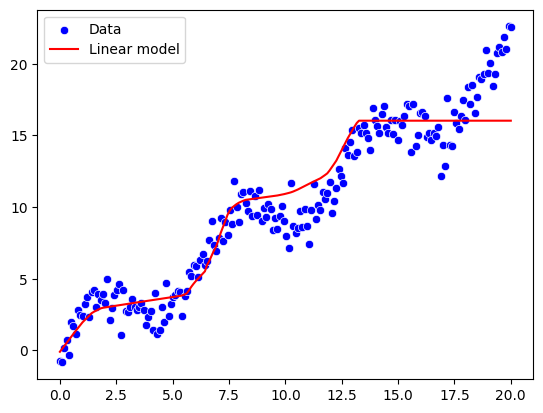

In [67]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
